Cosine Similarity with MultiLabel dataset

#### 1- load the Definition+PrefLabel data

In [1]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
prefLabelPlusDefinition=pd.read_csv("/content/drive/MyDrive/Thematic Annotation of Government data/Datasets/PrefLabel_plus_definition.csv")

In [4]:
prefLabelPlusDefinition

,s,preflabel,definition,prefLabel_plus_definition
0,http://publications.europa.eu/resource/authori...,Economy and finance,This concept identifies datasets covering such...,Economy and finance This concept identifies da...
1,http://publications.europa.eu/resource/authori...,"Education, culture and sport",This concept identifies datasets covering such...,"Education, culture and sport This concept iden..."
2,http://publications.europa.eu/resource/authori...,Education,This concept identifies datasets covering such...,Education This concept identifies datasets cov...
3,http://publications.europa.eu/resource/authori...,Energy,This concept identifies datasets covering the ...,Energy This concept identifies datasets coveri...
4,http://publications.europa.eu/resource/authori...,Environment,This concept identifies datasets covering the ...,Environment This concept identifies datasets c...
5,http://publications.europa.eu/resource/authori...,Government and public sector,This concept identifies datasets covering such...,Government and public sector This concept iden...
6,http://publications.europa.eu/resource/authori...,Health,This concept identifies datasets covering the ...,Health This concept identifies datasets coveri...
7,http://publications.europa.eu/resource/authori...,"Justice, legal system and public safety",This concept identifies datasets covering such...,"Justice, legal system and public safety This c..."
8,http://publications.europa.eu/resource/authori...,Population and society,This concept identifies datasets covering such...,Population and society This concept identifies...
9,http://publications.europa.eu/resource/authori...,Science and technology,This concept identifies datasets covering such...,Science and technology This concept identifies...


In [5]:
prefLabelPlusDefinition = prefLabelPlusDefinition.drop(2)

# reset the index of the DataFrame
prefLabelPlusDefinition = prefLabelPlusDefinition.reset_index(drop=True)
prefLabelPlusDefinition

,s,preflabel,definition,prefLabel_plus_definition
0,http://publications.europa.eu/resource/authori...,Economy and finance,This concept identifies datasets covering such...,Economy and finance This concept identifies da...
1,http://publications.europa.eu/resource/authori...,"Education, culture and sport",This concept identifies datasets covering such...,"Education, culture and sport This concept iden..."
2,http://publications.europa.eu/resource/authori...,Energy,This concept identifies datasets covering the ...,Energy This concept identifies datasets coveri...
3,http://publications.europa.eu/resource/authori...,Environment,This concept identifies datasets covering the ...,Environment This concept identifies datasets c...
4,http://publications.europa.eu/resource/authori...,Government and public sector,This concept identifies datasets covering such...,Government and public sector This concept iden...
5,http://publications.europa.eu/resource/authori...,Health,This concept identifies datasets covering the ...,Health This concept identifies datasets coveri...
6,http://publications.europa.eu/resource/authori...,"Justice, legal system and public safety",This concept identifies datasets covering such...,"Justice, legal system and public safety This c..."
7,http://publications.europa.eu/resource/authori...,Population and society,This concept identifies datasets covering such...,Population and society This concept identifies...
8,http://publications.europa.eu/resource/authori...,Science and technology,This concept identifies datasets covering such...,Science and technology This concept identifies...
9,http://publications.europa.eu/resource/authori...,Transport,This concept identifies datasets covering the ...,Transport This concept identifies datasets cov...


#### 2- Load the dataset which is translated with MultiLabel multi-classified

In [6]:
data = pd.read_csv("/content/drive/MyDrive/Thematic Annotation of Government data/Datasets/Data_All_Included_translated.csv", encoding=" ISO-8859-1")

In [7]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
encoded_data = pd.get_dummies(data, columns=['theme'])

In [ ]:
encoded_data

,dataset,title,keywords,description,combined,Detected Language,Translated,theme_AGRI,theme_ECON,theme_EDUC,theme_ENER,theme_ENVI,theme_GOVE,theme_HEAL,theme_INTR,theme_JUST,theme_REGI,theme_SOCI,theme_TECH,theme_TRAN
0,http://data.europa.eu/88u/dataset/urn-ine-es-t...,Population in group establishments by Province...,"size of the municipality, Structure and situat...",Table of INEBase\nPopulation in group establis...,Population in group establishments by Province...,en,Population in group establishments by Province...,0,0,0,0,0,0,0,0,0,0,1,0,0
1,http://data.europa.eu/88u/dataset/jrc-odin-192...,Small punch tensile/fracture test data for P91...,Elevated temperature material properties,Open access small punch data created by the Eu...,Small punch tensile/fracture test data for P91...,en,Small punch tensile/fracture test data for P91...,0,0,0,0,0,0,0,0,0,0,0,1,0
2,http://data.europa.eu/88u/dataset/s623_217,Flash Eurobarometer 217: Intercultural dialogu...,"surveys, polls, opinion, intercultural, flash,...","To assess on the preparation, effectiveness an...",Flash Eurobarometer 217: Intercultural dialogu...,en,Flash Eurobarometer 217: Intercultural dialogu...,0,0,0,0,0,1,0,0,0,0,0,0,0
3,http://data.europa.eu/88u/dataset/urn-ine-es-t...,Actividades de educación no formal realizadas ...,Survey on Adult Population Involvement in Lear...,Table of INEBase\nActividades de educación no ...,Actividades de educación no formal realizadas ...,es,Non -formal education activities carried out f...,0,1,0,0,0,0,0,0,0,0,0,0,0
4,http://data.europa.eu/88u/dataset/urn-ine-es-t...,Criminal offences charged against the person c...,"UE27_2020 without Spain, Statistics on Domesti...",Table of INEBase\nCriminal offences charged ag...,Criminal offences charged against the person c...,en,Criminal offences charged against the person c...,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40117,http://data.europa.eu/88u/dataset/urn-ine-es-t...,Graduados universitarios según hayan rechazado...,Survey on the Labour Insertion of University G...,Table of INEBase\nGraduados universitarios seg...,Graduados universitarios según hayan rechazado...,es,University graduates as they have rejected som...,0,1,0,0,0,0,0,0,0,0,0,0,0
40118,http://data.europa.eu/88u/dataset/s2091_83_4_4...,Special Eurobarometer 436: Attitudes of Europe...,special eurobarometer,Biodiversity  the unique web of life on Earth...,Special Eurobarometer 436: Attitudes of Europe...,en,Special Eurobarometer 436: Attitudes of Europe...,0,0,0,0,0,1,0,0,0,0,0,0,0
40119,http://data.europa.eu/88u/dataset/2e24efac-795...,CORINE Land Cover changes Iceland 2018 (CHA),"INSPIRE, GSL, Evrópuverkefni, Downloadable dat...",Corine Land Cover (CLC) 2018 and CLC change 20...,CORINE Land Cover changes Iceland 2018 (CHA) I...,en,CORINE Land Cover changes Iceland 2018 (CHA) I...,0,0,0,0,1,0,0,0,0,0,0,0,0
40120,http://data.europa.eu/88u/dataset/urn-ine-es-t...,Control de la empresa (público o privado). EAE...,"Statistics, Labour market and wages, Income an...",Table of INEBase\nControl de la empresa (públi...,Control de la empresa (público o privado). EAE...,es,Company control (public or private). EAES: Q (...,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.columns

Index(['dataset', 'title', 'keywords', 'description', 'theme', 'combined',
       'Detected Language', 'Translated'],
      dtype='object')

In [ ]:
encoded_data=encoded_data.groupby(['dataset', 'title', 'keywords', 'description','combined', 'Translated']).sum().reset_index()

<ipython-input-201-4704bd5f2bf8>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  encoded_data=encoded_data.groupby(['dataset', 'title', 'keywords', 'description','combined', 'Translated']).sum().reset_index()


In [ ]:
encoded_data

,dataset,title,keywords,description,combined,Translated,theme_AGRI,theme_ECON,theme_EDUC,theme_ENER,theme_ENVI,theme_GOVE,theme_HEAL,theme_INTR,theme_JUST,theme_REGI,theme_SOCI,theme_TECH,theme_TRAN
0,http://data.europa.eu/88u/dataset/-05d93b33-10...,Areas of Potential Significant Flood Risk (APSFR),Hydrography,Areas where there is a significant risk of flo...,Areas of Potential Significant Flood Risk (APS...,Areas of Potential Significant Flood Risk (APS...,0,0,0,0,1,0,1,0,0,0,0,0,0
1,http://data.europa.eu/88u/dataset/-0f77b543-f2...,coloniiT,Species distribution,colonii pasari in RBDD,coloniiT Species distribution colonii pasari i...,Coloniit Species Distribution Colonies Bird in...,0,0,0,0,1,0,0,0,0,0,0,0,0
2,http://data.europa.eu/88u/dataset/-117159f0-6c...,INSPIRE Elevation (el-vec) Iceland,"Vektor gögn LMÍ, Opin gögn LMÍ, Open data, INS...",ELF Elevation (EL) Iceland is one of 12 themes...,INSPIRE Elevation (el-vec) Iceland Vektor gögn...,INSPIRE Elevation (el-vec) Iceland Vektor gögn...,0,0,0,0,1,0,0,0,0,0,0,0,0
3,http://data.europa.eu/88u/dataset/-2019-post-e...,2019 - Post-election survey - First results,Eurobarometer,A significant increase in young people with a ...,2019 - Post-election survey - First results ...,2019 - Post-election survey - First results ...,0,0,0,0,0,1,0,0,0,0,0,0,0
4,http://data.europa.eu/88u/dataset/-22c993ed-b7...,Zone tampon RBDD,Protected sites,Zone tampon RBDD,Zone tampon RBDD Protected sites Zone tampon RBDD,Zone tampon RBDD Protected sites Zone tampon RBDD,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29789,http://data.europa.eu/88u/dataset/xt4uwrpbr87x...,NFNET and Novel Food (Novel foods and food ing...,"third country, single market, packaging produc...",The rules for authorising novel foods and food...,NFNET and Novel Food (Novel foods and food ing...,NFNET and Novel Food (Novel foods and food ing...,1,0,0,0,0,0,0,0,0,0,0,0,0
29790,http://data.europa.eu/88u/dataset/youth-hostels,Youth hostels,"youth, tourist, tourism, hostel",Location of the youth hotels on the territory ...,"Youth hostels youth, tourist, tourism, hostel ...","Youth hostels youth, tourist, tourism, hostel ...",0,1,0,0,0,0,0,0,0,1,0,0,0
29791,http://data.europa.eu/88u/dataset/zen-car-stat...,Zen Car stations,"car, auto",Location of the stations of the Zen Car electr...,"Zen Car stations car, auto Location of the sta...","Zen Car stations car, auto Location of the sta...",0,0,0,0,0,0,0,0,0,0,0,0,1
29792,http://data.europa.eu/88u/dataset/zone1_protec...,Protection area 1 of water extraction - draina...,"water protection area, water collection, water...",Brussels-Capital Region : location of Brussels...,Protection area 1 of water extraction - draina...,Protection area 1 of water extraction - draina...,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
encoded_data.columns

Index(['dataset', 'title', 'keywords', 'description', 'combined', 'Translated',
       'theme_AGRI', 'theme_ECON', 'theme_EDUC', 'theme_ENER', 'theme_ENVI',
       'theme_GOVE', 'theme_HEAL', 'theme_INTR', 'theme_JUST', 'theme_REGI',
       'theme_SOCI', 'theme_TECH', 'theme_TRAN'],
      dtype='object')

In [ ]:
#remove the unwanted coloumns 
encoded_data=encoded_data.drop(['dataset', 'title', 'keywords', 'description', 'combined'], axis=1)
encoded_data

,Translated,theme_AGRI,theme_ECON,theme_EDUC,theme_ENER,theme_ENVI,theme_GOVE,theme_HEAL,theme_INTR,theme_JUST,theme_REGI,theme_SOCI,theme_TECH,theme_TRAN
0,Areas of Potential Significant Flood Risk (APS...,0,0,0,0,1,0,1,0,0,0,0,0,0
1,Coloniit Species Distribution Colonies Bird in...,0,0,0,0,1,0,0,0,0,0,0,0,0
2,INSPIRE Elevation (el-vec) Iceland Vektor gögn...,0,0,0,0,1,0,0,0,0,0,0,0,0
3,2019 - Post-election survey - First results ...,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Zone tampon RBDD Protected sites Zone tampon RBDD,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29789,NFNET and Novel Food (Novel foods and food ing...,1,0,0,0,0,0,0,0,0,0,0,0,0
29790,"Youth hostels youth, tourist, tourism, hostel ...",0,1,0,0,0,0,0,0,0,1,0,0,0
29791,"Zen Car stations car, auto Location of the sta...",0,0,0,0,0,0,0,0,0,0,0,0,1
29792,Protection area 1 of water extraction - draina...,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
encoded_data.columns

Index(['Translated', 'theme_AGRI', 'theme_ECON', 'theme_EDUC', 'theme_ENER',
       'theme_ENVI', 'theme_GOVE', 'theme_HEAL', 'theme_INTR', 'theme_JUST',
       'theme_REGI', 'theme_SOCI', 'theme_TECH', 'theme_TRAN'],
      dtype='object')

In [ ]:
class_counts=encoded_data.iloc[:, 1:].sum(axis=0)

In [ ]:
print(class_counts)

theme_AGRI     363
theme_ECON    7870
theme_EDUC    3811
theme_ENER     797
theme_ENVI    5694
theme_GOVE    2804
theme_HEAL    2333
theme_INTR     441
theme_JUST     647
theme_REGI    2524
theme_SOCI    7924
theme_TECH    4594
theme_TRAN     310
dtype: int64


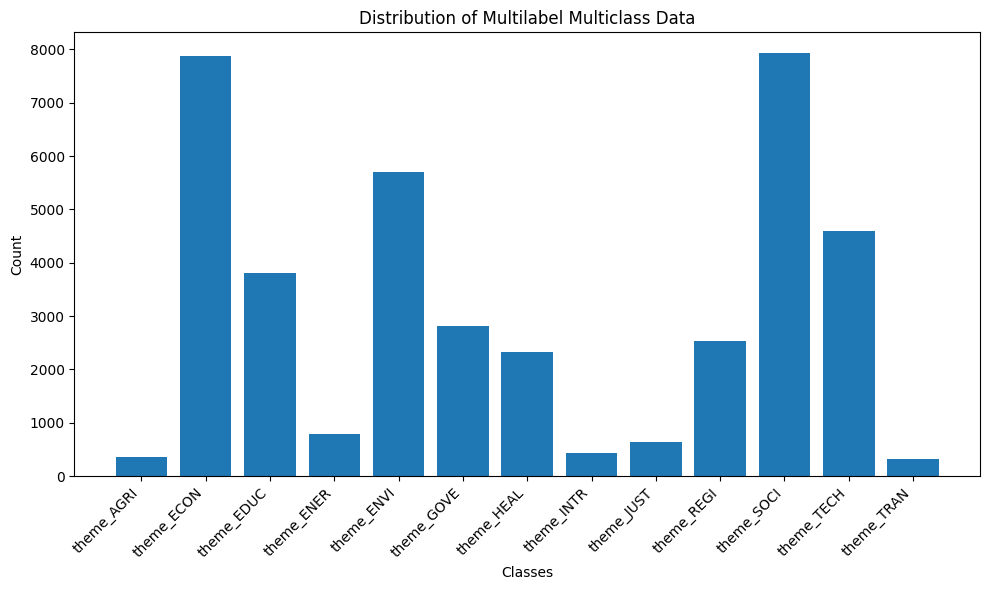

In [ ]:
# Plot the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(class_counts.index, class_counts.values, color='tab:blue')
ax.set_xlabel('Classes')
ax.set_ylabel('Count')
ax.set_title('Distribution of Multilabel Multiclass Data')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
class_name_map = {'theme_AGRI':'Agriculture', 'theme_ECON':'Economy', 'theme_EDUC':'Education', 'theme_ENER':'Energy',
       'theme_ENVI':'Environment', 'theme_GOVE':'Government', 'theme_HEAL':'Health', 'theme_INTR':'International', 'theme_JUST':'Justice',
       'theme_REGI':'Regions', 'theme_SOCI':'Society', 'theme_TECH':'Technology', 'theme_TRAN':'Transport'}

In [ ]:
# Function to get class names for each row
def get_class_names(row):
    class_names = []
    for col in row.index:
        if col.startswith('theme_') and row[col] == 1:
            class_name = class_name_map.get(col, col)
            class_names.append(col)
    return class_names

In [ ]:
# Apply the function to create a new column
encoded_data['all_themes'] = encoded_data.apply(get_class_names, axis=1)

In [ ]:
encoded_data.drop(['theme_AGRI', 'theme_ECON', 'theme_EDUC', 'theme_ENER',
       'theme_ENVI', 'theme_GOVE', 'theme_HEAL', 'theme_INTR', 'theme_JUST',
       'theme_REGI', 'theme_SOCI', 'theme_TECH', 'theme_TRAN'], inplace=True, axis=1)

In [ ]:
# encoded_data = encoded_data.rename(columns={'theme_AGRI':'Agriculture', 'theme_ECON':'Economy', 'theme_EDUC':'Education', 'theme_ENER':'Energy',
#        'theme_ENVI':'Environment', 'theme_GOVE':'Government', 'theme_HEAL':'Health', 'theme_INTR':'International', 'theme_JUST':'Justice',
#        'theme_REGI':'Regions', 'theme_SOCI':'Society', 'theme_TECH':'Technology', 'theme_TRAN':'Transport'})

In [ ]:
encoded_data

,Translated,all_themes
0,Areas of Potential Significant Flood Risk (APS...,"[theme_ENVI, theme_HEAL]"
1,Coloniit Species Distribution Colonies Bird in...,[theme_ENVI]
2,INSPIRE Elevation (el-vec) Iceland Vektor gögn...,[theme_ENVI]
3,2019 - Post-election survey - First results ...,[theme_GOVE]
4,Zone tampon RBDD Protected sites Zone tampon RBDD,[theme_ENVI]
...,...,...
29789,NFNET and Novel Food (Novel foods and food ing...,[theme_AGRI]
29790,"Youth hostels youth, tourist, tourism, hostel ...","[theme_ECON, theme_REGI]"
29791,"Zen Car stations car, auto Location of the sta...",[theme_TRAN]
29792,Protection area 1 of water extraction - draina...,[theme_ENVI]


In [ ]:
# Function to replace values in list
def replace_values(row):
    return [class_name_map.get(col, col) for col in row['all_themes']]

# Apply the function to create a new column with replaced values
encoded_data['all_themes'] = encoded_data.apply(replace_values, axis=1)

In [ ]:
encoded_data

,Translated,all_themes
0,Areas of Potential Significant Flood Risk (APS...,"[Environment, Health]"
1,Coloniit Species Distribution Colonies Bird in...,[Environment]
2,INSPIRE Elevation (el-vec) Iceland Vektor gögn...,[Environment]
3,2019 - Post-election survey - First results ...,[Government]
4,Zone tampon RBDD Protected sites Zone tampon RBDD,[Environment]
...,...,...
29789,NFNET and Novel Food (Novel foods and food ing...,[Agriculture]
29790,"Youth hostels youth, tourist, tourism, hostel ...","[Economy, Regions]"
29791,"Zen Car stations car, auto Location of the sta...",[Transport]
29792,Protection area 1 of water extraction - draina...,[Environment]


#### 3- Preprocessing without stop stopwords removing

Our origional dataset and PrefLabel_Definition is ready, but we need preliminary preprocessing such as converting to lower case, removing url, punction, and special characters from it. Keep in mind, we will not remove the stopwords because Glove consider them while creating embeddings. 

In [ ]:
# Text preprocessing function
import nltk
import re
import string
from nltk.corpus import words
from nltk.tokenize import word_tokenize, wordpunct_tokenize # for our dataset wordpunct is suitable because it also splits on punction marks 

nltk.download('wordnet')

def basic_preprocess_text(text):

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', ' ', text, flags=re.MULTILINE)

    tokens = wordpunct_tokenize(text)
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    
    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]


    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
  

    return " ".join(words)
# Now proceed with the rest of the steps (train-test split, tokenization, etc.) as shown in the previous code example.

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
encoded_data['Preprocessed_Translated'] =  encoded_data['Translated'].apply(basic_preprocess_text) ## Applying basic preprocessing steps to origional dataset

In [ ]:
encoded_data[['Translated', 'Preprocessed_Translated']]

,Translated,Preprocessed_Translated
0,Areas of Potential Significant Flood Risk (APS...,areas of potential significant flood risk apsf...
1,Coloniit Species Distribution Colonies Bird in...,coloniit species distribution colonies bird in...
2,INSPIRE Elevation (el-vec) Iceland Vektor gögn...,inspire elevation el vec iceland vektor gögn l...
3,2019 - Post-election survey - First results ...,post election survey first results eurobaromet...
4,Zone tampon RBDD Protected sites Zone tampon RBDD,zone tampon rbdd protected sites zone tampon rbdd
...,...,...
29789,NFNET and Novel Food (Novel foods and food ing...,nfnet and novel food novel foods and food ingr...
29790,"Youth hostels youth, tourist, tourism, hostel ...",youth hostels youth tourist tourism hostel loc...
29791,"Zen Car stations car, auto Location of the sta...",zen car stations car auto location of the stat...
29792,Protection area 1 of water extraction - draina...,protection area of water extraction drainage g...


In [ ]:
prefLabelPlusDefinition["preprocessed_prefLabel_plus_definition"] = prefLabelPlusDefinition["prefLabel_plus_definition"].apply(basic_preprocess_text) ## Applying basic preprocessing steps to PrefLabel+defintion

In [ ]:
prefLabelPlusDefinition[['prefLabel_plus_definition',	'preprocessed_prefLabel_plus_definition']]

,prefLabel_plus_definition,preprocessed_prefLabel_plus_definition
0,Economy and finance This concept identifies da...,economy and finance this concept identifies da...
1,"Education, culture and sport This concept iden...",education culture and sport this concept ident...
2,Energy This concept identifies datasets coveri...,energy this concept identifies datasets coveri...
3,Environment This concept identifies datasets c...,environment this concept identifies datasets c...
4,Government and public sector This concept iden...,government and public sector this concept iden...
5,Health This concept identifies datasets coveri...,health this concept identifies datasets coveri...
6,"Justice, legal system and public safety This c...",justice legal system and public safety this co...
7,Population and society This concept identifies...,population and society this concept identifies...
8,Science and technology This concept identifies...,science and technology this concept identifies...
9,Transport This concept identifies datasets cov...,transport this concept identifies datasets cov...


#### 4- Cosine similarity with Glove 200D

In [8]:
glove_embeddings = {}
with open('/content/drive/MyDrive/Thematic Annotation of Government data/Datasets/glove/glove.6B.200d.txt', encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        glove_embeddings[word] = vector

In [ ]:
# extract the instance embeddings
instance_embeddings = []
for instance in encoded_data['Preprocessed_Translated']:
    embedding = np.zeros(200)
    for word in instance.split():
        if word in glove_embeddings:
            embedding += glove_embeddings[word]
    instance_embeddings.append(embedding)

In [ ]:
# extract the prefLabel+definition embeddings
prefLabel_definition_embeddings = []
for class_name in prefLabelPlusDefinition["preprocessed_prefLabel_plus_definition"]:
    embedding = np.zeros(200)
    print(class_name, "\n") #convert to lower case
    for word in class_name.split():
        print("before word embedding :", word)
        if word in glove_embeddings:
            print("in word embedding     :", word) #convert to lower case
            embedding += glove_embeddings[word]
    prefLabel_definition_embeddings.append(embedding)

economy and finance this concept identifies datasets covering such domains as economy or finance economy is the area of the production distribution and trade as well as consumption of goods and services by different agents in its broadest sense the economy is defined as a social domain that emphasize the practices discourses and material expressions associated with the production use and management of resources finance is the study of money and how it is used specifically it deals with the questions of how an individual company or government acquires the money needed and how they then spend or invest that money dataset examples tenders electronic daily ted public procurement notices from the eu and beyond general government deficit and surplus quarterly data 

before word embedding : economy
in word embedding     : economy
before word embedding : and
in word embedding     : and
before word embedding : finance
in word embedding     : finance
before word embedding : this
in word embeddin

In [ ]:
len(prefLabel_definition_embeddings[0])

200

In [ ]:
# compute the cosine similarity between each instance and each class
similarities = cosine_similarity(instance_embeddings, prefLabel_definition_embeddings)

In [ ]:
similarities[0]

array([0.87747812, 0.85928226, 0.86204453, 0.88712736, 0.88271492,
       0.87536108, 0.88447866, 0.9021105 , 0.8676835 , 0.86082011,
       0.86713412, 0.85970698, 0.88475754])

In [ ]:
similarities[1]

array([0.6258536 , 0.63131536, 0.64510145, 0.69563633, 0.61355716,
       0.6631832 , 0.64124946, 0.68147504, 0.64442214, 0.65095241,
       0.71902929, 0.62173342, 0.69802463])

In [ ]:
similarities[2]

array([0.92977404, 0.89372794, 0.9264153 , 0.89489447, 0.91470218,
       0.89024602, 0.92490424, 0.936905  , 0.92458307, 0.90070608,
       0.87713497, 0.90660245, 0.88511685])

In [ ]:
similarities[4]

array([0.40932772, 0.40209368, 0.40849836, 0.44092546, 0.42440776,
       0.39470402, 0.41574277, 0.43608279, 0.38710214, 0.42663204,
       0.42265637, 0.41366446, 0.48378737])

In [ ]:
similarities[5]

array([0.96426173, 0.93655579, 0.94577532, 0.93415256, 0.94996431,
       0.92206486, 0.9641791 , 0.95716609, 0.95140675, 0.9306027 ,
       0.9305873 , 0.95267029, 0.93441706])

Total number of similarites are 520,000 and if we put threshold of 0.70 just 7016 values will be exculded, it means that every dataset will belong to every category thats why we proceeded with the max cosine simialrity

In [ ]:
len(similarities[similarities < 0.70 ]) # How many values of the cosine similarity are greater than 70% its just calculation not used in the experiment

5796

In [ ]:
category_labels = ['Economy', 'Education', 'Energy','Environment','Government','Health', 'Justice', 'Society', 'Technology', 
                   'Transport', 'Agriculture', 'International', 'Regions'] #['Agriculture', 'Economy', 'Education', 'Energy','Environment', 'Government', 'Health', 'International', 'Justice','Regions', 'Society', 'Technology', 'Transport']

In [ ]:
category_labels

['Economy',
 'Education',
 'Energy',
 'Environment',
 'Government',
 'Health',
 'Justice',
 'Society',
 'Technology',
 'Transport',
 'Agriculture',
 'International',
 'Regions']

One maximum Similarity of the Definition+PrefLabel and Dataset

In [ ]:
category_labels[np.argmax(similarities[0])]

'Society'

In [ ]:
#Different combinitions of categories among the datasets
print(encoded_data.all_themes.value_counts().nunique)

<bound method IndexOpsMixin.nunique of [Society]                                                       4975
[Environment]                                                   4504
[Economy]                                                       3806
[Economy, Education]                                            3072
[Government]                                                    2126
                                                                ... 
[Education, Government, International, Society]                    1
[Economy, Government, Justice]                                     1
[Education, Government, Health, Justice, Society]                  1
[Environment, Government, Health, International, Technology]       1
[Economy, Government, Regions, Technology]                         1
Name: all_themes, Length: 170, dtype: int64>


In [ ]:
print(encoded_data.all_themes.value_counts().sort_values(ascending=False)[1:50]) ## Top 50 themes to which datasets belong

[Environment]                                                                                                       4504
[Economy]                                                                                                           3806
[Economy, Education]                                                                                                3072
[Government]                                                                                                        2126
[Technology]                                                                                                        1908
[Regions, Society]                                                                                                  1179
[Health]                                                                                                            1145
[Environment, Technology]                                                                                            877
[Health, Society]               

In [ ]:
#find the index of highest value in each similarty 
max_indices = np.argmax(similarities, axis=1)

# fetch corresponding value from other list based on max index
max_category = [category_labels[i] for i in max_indices]

In [ ]:
predict_Glove_200_COSINE=pd.DataFrame({'Predict_Glove_200_Cosine_Similarity':max_category})

In [ ]:
predict_Glove_200_COSINE.Predict_Glove_200_Cosine_Similarity.value_counts()

Society          10442
Economy           8708
Justice           3333
Energy            2078
Technology        1147
Government        1087
Agriculture        576
Transport          549
Regions            475
International      445
Environment        388
Education          369
Health             197
Name: Predict_Glove_200_Cosine_Similarity, dtype: int64

In [ ]:
result = pd.concat([encoded_data, predict_Glove_200_COSINE], axis=1)

In [ ]:
result

,Translated,all_themes,Preprocessed_Translated,Predict_Glove_200_Cosine_Similarity
0,Areas of Potential Significant Flood Risk (APS...,"[Environment, Health]",areas of potential significant flood risk apsf...,Society
1,Coloniit Species Distribution Colonies Bird in...,[Environment],coloniit species distribution colonies bird in...,Agriculture
2,INSPIRE Elevation (el-vec) Iceland Vektor gögn...,[Environment],inspire elevation el vec iceland vektor gögn l...,Society
3,2019 - Post-election survey - First results ...,[Government],post election survey first results eurobaromet...,Society
4,Zone tampon RBDD Protected sites Zone tampon RBDD,[Environment],zone tampon rbdd protected sites zone tampon rbdd,Regions
...,...,...,...,...
29789,NFNET and Novel Food (Novel foods and food ing...,[Agriculture],nfnet and novel food novel foods and food ingr...,Economy
29790,"Youth hostels youth, tourist, tourism, hostel ...","[Economy, Regions]",youth hostels youth tourist tourism hostel loc...,Society
29791,"Zen Car stations car, auto Location of the sta...",[Transport],zen car stations car auto location of the stat...,Transport
29792,Protection area 1 of water extraction - draina...,[Environment],protection area of water extraction drainage g...,Agriculture


In [ ]:
def success_criteria(row):
    if row['Predict_Glove_200_Cosine_Similarity'] in row['all_themes']:
        return 'success'
    else:
        return 'failure'

In [ ]:
# apply the function to create a new column; if one value is matched to the origional themes
result['criteria'] = result.apply(lambda row: success_criteria(row), axis=1)

In [ ]:
result.criteria.value_counts()

failure    17498
success    12296
Name: criteria, dtype: int64

In [ ]:
Agreement = 12296/29794

In [ ]:
Agreement

0.4127005437336376

Top 2 Maximum values from the Cosine similarity matrix 

In [ ]:
import numpy as np

# get the indices of the top two maximum values in each row
top2_indices = np.argsort(similarities, axis=1)[:, -2:]

category_labels

# fetch the corresponding values based on the indices
top2_themes = [[category_labels[i] for i in row_indices] for row_indices in top2_indices]

In [ ]:
print(top2_themes[0:5])

[['Environment', 'Society'], ['Regions', 'Agriculture'], ['Economy', 'Society'], ['Justice', 'Society'], ['Environment', 'Regions']]


In [ ]:
Prediction_Glove_200_top_2 = pd.DataFrame({'Prediction_Glove_200_top_2_themes':top2_themes})

In [ ]:
result2 = pd.concat([encoded_data, Prediction_Glove_200_top_2], axis=1)

In [ ]:
result2

,Translated,all_themes,Preprocessed_Translated,Prediction_Glove_200_top_2_themes
0,Areas of Potential Significant Flood Risk (APS...,"[Environment, Health]",areas of potential significant flood risk apsf...,"[Environment, Society]"
1,Coloniit Species Distribution Colonies Bird in...,[Environment],coloniit species distribution colonies bird in...,"[Regions, Agriculture]"
2,INSPIRE Elevation (el-vec) Iceland Vektor gögn...,[Environment],inspire elevation el vec iceland vektor gögn l...,"[Economy, Society]"
3,2019 - Post-election survey - First results ...,[Government],post election survey first results eurobaromet...,"[Justice, Society]"
4,Zone tampon RBDD Protected sites Zone tampon RBDD,[Environment],zone tampon rbdd protected sites zone tampon rbdd,"[Environment, Regions]"
...,...,...,...,...
29789,NFNET and Novel Food (Novel foods and food ing...,[Agriculture],nfnet and novel food novel foods and food ingr...,"[Justice, Economy]"
29790,"Youth hostels youth, tourist, tourism, hostel ...","[Economy, Regions]",youth hostels youth tourist tourism hostel loc...,"[Justice, Society]"
29791,"Zen Car stations car, auto Location of the sta...",[Transport],zen car stations car auto location of the stat...,"[Justice, Transport]"
29792,Protection area 1 of water extraction - draina...,[Environment],protection area of water extraction drainage g...,"[Transport, Agriculture]"


In [ ]:
# Define a function to check for intersection between two lists
def criteria_of_success(row):
    all_themes = row['all_themes']
    predictions = row['Prediction_Glove_200_top_2_themes']
    if set(all_themes).intersection(set(predictions)):
        return 'success'
    else:
        return 'failure'

In [ ]:
# Apply the function to create a new column
result2['Criteria_Success_top_2'] = result2.apply(criteria_of_success, axis=1)

In [ ]:
result2

,Translated,all_themes,Preprocessed_Translated,Prediction_Glove_200_top_2_themes,Criteria_Success_top_2
0,Areas of Potential Significant Flood Risk (APS...,"[Environment, Health]",areas of potential significant flood risk apsf...,"[Environment, Society]",success
1,Coloniit Species Distribution Colonies Bird in...,[Environment],coloniit species distribution colonies bird in...,"[Regions, Agriculture]",failure
2,INSPIRE Elevation (el-vec) Iceland Vektor gögn...,[Environment],inspire elevation el vec iceland vektor gögn l...,"[Economy, Society]",failure
3,2019 - Post-election survey - First results ...,[Government],post election survey first results eurobaromet...,"[Justice, Society]",failure
4,Zone tampon RBDD Protected sites Zone tampon RBDD,[Environment],zone tampon rbdd protected sites zone tampon rbdd,"[Environment, Regions]",success
...,...,...,...,...,...
29789,NFNET and Novel Food (Novel foods and food ing...,[Agriculture],nfnet and novel food novel foods and food ingr...,"[Justice, Economy]",failure
29790,"Youth hostels youth, tourist, tourism, hostel ...","[Economy, Regions]",youth hostels youth tourist tourism hostel loc...,"[Justice, Society]",failure
29791,"Zen Car stations car, auto Location of the sta...",[Transport],zen car stations car auto location of the stat...,"[Justice, Transport]",success
29792,Protection area 1 of water extraction - draina...,[Environment],protection area of water extraction drainage g...,"[Transport, Agriculture]",failure


In [ ]:
result2.Criteria_Success_top_2.value_counts()

success    16071
failure    13723
Name: Criteria_Success_top_2, dtype: int64

In [ ]:
print("Agreement for the top 2 themes prediction using Glove 200   :", 16071 / 29794)

Agreement for the top 2 themes prediction using Glove 200   : 0.5394039068268779


Top 3 Maximum values from the Cosine similarity matrix

In [ ]:
import numpy as np


# get the indices of the top three maximum values in each row
top3_indices = np.argsort(similarities, axis=1)[:, -3:]

category_labels

# fetch the corresponding values based on the indices
top3_themes = [[category_labels[i] for i in row_indices] for row_indices in top3_indices]



In [ ]:
print(top3_themes[0:5])

[['Regions', 'Environment', 'Society'], ['Environment', 'Regions', 'Agriculture'], ['Energy', 'Economy', 'Society'], ['Economy', 'Justice', 'Society'], ['Society', 'Environment', 'Regions']]


In [ ]:
Prediction_Glove_200_top_3 = pd.DataFrame({'Prediction_Glove_200_top_3_themes':top3_themes})

In [ ]:
result3 = pd.concat([encoded_data, Prediction_Glove_200_top_3], axis=1)

In [ ]:
result3

,Translated,all_themes,Preprocessed_Translated,Prediction_Glove_200_top_3_themes
0,Areas of Potential Significant Flood Risk (APS...,"[Environment, Health]",areas of potential significant flood risk apsf...,"[Regions, Environment, Society]"
1,Coloniit Species Distribution Colonies Bird in...,[Environment],coloniit species distribution colonies bird in...,"[Environment, Regions, Agriculture]"
2,INSPIRE Elevation (el-vec) Iceland Vektor gögn...,[Environment],inspire elevation el vec iceland vektor gögn l...,"[Energy, Economy, Society]"
3,2019 - Post-election survey - First results ...,[Government],post election survey first results eurobaromet...,"[Economy, Justice, Society]"
4,Zone tampon RBDD Protected sites Zone tampon RBDD,[Environment],zone tampon rbdd protected sites zone tampon rbdd,"[Society, Environment, Regions]"
...,...,...,...,...
29789,NFNET and Novel Food (Novel foods and food ing...,[Agriculture],nfnet and novel food novel foods and food ingr...,"[Energy, Justice, Economy]"
29790,"Youth hostels youth, tourist, tourism, hostel ...","[Economy, Regions]",youth hostels youth tourist tourism hostel loc...,"[Government, Justice, Society]"
29791,"Zen Car stations car, auto Location of the sta...",[Transport],zen car stations car auto location of the stat...,"[Economy, Justice, Transport]"
29792,Protection area 1 of water extraction - draina...,[Environment],protection area of water extraction drainage g...,"[Environment, Transport, Agriculture]"


In [ ]:
# Define a function to check for intersection between two lists
def criteria_of_success_3(row):
    all_themes = row['all_themes']
    predictions = row['Prediction_Glove_200_top_3_themes']
    if set(all_themes).intersection(set(predictions)):
        return 'success'
    else:
        return 'failure'

In [ ]:
# Apply the function to create a new column
result3['Criteria_Success_top_3'] = result3.apply(criteria_of_success_3, axis=1)

In [ ]:
result3

,Translated,all_themes,Preprocessed_Translated,Prediction_Glove_200_top_3_themes,Criteria_Success_top_3
0,Areas of Potential Significant Flood Risk (APS...,"[Environment, Health]",areas of potential significant flood risk apsf...,"[Regions, Environment, Society]",success
1,Coloniit Species Distribution Colonies Bird in...,[Environment],coloniit species distribution colonies bird in...,"[Environment, Regions, Agriculture]",success
2,INSPIRE Elevation (el-vec) Iceland Vektor gögn...,[Environment],inspire elevation el vec iceland vektor gögn l...,"[Energy, Economy, Society]",failure
3,2019 - Post-election survey - First results ...,[Government],post election survey first results eurobaromet...,"[Economy, Justice, Society]",failure
4,Zone tampon RBDD Protected sites Zone tampon RBDD,[Environment],zone tampon rbdd protected sites zone tampon rbdd,"[Society, Environment, Regions]",success
...,...,...,...,...,...
29789,NFNET and Novel Food (Novel foods and food ing...,[Agriculture],nfnet and novel food novel foods and food ingr...,"[Energy, Justice, Economy]",failure
29790,"Youth hostels youth, tourist, tourism, hostel ...","[Economy, Regions]",youth hostels youth tourist tourism hostel loc...,"[Government, Justice, Society]",failure
29791,"Zen Car stations car, auto Location of the sta...",[Transport],zen car stations car auto location of the stat...,"[Economy, Justice, Transport]",success
29792,Protection area 1 of water extraction - draina...,[Environment],protection area of water extraction drainage g...,"[Environment, Transport, Agriculture]",success


In [ ]:
# success    16819
# failure    12975
result3.Criteria_Success_top_3.value_counts()

success    19475
failure    10319
Name: Criteria_Success_top_3, dtype: int64

In [ ]:
print("Agreement for the top 3 themes prediction using Glove 200   :", 19475 / 29794)

Agreement for the top 3 themes prediction using Glove 200   : 0.653655098341948


#### 5- Cosine similarity with Glove 200D by removing stopwords

##### 5.1- Preprocessing without stop stopwords removing

Our origional dataset and PrefLabel_Definition is ready, but we need preliminary preprocessing such as converting to lower case, removing url, punction, and special characters from it. We will remove stopwords this time as well.

In [ ]:
# Text preprocessing function
import nltk
import re
import string
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, wordpunct_tokenize # for our dataset wordpunct is suitable because it also splits on punction marks 
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
nltk.download('words')
nltk.download('wordnet')

def basic_preprocess_text(text):

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', ' ', text, flags=re.MULTILINE)

    tokens = wordpunct_tokenize(text)
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    
    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]


    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
  
    # filter out stop words
    words = [w for w in words if not w in stop_words]

    return " ".join(words)
# Now proceed with the rest of the steps (train-test split, tokenization, etc.) as shown in the previous code example.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
encoded_data['Preprocessed_Translated'] =  encoded_data['Translated'].apply(basic_preprocess_text) ## Applying basic preprocessing steps to origional dataset

In [ ]:
encoded_data[['Translated', 'Preprocessed_Translated']]

,Translated,Preprocessed_Translated
0,Areas of Potential Significant Flood Risk (APS...,areas potential significant flood risk apsfr h...
1,Coloniit Species Distribution Colonies Bird in...,coloniit species distribution colonies bird rbdd
2,INSPIRE Elevation (el-vec) Iceland Vektor gögn...,inspire elevation el vec iceland vektor gögn l...
3,2019 - Post-election survey - First results ...,post election survey first results eurobaromet...
4,Zone tampon RBDD Protected sites Zone tampon RBDD,zone tampon rbdd protected sites zone tampon rbdd
...,...,...
29789,NFNET and Novel Food (Novel foods and food ing...,nfnet novel food novel foods food ingredients ...
29790,"Youth hostels youth, tourist, tourism, hostel ...",youth hostels youth tourist tourism hostel loc...
29791,"Zen Car stations car, auto Location of the sta...",zen car stations car auto location stations ze...
29792,Protection area 1 of water extraction - draina...,protection area water extraction drainage gall...


In [ ]:
prefLabelPlusDefinition["preprocessed_prefLabel_plus_definition"] = prefLabelPlusDefinition["prefLabel_plus_definition"].apply(basic_preprocess_text) ## Applying basic preprocessing steps to PrefLabel+defintion

In [ ]:
prefLabelPlusDefinition[['prefLabel_plus_definition',	'preprocessed_prefLabel_plus_definition']]

,prefLabel_plus_definition,preprocessed_prefLabel_plus_definition
0,Economy and finance This concept identifies da...,economy finance concept identifies datasets co...
1,"Education, culture and sport This concept iden...",education culture sport concept identifies dat...
2,Energy This concept identifies datasets coveri...,energy concept identifies datasets covering do...
3,Environment This concept identifies datasets c...,environment concept identifies datasets coveri...
4,Government and public sector This concept iden...,government public sector concept identifies da...
5,Health This concept identifies datasets coveri...,health concept identifies datasets covering do...
6,"Justice, legal system and public safety This c...",justice legal system public safety concept ide...
7,Population and society This concept identifies...,population society concept identifies datasets...
8,Science and technology This concept identifies...,science technology concept identifies datasets...
9,Transport This concept identifies datasets cov...,transport concept identifies datasets covering...


In [ ]:
glove_embeddings = {}
with open('/content/drive/MyDrive/Thematic Annotation of Government data/Datasets/glove/glove.6B.200d.txt', encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        glove_embeddings[word] = vector

In [ ]:
# extract the instance embeddings
%%time 
instance_embeddings = []
for instance in encoded_data['Preprocessed_Translated']:
    embedding = np.zeros(200)
    for word in instance.split():
        if word in glove_embeddings:
            embedding += glove_embeddings[word]
    instance_embeddings.append(embedding)

CPU times: user 5.38 s, sys: 78.2 ms, total: 5.46 s
Wall time: 5.49 s


In [ ]:
# extract the prefLabel+definition embeddings
%%time
prefLabel_definition_embeddings = []
for class_name in prefLabelPlusDefinition["preprocessed_prefLabel_plus_definition"]:
    embedding = np.zeros(200)
    print(class_name, "\n") #convert to lower case
    for word in class_name.split():
        print("before word embedding :", word)
        if word in glove_embeddings:
            print("in word embedding     :", word) #convert to lower case
            
            embedding += glove_embeddings[word]
    # embedding = embedding / len(class_name)
    prefLabel_definition_embeddings.append(embedding)

economy finance concept identifies datasets covering domains economy finance economy area production distribution trade well consumption goods services different agents broadest sense economy defined social domain emphasize practices discourses material expressions associated production use management resources finance study money used specifically deals questions individual company government acquires money needed spend invest money dataset examples tenders electronic daily ted public procurement notices eu beyond general government deficit surplus quarterly data 

before word embedding : economy
in word embedding     : economy
before word embedding : finance
in word embedding     : finance
before word embedding : concept
in word embedding     : concept
before word embedding : identifies
in word embedding     : identifies
before word embedding : datasets
in word embedding     : datasets
before word embedding : covering
in word embedding     : covering
before word embedding : domains
i

In [ ]:
prefLabel_definition_embeddings[0]

array([ 8.17396154e+00,  7.64443973e+00,  9.90198100e+00,  3.02621418e+00,
        1.51257530e+00,  7.47251798e+00, -1.86210785e+01,  1.17597571e+01,
       -2.89791107e+00,  8.25088795e+00,  4.28611247e+00,  2.02944067e+01,
       -5.12084946e-01,  4.38666512e+00,  1.70346560e+01,  8.82458800e+00,
       -1.45302954e-01,  1.32421359e+01,  6.00303993e+00, -1.26848194e+01,
       -2.02336246e+00,  1.53606100e+02, -1.27327076e+01,  1.91198915e+00,
       -6.45666774e+00,  1.58380690e+01, -7.57401753e-01,  1.27453710e+01,
        6.74446973e+00,  1.10016204e+01, -1.67676148e+01, -1.32167245e+01,
       -6.70639325e+00, -7.65070119e+00,  5.87401533e+00, -8.68249971e+00,
       -1.63890620e+01, -1.12341111e+01,  5.19530441e+00, -5.17868313e+00,
        1.06226712e+01, -1.58318940e+01, -7.35149130e-02,  5.34238312e+00,
       -8.79031649e+00, -7.11169405e+00,  1.99926729e+01, -8.10703908e+00,
       -5.19498410e+00, -9.62178889e-01, -4.87499692e+00,  9.70865872e+00,
        6.53247328e-01,  

In [ ]:
# compute the cosine similarity between each instance and each class
similarities = cosine_similarity(instance_embeddings, prefLabel_definition_embeddings)

In [ ]:
similarities[0]

array([0.71063196, 0.6769176 , 0.69846833, 0.767642  , 0.7230182 ,
       0.68929883, 0.7104424 , 0.75361061, 0.65021985, 0.6825312 ,
       0.70173272, 0.7150195 , 0.73191684])

In [ ]:
similarities[1]

array([0.47222375, 0.47932836, 0.53657653, 0.60282698, 0.4411168 ,
       0.52681639, 0.49780143, 0.5779499 , 0.48625181, 0.53173746,
       0.64572182, 0.4840185 , 0.57087507])

In [ ]:
similarities[2]

array([0.80057717, 0.77206002, 0.81447493, 0.78233641, 0.78584593,
       0.72024663, 0.79306504, 0.82063795, 0.79132484, 0.77270317,
       0.71539507, 0.81697924, 0.73441138])

In [ ]:
similarities[4]

array([0.41166858, 0.38364015, 0.38649742, 0.43462702, 0.41682903,
       0.35499876, 0.41095102, 0.44178953, 0.33805236, 0.42729855,
       0.41196769, 0.40317644, 0.49736281])

In [ ]:
similarities[5]

array([0.8869757 , 0.84132031, 0.87811796, 0.88007783, 0.86067744,
       0.81529784, 0.88599661, 0.8813297 , 0.86253232, 0.84395623,
       0.84255619, 0.88909654, 0.84194269])

Total number of similarites are 520,000 and if we put threshold of 0.70 just 7016 values will be exculded, it means that every dataset will belong to every category thats why we proceeded with the max cosine simialrity

In [ ]:
len(similarities[similarities < 0.70 ]) # How many values of the cosine similarity are greater than 70% its just calculation not used in the experiment

95455

In [ ]:
category_labels = ['Economy', 'Education', 'Energy','Environment','Government','Health', 'Justice', 'Society', 'Technology', 
                   'Transport', 'Agriculture', 'International', 'Regions'] #['Agriculture', 'Economy', 'Education', 'Energy','Environment', 'Government', 'Health', 'International', 'Justice','Regions', 'Society', 'Technology', 'Transport']

In [ ]:
category_labels

['Economy',
 'Education',
 'Energy',
 'Environment',
 'Government',
 'Health',
 'Justice',
 'Society',
 'Technology',
 'Transport',
 'Agriculture',
 'International',
 'Regions']

One maximum Similarity of the Definition+PrefLabel and Dataset

In [ ]:
category_labels[np.argmax(similarities[0])]

'Environment'

In [ ]:
#Different combinitions of categories among the datasets
print(encoded_data.all_themes.value_counts().nunique)

<bound method IndexOpsMixin.nunique of [Society]                                                       4975
[Environment]                                                   4504
[Economy]                                                       3806
[Economy, Education]                                            3072
[Government]                                                    2126
                                                                ... 
[Education, Government, International, Society]                    1
[Economy, Government, Justice]                                     1
[Education, Government, Health, Justice, Society]                  1
[Environment, Government, Health, International, Technology]       1
[Economy, Government, Regions, Technology]                         1
Name: all_themes, Length: 170, dtype: int64>


In [ ]:
print(encoded_data.all_themes.value_counts().sort_values(ascending=False)[1:50]) ## Top 50 themes to which datasets belong

[Environment]                                                                                                       4504
[Economy]                                                                                                           3806
[Economy, Education]                                                                                                3072
[Government]                                                                                                        2126
[Technology]                                                                                                        1908
[Regions, Society]                                                                                                  1179
[Health]                                                                                                            1145
[Environment, Technology]                                                                                            877
[Health, Society]               

In [ ]:
#find the index of highest value in each similarty 
max_indices = np.argmax(similarities, axis=1)

# fetch corresponding value from other list based on max index
max_category = [category_labels[i] for i in max_indices]

In [ ]:
predict_Glove_200_COSINE=pd.DataFrame({'Predict_Glove_200_Cosine_Similarity':max_category})

In [ ]:
predict_Glove_200_COSINE.Predict_Glove_200_Cosine_Similarity.value_counts()

Society          8840
Economy          5580
Energy           4075
Government       2059
Environment      1532
Education        1532
Justice          1198
Technology       1192
Transport        1160
International    1088
Agriculture       619
Regions           604
Health            315
Name: Predict_Glove_200_Cosine_Similarity, dtype: int64

In [ ]:
result = pd.concat([encoded_data, predict_Glove_200_COSINE], axis=1)

In [ ]:
result

,Translated,all_themes,Preprocessed_Translated,Predict_Glove_200_Cosine_Similarity
0,Areas of Potential Significant Flood Risk (APS...,"[Environment, Health]",areas potential significant flood risk apsfr h...,Environment
1,Coloniit Species Distribution Colonies Bird in...,[Environment],coloniit species distribution colonies bird rbdd,Agriculture
2,INSPIRE Elevation (el-vec) Iceland Vektor gögn...,[Environment],inspire elevation el vec iceland vektor gögn l...,Society
3,2019 - Post-election survey - First results ...,[Government],post election survey first results eurobaromet...,Society
4,Zone tampon RBDD Protected sites Zone tampon RBDD,[Environment],zone tampon rbdd protected sites zone tampon rbdd,Regions
...,...,...,...,...
29789,NFNET and Novel Food (Novel foods and food ing...,[Agriculture],nfnet novel food novel foods food ingredients ...,Economy
29790,"Youth hostels youth, tourist, tourism, hostel ...","[Economy, Regions]",youth hostels youth tourist tourism hostel loc...,Government
29791,"Zen Car stations car, auto Location of the sta...",[Transport],zen car stations car auto location stations ze...,Transport
29792,Protection area 1 of water extraction - draina...,[Environment],protection area water extraction drainage gall...,Agriculture


In [ ]:
def success_criteria(row):
    if row['Predict_Glove_200_Cosine_Similarity'] in row['all_themes']:
        return 'success'
    else:
        return 'failure'

In [ ]:
# apply the function to create a new column; if one value is matched to the origional themes
result['criteria'] = result.apply(lambda row: success_criteria(row), axis=1)

In [ ]:
result.criteria.value_counts()

failure    15849
success    13945
Name: criteria, dtype: int64

In [ ]:
Agreement = 13945/29794

In [ ]:
Agreement

0.4680472578371484

Top 2 Maximum values from the Cosine similarity matrix 

In [ ]:
import numpy as np

# get the indices of the top two maximum values in each row
top2_indices = np.argsort(similarities, axis=1)[:, -2:]

category_labels

# fetch the corresponding values based on the indices
top2_themes = [[category_labels[i] for i in row_indices] for row_indices in top2_indices]

In [ ]:
print(top2_themes[0:5])

[['Society', 'Environment'], ['Environment', 'Agriculture'], ['International', 'Society'], ['International', 'Society'], ['Society', 'Regions']]


In [ ]:
Prediction_Glove_200_top_2 = pd.DataFrame({'Prediction_Glove_200_top_2_themes':top2_themes})

In [ ]:
result2 = pd.concat([encoded_data, Prediction_Glove_200_top_2], axis=1)

In [ ]:
result2

,Translated,all_themes,Preprocessed_Translated,Prediction_Glove_200_top_2_themes
0,Areas of Potential Significant Flood Risk (APS...,"[Environment, Health]",areas potential significant flood risk apsfr h...,"[Society, Environment]"
1,Coloniit Species Distribution Colonies Bird in...,[Environment],coloniit species distribution colonies bird rbdd,"[Environment, Agriculture]"
2,INSPIRE Elevation (el-vec) Iceland Vektor gögn...,[Environment],inspire elevation el vec iceland vektor gögn l...,"[International, Society]"
3,2019 - Post-election survey - First results ...,[Government],post election survey first results eurobaromet...,"[International, Society]"
4,Zone tampon RBDD Protected sites Zone tampon RBDD,[Environment],zone tampon rbdd protected sites zone tampon rbdd,"[Society, Regions]"
...,...,...,...,...
29789,NFNET and Novel Food (Novel foods and food ing...,[Agriculture],nfnet novel food novel foods food ingredients ...,"[Agriculture, Economy]"
29790,"Youth hostels youth, tourist, tourism, hostel ...","[Economy, Regions]",youth hostels youth tourist tourism hostel loc...,"[Society, Government]"
29791,"Zen Car stations car, auto Location of the sta...",[Transport],zen car stations car auto location stations ze...,"[Government, Transport]"
29792,Protection area 1 of water extraction - draina...,[Environment],protection area water extraction drainage gall...,"[Transport, Agriculture]"


In [ ]:
# Define a function to check for intersection between two lists
def criteria_of_success(row):
    all_themes = row['all_themes']
    predictions = row['Prediction_Glove_200_top_2_themes']
    if set(all_themes).intersection(set(predictions)):
        return 'success'
    else:
        return 'failure'

In [ ]:
# Apply the function to create a new column
result2['Criteria_Success_top_2'] = result2.apply(criteria_of_success, axis=1)

In [ ]:
result2

,Translated,all_themes,Preprocessed_Translated,Prediction_Glove_200_top_2_themes,Criteria_Success_top_2
0,Areas of Potential Significant Flood Risk (APS...,"[Environment, Health]",areas potential significant flood risk apsfr h...,"[Society, Environment]",success
1,Coloniit Species Distribution Colonies Bird in...,[Environment],coloniit species distribution colonies bird rbdd,"[Environment, Agriculture]",success
2,INSPIRE Elevation (el-vec) Iceland Vektor gögn...,[Environment],inspire elevation el vec iceland vektor gögn l...,"[International, Society]",failure
3,2019 - Post-election survey - First results ...,[Government],post election survey first results eurobaromet...,"[International, Society]",failure
4,Zone tampon RBDD Protected sites Zone tampon RBDD,[Environment],zone tampon rbdd protected sites zone tampon rbdd,"[Society, Regions]",failure
...,...,...,...,...,...
29789,NFNET and Novel Food (Novel foods and food ing...,[Agriculture],nfnet novel food novel foods food ingredients ...,"[Agriculture, Economy]",success
29790,"Youth hostels youth, tourist, tourism, hostel ...","[Economy, Regions]",youth hostels youth tourist tourism hostel loc...,"[Society, Government]",failure
29791,"Zen Car stations car, auto Location of the sta...",[Transport],zen car stations car auto location stations ze...,"[Government, Transport]",success
29792,Protection area 1 of water extraction - draina...,[Environment],protection area water extraction drainage gall...,"[Transport, Agriculture]",failure


In [ ]:
result2.Criteria_Success_top_2.value_counts()

success    18433
failure    11361
Name: Criteria_Success_top_2, dtype: int64

In [ ]:
print("Agreement for the top 2 themes prediction using Glove 200   :", 18433 / 29794)

Agreement for the top 2 themes prediction using Glove 200   : 0.6186816137477344


Top 3 Maximum values from the Cosine similarity matrix

In [ ]:
import numpy as np


# get the indices of the top three maximum values in each row
top3_indices = np.argsort(similarities, axis=1)[:, -3:]

category_labels

# fetch the corresponding values based on the indices
top3_themes = [[category_labels[i] for i in row_indices] for row_indices in top3_indices]



In [ ]:
print(top3_themes[0:5])

[['Regions', 'Society', 'Environment'], ['Society', 'Environment', 'Agriculture'], ['Energy', 'International', 'Society'], ['Government', 'International', 'Society'], ['Environment', 'Society', 'Regions']]


In [ ]:
Prediction_Glove_200_top_3 = pd.DataFrame({'Prediction_Glove_200_top_3_themes':top3_themes})

In [ ]:
result3 = pd.concat([encoded_data, Prediction_Glove_200_top_3], axis=1)

In [ ]:
result3

,Translated,all_themes,Preprocessed_Translated,Prediction_Glove_200_top_3_themes
0,Areas of Potential Significant Flood Risk (APS...,"[Environment, Health]",areas potential significant flood risk apsfr h...,"[Regions, Society, Environment]"
1,Coloniit Species Distribution Colonies Bird in...,[Environment],coloniit species distribution colonies bird rbdd,"[Society, Environment, Agriculture]"
2,INSPIRE Elevation (el-vec) Iceland Vektor gögn...,[Environment],inspire elevation el vec iceland vektor gögn l...,"[Energy, International, Society]"
3,2019 - Post-election survey - First results ...,[Government],post election survey first results eurobaromet...,"[Government, International, Society]"
4,Zone tampon RBDD Protected sites Zone tampon RBDD,[Environment],zone tampon rbdd protected sites zone tampon rbdd,"[Environment, Society, Regions]"
...,...,...,...,...
29789,NFNET and Novel Food (Novel foods and food ing...,[Agriculture],nfnet novel food novel foods food ingredients ...,"[Energy, Agriculture, Economy]"
29790,"Youth hostels youth, tourist, tourism, hostel ...","[Economy, Regions]",youth hostels youth tourist tourism hostel loc...,"[Education, Society, Government]"
29791,"Zen Car stations car, auto Location of the sta...",[Transport],zen car stations car auto location stations ze...,"[Economy, Government, Transport]"
29792,Protection area 1 of water extraction - draina...,[Environment],protection area water extraction drainage gall...,"[Environment, Transport, Agriculture]"


In [ ]:
# Define a function to check for intersection between two lists
def criteria_of_success_3(row):
    all_themes = row['all_themes']
    predictions = row['Prediction_Glove_200_top_3_themes']
    if set(all_themes).intersection(set(predictions)):
        return 'success'
    else:
        return 'failure'

In [ ]:
# Apply the function to create a new column
result3['Criteria_Success_top_3'] = result3.apply(criteria_of_success_3, axis=1)

In [ ]:
result3

,Translated,all_themes,Preprocessed_Translated,Prediction_Glove_200_top_3_themes,Criteria_Success_top_3
0,Areas of Potential Significant Flood Risk (APS...,"[Environment, Health]",areas potential significant flood risk apsfr h...,"[Regions, Society, Environment]",success
1,Coloniit Species Distribution Colonies Bird in...,[Environment],coloniit species distribution colonies bird rbdd,"[Society, Environment, Agriculture]",success
2,INSPIRE Elevation (el-vec) Iceland Vektor gögn...,[Environment],inspire elevation el vec iceland vektor gögn l...,"[Energy, International, Society]",failure
3,2019 - Post-election survey - First results ...,[Government],post election survey first results eurobaromet...,"[Government, International, Society]",success
4,Zone tampon RBDD Protected sites Zone tampon RBDD,[Environment],zone tampon rbdd protected sites zone tampon rbdd,"[Environment, Society, Regions]",success
...,...,...,...,...,...
29789,NFNET and Novel Food (Novel foods and food ing...,[Agriculture],nfnet novel food novel foods food ingredients ...,"[Energy, Agriculture, Economy]",success
29790,"Youth hostels youth, tourist, tourism, hostel ...","[Economy, Regions]",youth hostels youth tourist tourism hostel loc...,"[Education, Society, Government]",failure
29791,"Zen Car stations car, auto Location of the sta...",[Transport],zen car stations car auto location stations ze...,"[Economy, Government, Transport]",success
29792,Protection area 1 of water extraction - draina...,[Environment],protection area water extraction drainage gall...,"[Environment, Transport, Agriculture]",success


In [ ]:
result3.Criteria_Success_top_3.value_counts()

success    21610
failure     8184
Name: Criteria_Success_top_3, dtype: int64

In [ ]:
print("Agreement for the top 3 themes prediction using Glove 200   :", 21610 / 29794)

Agreement for the top 3 themes prediction using Glove 200   : 0.7253138215748137


#### 6- Cosine similarity with Glove 200D by removing stopwords

##### 6.1- Preprocessing without stop stopwords removing

Our origional dataset and PrefLabel_Definition is ready, but we need preliminary preprocessing such as converting to lower case, removing url, punction, and special characters from it. We will remove stopwords this time as well.

In [ ]:
# Text preprocessing function
import nltk
import re
import string
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, wordpunct_tokenize # for our dataset wordpunct is suitable because it also splits on punction marks 
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
nltk.download('words')
nltk.download('wordnet')

def basic_preprocess_text(text):

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', ' ', text, flags=re.MULTILINE)

    tokens = wordpunct_tokenize(text)
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    
    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]


    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
  
    # filter out stop words
    words = [w for w in words if not w in stop_words]

    return " ".join(words)
# Now proceed with the rest of the steps (train-test split, tokenization, etc.) as shown in the previous code example.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
encoded_data['Preprocessed_Translated'] =  encoded_data['Translated'].apply(basic_preprocess_text) ## Applying basic preprocessing steps to origional dataset

In [ ]:
encoded_data[['Translated', 'Preprocessed_Translated']]

,Translated,Preprocessed_Translated
0,Areas of Potential Significant Flood Risk (APS...,areas potential significant flood risk apsfr h...
1,Coloniit Species Distribution Colonies Bird in...,coloniit species distribution colonies bird rbdd
2,INSPIRE Elevation (el-vec) Iceland Vektor gögn...,inspire elevation el vec iceland vektor gögn l...
3,2019 - Post-election survey - First results ...,post election survey first results eurobaromet...
4,Zone tampon RBDD Protected sites Zone tampon RBDD,zone tampon rbdd protected sites zone tampon rbdd
...,...,...
29789,NFNET and Novel Food (Novel foods and food ing...,nfnet novel food novel foods food ingredients ...
29790,"Youth hostels youth, tourist, tourism, hostel ...",youth hostels youth tourist tourism hostel loc...
29791,"Zen Car stations car, auto Location of the sta...",zen car stations car auto location stations ze...
29792,Protection area 1 of water extraction - draina...,protection area water extraction drainage gall...


In [ ]:
prefLabelPlusDefinition["preprocessed_prefLabel_plus_definition"] = prefLabelPlusDefinition["prefLabel_plus_definition"].apply(basic_preprocess_text) ## Applying basic preprocessing steps to PrefLabel+defintion

In [ ]:
prefLabelPlusDefinition[['prefLabel_plus_definition',	'preprocessed_prefLabel_plus_definition']]

,prefLabel_plus_definition,preprocessed_prefLabel_plus_definition
0,Economy and finance This concept identifies da...,economy finance concept identifies datasets co...
1,"Education, culture and sport This concept iden...",education culture sport concept identifies dat...
2,Energy This concept identifies datasets coveri...,energy concept identifies datasets covering do...
3,Environment This concept identifies datasets c...,environment concept identifies datasets coveri...
4,Government and public sector This concept iden...,government public sector concept identifies da...
5,Health This concept identifies datasets coveri...,health concept identifies datasets covering do...
6,"Justice, legal system and public safety This c...",justice legal system public safety concept ide...
7,Population and society This concept identifies...,population society concept identifies datasets...
8,Science and technology This concept identifies...,science technology concept identifies datasets...
9,Transport This concept identifies datasets cov...,transport concept identifies datasets covering...


In [ ]:
glove_embeddings = {}
with open('/content/drive/MyDrive/Thematic Annotation of Government data/Datasets/glove/glove.6B.200d.txt', encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        glove_embeddings[word] = vector

In [ ]:
# extract the instance embeddings
%%time 
instance_embeddings = []
for instance in encoded_data['Preprocessed_Translated']:
    embedding = np.zeros(200)
    for word in instance.split():
        if word in glove_embeddings:
            embedding += glove_embeddings[word]
    embedding = embedding / len(instance)
    instance_embeddings.append(embedding)

CPU times: user 7.83 s, sys: 10.7 ms, total: 7.84 s
Wall time: 7.99 s


In [ ]:
# extract the prefLabel+definition embeddings
%%time
prefLabel_definition_embeddings = []
for class_name in prefLabelPlusDefinition["preprocessed_prefLabel_plus_definition"]:
    embedding = np.zeros(200)
    print(class_name, "\n") #convert to lower case
    for word in class_name.split():
        print("before word embedding :", word)
        if word in glove_embeddings:
            print("in word embedding     :", word) #convert to lower case
            
            embedding += glove_embeddings[word]
    embedding = embedding / len(class_name)
    prefLabel_definition_embeddings.append(embedding)

economy finance concept identifies datasets covering domains economy finance economy area production distribution trade well consumption goods services different agents broadest sense economy defined social domain emphasize practices discourses material expressions associated production use management resources finance study money used specifically deals questions individual company government acquires money needed spend invest money dataset examples tenders electronic daily ted public procurement notices eu beyond general government deficit surplus quarterly data 

before word embedding : economy
in word embedding     : economy
before word embedding : finance
in word embedding     : finance
before word embedding : concept
in word embedding     : concept
before word embedding : identifies
in word embedding     : identifies
before word embedding : datasets
in word embedding     : datasets
before word embedding : covering
in word embedding     : covering
before word embedding : domains
i

In [ ]:
prefLabel_definition_embeddings[0]

array([ 1.43402834e-02,  1.34112978e-02,  1.73718965e-02,  5.30914769e-03,
        2.65364087e-03,  1.31096807e-02, -3.26685588e-02,  2.06311528e-02,
       -5.08405450e-03,  1.44752420e-02,  7.51949557e-03,  3.56042222e-02,
       -8.98394642e-04,  7.69590373e-03,  2.98853615e-02,  1.54817333e-02,
       -2.54917463e-04,  2.32318174e-02,  1.05316490e-02, -2.22540691e-02,
       -3.54975871e-03,  2.69484385e-01, -2.23380834e-02,  3.35436693e-03,
       -1.13274873e-02,  2.77860860e-02, -1.32877501e-03,  2.23603000e-02,
        1.18324030e-02,  1.93010883e-02, -2.94168682e-02, -2.31872359e-02,
       -1.17656022e-02, -1.34222828e-02,  1.03052901e-02, -1.52324556e-02,
       -2.87527404e-02, -1.97089669e-02,  9.11456914e-03, -9.08540900e-03,
        1.86362653e-02, -2.77752527e-02, -1.28973532e-04,  9.37260196e-03,
       -1.54216079e-02, -1.24766562e-02,  3.50748648e-02, -1.42228756e-02,
       -9.11400720e-03, -1.68803314e-03, -8.55262617e-03,  1.70327346e-02,
        1.14604794e-03,  

In [ ]:
# compute the cosine similarity between each instance and each class
similarities = cosine_similarity(instance_embeddings, prefLabel_definition_embeddings)

In [ ]:
similarities[0]

array([0.71063196, 0.6769176 , 0.69846833, 0.767642  , 0.7230182 ,
       0.68929883, 0.7104424 , 0.75361061, 0.65021985, 0.6825312 ,
       0.70173272, 0.7150195 , 0.73191684])

In [ ]:
similarities[1]

array([0.47222375, 0.47932836, 0.53657653, 0.60282698, 0.4411168 ,
       0.52681639, 0.49780143, 0.5779499 , 0.48625181, 0.53173746,
       0.64572182, 0.4840185 , 0.57087507])

In [ ]:
similarities[2]

array([0.80057717, 0.77206002, 0.81447493, 0.78233641, 0.78584593,
       0.72024663, 0.79306504, 0.82063795, 0.79132484, 0.77270317,
       0.71539507, 0.81697924, 0.73441138])

In [ ]:
similarities[4]

array([0.41166858, 0.38364015, 0.38649742, 0.43462702, 0.41682903,
       0.35499876, 0.41095102, 0.44178953, 0.33805236, 0.42729855,
       0.41196769, 0.40317644, 0.49736281])

In [ ]:
similarities[5]

array([0.8869757 , 0.84132031, 0.87811796, 0.88007783, 0.86067744,
       0.81529784, 0.88599661, 0.8813297 , 0.86253232, 0.84395623,
       0.84255619, 0.88909654, 0.84194269])

Total number of similarites are 520,000 and if we put threshold of 0.70 just 7016 values will be exculded, it means that every dataset will belong to every category thats why we proceeded with the max cosine simialrity

In [ ]:
len(similarities[similarities < 0.70 ]) # How many values of the cosine similarity are greater than 70% its just calculation not used in the experiment

95455

In [ ]:
category_labels = ['Economy', 'Education', 'Energy','Environment','Government','Health', 'Justice', 'Society', 'Technology', 
                   'Transport', 'Agriculture', 'International', 'Regions'] #['Agriculture', 'Economy', 'Education', 'Energy','Environment', 'Government', 'Health', 'International', 'Justice','Regions', 'Society', 'Technology', 'Transport']

In [ ]:
category_labels

['Economy',
 'Education',
 'Energy',
 'Environment',
 'Government',
 'Health',
 'Justice',
 'Society',
 'Technology',
 'Transport',
 'Agriculture',
 'International',
 'Regions']

One maximum Similarity of the Definition+PrefLabel and Dataset

In [ ]:
category_labels[np.argmax(similarities[0])]

'Environment'

In [ ]:
#Different combinitions of categories among the datasets
print(encoded_data.all_themes.value_counts().nunique)

<bound method IndexOpsMixin.nunique of [Society]                                                       4975
[Environment]                                                   4504
[Economy]                                                       3806
[Economy, Education]                                            3072
[Government]                                                    2126
                                                                ... 
[Education, Government, International, Society]                    1
[Economy, Government, Justice]                                     1
[Education, Government, Health, Justice, Society]                  1
[Environment, Government, Health, International, Technology]       1
[Economy, Government, Regions, Technology]                         1
Name: all_themes, Length: 170, dtype: int64>


In [ ]:
print(encoded_data.all_themes.value_counts().sort_values(ascending=False)[1:50]) ## Top 50 themes to which datasets belong

[Environment]                                                                                                       4504
[Economy]                                                                                                           3806
[Economy, Education]                                                                                                3072
[Government]                                                                                                        2126
[Technology]                                                                                                        1908
[Regions, Society]                                                                                                  1179
[Health]                                                                                                            1145
[Environment, Technology]                                                                                            877
[Health, Society]               

In [ ]:
#find the index of highest value in each similarty 
max_indices = np.argmax(similarities, axis=1)

# fetch corresponding value from other list based on max index
max_category = [category_labels[i] for i in max_indices]

In [ ]:
predict_Glove_200_COSINE=pd.DataFrame({'Predict_Glove_200_Cosine_Similarity':max_category})

In [ ]:
predict_Glove_200_COSINE.Predict_Glove_200_Cosine_Similarity.value_counts()

Society          8840
Economy          5580
Energy           4075
Government       2059
Environment      1532
Education        1532
Justice          1198
Technology       1192
Transport        1160
International    1088
Agriculture       619
Regions           604
Health            315
Name: Predict_Glove_200_Cosine_Similarity, dtype: int64

In [ ]:
result = pd.concat([encoded_data, predict_Glove_200_COSINE], axis=1)

In [ ]:
result

,Translated,all_themes,Preprocessed_Translated,Predict_Glove_200_Cosine_Similarity
0,Areas of Potential Significant Flood Risk (APS...,"[Environment, Health]",areas potential significant flood risk apsfr h...,Environment
1,Coloniit Species Distribution Colonies Bird in...,[Environment],coloniit species distribution colonies bird rbdd,Agriculture
2,INSPIRE Elevation (el-vec) Iceland Vektor gögn...,[Environment],inspire elevation el vec iceland vektor gögn l...,Society
3,2019 - Post-election survey - First results ...,[Government],post election survey first results eurobaromet...,Society
4,Zone tampon RBDD Protected sites Zone tampon RBDD,[Environment],zone tampon rbdd protected sites zone tampon rbdd,Regions
...,...,...,...,...
29789,NFNET and Novel Food (Novel foods and food ing...,[Agriculture],nfnet novel food novel foods food ingredients ...,Economy
29790,"Youth hostels youth, tourist, tourism, hostel ...","[Economy, Regions]",youth hostels youth tourist tourism hostel loc...,Government
29791,"Zen Car stations car, auto Location of the sta...",[Transport],zen car stations car auto location stations ze...,Transport
29792,Protection area 1 of water extraction - draina...,[Environment],protection area water extraction drainage gall...,Agriculture


In [ ]:
def success_criteria(row):
    if row['Predict_Glove_200_Cosine_Similarity'] in row['all_themes']:
        return 'success'
    else:
        return 'failure'

In [ ]:
# apply the function to create a new column; if one value is matched to the origional themes
result['criteria'] = result.apply(lambda row: success_criteria(row), axis=1)

In [ ]:
result.criteria.value_counts()

failure    15849
success    13945
Name: criteria, dtype: int64

In [ ]:
Agreement = 13945/29794

In [ ]:
Agreement

0.4680472578371484

Top 2 Maximum values from the Cosine similarity matrix 

In [ ]:
import numpy as np

# get the indices of the top two maximum values in each row
top2_indices = np.argsort(similarities, axis=1)[:, -2:]

category_labels

# fetch the corresponding values based on the indices
top2_themes = [[category_labels[i] for i in row_indices] for row_indices in top2_indices]

In [ ]:
print(top2_themes[0:5])

[['Society', 'Environment'], ['Environment', 'Agriculture'], ['International', 'Society'], ['International', 'Society'], ['Society', 'Regions']]


In [ ]:
Prediction_Glove_200_top_2 = pd.DataFrame({'Prediction_Glove_200_top_2_themes':top2_themes})

In [ ]:
result2 = pd.concat([encoded_data, Prediction_Glove_200_top_2], axis=1)

In [ ]:
result2

,Translated,all_themes,Preprocessed_Translated,Prediction_Glove_200_top_2_themes
0,Areas of Potential Significant Flood Risk (APS...,"[Environment, Health]",areas potential significant flood risk apsfr h...,"[Society, Environment]"
1,Coloniit Species Distribution Colonies Bird in...,[Environment],coloniit species distribution colonies bird rbdd,"[Environment, Agriculture]"
2,INSPIRE Elevation (el-vec) Iceland Vektor gögn...,[Environment],inspire elevation el vec iceland vektor gögn l...,"[International, Society]"
3,2019 - Post-election survey - First results ...,[Government],post election survey first results eurobaromet...,"[International, Society]"
4,Zone tampon RBDD Protected sites Zone tampon RBDD,[Environment],zone tampon rbdd protected sites zone tampon rbdd,"[Society, Regions]"
...,...,...,...,...
29789,NFNET and Novel Food (Novel foods and food ing...,[Agriculture],nfnet novel food novel foods food ingredients ...,"[Agriculture, Economy]"
29790,"Youth hostels youth, tourist, tourism, hostel ...","[Economy, Regions]",youth hostels youth tourist tourism hostel loc...,"[Society, Government]"
29791,"Zen Car stations car, auto Location of the sta...",[Transport],zen car stations car auto location stations ze...,"[Government, Transport]"
29792,Protection area 1 of water extraction - draina...,[Environment],protection area water extraction drainage gall...,"[Transport, Agriculture]"


In [ ]:
# Define a function to check for intersection between two lists
def criteria_of_success(row):
    all_themes = row['all_themes']
    predictions = row['Prediction_Glove_200_top_2_themes']
    if set(all_themes).intersection(set(predictions)):
        return 'success'
    else:
        return 'failure'

In [ ]:
# Apply the function to create a new column
result2['Criteria_Success_top_2'] = result2.apply(criteria_of_success, axis=1)

In [ ]:
result2

,Translated,all_themes,Preprocessed_Translated,Prediction_Glove_200_top_2_themes,Criteria_Success_top_2
0,Areas of Potential Significant Flood Risk (APS...,"[Environment, Health]",areas potential significant flood risk apsfr h...,"[Society, Environment]",success
1,Coloniit Species Distribution Colonies Bird in...,[Environment],coloniit species distribution colonies bird rbdd,"[Environment, Agriculture]",success
2,INSPIRE Elevation (el-vec) Iceland Vektor gögn...,[Environment],inspire elevation el vec iceland vektor gögn l...,"[International, Society]",failure
3,2019 - Post-election survey - First results ...,[Government],post election survey first results eurobaromet...,"[International, Society]",failure
4,Zone tampon RBDD Protected sites Zone tampon RBDD,[Environment],zone tampon rbdd protected sites zone tampon rbdd,"[Society, Regions]",failure
...,...,...,...,...,...
29789,NFNET and Novel Food (Novel foods and food ing...,[Agriculture],nfnet novel food novel foods food ingredients ...,"[Agriculture, Economy]",success
29790,"Youth hostels youth, tourist, tourism, hostel ...","[Economy, Regions]",youth hostels youth tourist tourism hostel loc...,"[Society, Government]",failure
29791,"Zen Car stations car, auto Location of the sta...",[Transport],zen car stations car auto location stations ze...,"[Government, Transport]",success
29792,Protection area 1 of water extraction - draina...,[Environment],protection area water extraction drainage gall...,"[Transport, Agriculture]",failure


In [ ]:
result2.Criteria_Success_top_2.value_counts()

success    18433
failure    11361
Name: Criteria_Success_top_2, dtype: int64

In [ ]:
print("Agreement for the top 2 themes prediction using Glove 200   :", 18433 / 29794)

Top 3 Maximum values from the Cosine similarity matrix

In [ ]:
import numpy as np


# get the indices of the top three maximum values in each row
top3_indices = np.argsort(similarities, axis=1)[:, -3:]

category_labels

# fetch the corresponding values based on the indices
top3_themes = [[category_labels[i] for i in row_indices] for row_indices in top3_indices]



In [ ]:
print(top3_themes[0:5])

[['Regions', 'Society', 'Environment'], ['Society', 'Environment', 'Agriculture'], ['Energy', 'International', 'Society'], ['Government', 'International', 'Society'], ['Environment', 'Society', 'Regions']]


In [ ]:
Prediction_Glove_200_top_3 = pd.DataFrame({'Prediction_Glove_200_top_3_themes':top3_themes})

In [ ]:
result3 = pd.concat([encoded_data, Prediction_Glove_200_top_3], axis=1)

In [ ]:
result3

,Translated,all_themes,Preprocessed_Translated,Prediction_Glove_200_top_3_themes
0,Areas of Potential Significant Flood Risk (APS...,"[Environment, Health]",areas potential significant flood risk apsfr h...,"[Regions, Society, Environment]"
1,Coloniit Species Distribution Colonies Bird in...,[Environment],coloniit species distribution colonies bird rbdd,"[Society, Environment, Agriculture]"
2,INSPIRE Elevation (el-vec) Iceland Vektor gögn...,[Environment],inspire elevation el vec iceland vektor gögn l...,"[Energy, International, Society]"
3,2019 - Post-election survey - First results ...,[Government],post election survey first results eurobaromet...,"[Government, International, Society]"
4,Zone tampon RBDD Protected sites Zone tampon RBDD,[Environment],zone tampon rbdd protected sites zone tampon rbdd,"[Environment, Society, Regions]"
...,...,...,...,...
29789,NFNET and Novel Food (Novel foods and food ing...,[Agriculture],nfnet novel food novel foods food ingredients ...,"[Energy, Agriculture, Economy]"
29790,"Youth hostels youth, tourist, tourism, hostel ...","[Economy, Regions]",youth hostels youth tourist tourism hostel loc...,"[Education, Society, Government]"
29791,"Zen Car stations car, auto Location of the sta...",[Transport],zen car stations car auto location stations ze...,"[Economy, Government, Transport]"
29792,Protection area 1 of water extraction - draina...,[Environment],protection area water extraction drainage gall...,"[Environment, Transport, Agriculture]"


In [ ]:
# Define a function to check for intersection between two lists
def criteria_of_success_3(row):
    all_themes = row['all_themes']
    predictions = row['Prediction_Glove_200_top_3_themes']
    if set(all_themes).intersection(set(predictions)):
        return 'success'
    else:
        return 'failure'

In [ ]:
# Apply the function to create a new column
result3['Criteria_Success_top_3'] = result3.apply(criteria_of_success_3, axis=1)

In [ ]:
result3

,Translated,all_themes,Preprocessed_Translated,Prediction_Glove_200_top_3_themes,Criteria_Success_top_3
0,Areas of Potential Significant Flood Risk (APS...,"[Environment, Health]",areas potential significant flood risk apsfr h...,"[Regions, Society, Environment]",success
1,Coloniit Species Distribution Colonies Bird in...,[Environment],coloniit species distribution colonies bird rbdd,"[Society, Environment, Agriculture]",success
2,INSPIRE Elevation (el-vec) Iceland Vektor gögn...,[Environment],inspire elevation el vec iceland vektor gögn l...,"[Energy, International, Society]",failure
3,2019 - Post-election survey - First results ...,[Government],post election survey first results eurobaromet...,"[Government, International, Society]",success
4,Zone tampon RBDD Protected sites Zone tampon RBDD,[Environment],zone tampon rbdd protected sites zone tampon rbdd,"[Environment, Society, Regions]",success
...,...,...,...,...,...
29789,NFNET and Novel Food (Novel foods and food ing...,[Agriculture],nfnet novel food novel foods food ingredients ...,"[Energy, Agriculture, Economy]",success
29790,"Youth hostels youth, tourist, tourism, hostel ...","[Economy, Regions]",youth hostels youth tourist tourism hostel loc...,"[Education, Society, Government]",failure
29791,"Zen Car stations car, auto Location of the sta...",[Transport],zen car stations car auto location stations ze...,"[Economy, Government, Transport]",success
29792,Protection area 1 of water extraction - draina...,[Environment],protection area water extraction drainage gall...,"[Environment, Transport, Agriculture]",success


In [ ]:
result3.Criteria_Success_top_3.value_counts()

success    21610
failure     8184
Name: Criteria_Success_top_3, dtype: int64

In [ ]:
print("Agreement for the top 3 themes prediction using Glove 200   :", 21610 / 29794)

Agreement for the top 3 themes prediction using Glove 200   : 0.7253138215748137


#### 7- Cosine similarity with BERT sentence embedding

In [ ]:
pip install transformers

In [ ]:
from transformers import *
from transformers import AutoTokenizer, AutoModel
import torch
from sklearn.metrics.pairwise import cosine_similarity

/usr/local/lib/python3.10/dist-packages/transformers/generation_utils.py:24: FutureWarning: Importing `GenerationMixin` from `src/transformers/generation_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import GenerationMixin` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation_tf_utils.py:24: FutureWarning: Importing `TFGenerationMixin` from `src/transformers/generation_tf_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import TFGenerationMixin` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation_flax_utils.py:24: FutureWarning: Importing `FlaxGenerationMixin` from `src/transformers/generation_flax_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import FlaxGenerationMixin` instead.
  warnings.warn(
Xformers is not installed correctly. If you want to use memorry_efficient_attenti

In [ ]:
from transformers import BertTokenizer, BertModel
import torch

tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased') # actual words representation are kept in cased model but in uncased everything is lower
model = BertModel.from_pretrained('bert-base-multilingual-cased')

In [ ]:
def get_bert_embedding(text):
    encoded_text = tokenizer(text, padding=True, truncation=True, return_tensors='pt')
    with torch.no_grad():
        model_output = model(**encoded_text)
    embeddings = model_output.last_hidden_state[:, 0, :].squeeze().numpy()  ##Getting weights from the last layer of the BERT
    return embeddings

In [ ]:
definition_embeddings = []
for definition in prefLabelPlusDefinition["preprocessed_prefLabel_plus_definition"]:
    print("PrefLabel+Definition    :", definition)
    embedding = get_bert_embedding(definition)
    definition_embeddings.append(embedding)

PrefLabel+Definition    : economy and finance this concept identifies datasets covering such domains as economy or finance economy is the area of the production distribution and trade as well as consumption of goods and services by different agents in its broadest sense the economy is defined as a social domain that emphasize the practices discourses and material expressions associated with the production use and management of resources finance is the study of money and how it is used specifically it deals with the questions of how an individual company or government acquires the money needed and how they then spend or invest that money dataset examples tenders electronic daily ted public procurement notices from the eu and beyond general government deficit and surplus quarterly data
economy and finance this concept identifies datasets covering such domains as economy or finance economy is the area of the production distribution and trade as well as consumption of goods and services by

In [ ]:
definition_embeddings[0]

array([-3.78285311e-02,  2.10530739e-02,  2.96321958e-01, -1.15917929e-01,
        4.70738001e-02,  4.53859903e-02, -1.22960441e-01, -5.85472211e-02,
        8.03495422e-02,  2.05936600e-02, -1.35709018e-01, -3.34023774e-01,
        1.74886256e-01, -1.52462542e-01, -5.20595253e-01, -1.93397179e-01,
       -3.66280258e-01,  1.38872817e-01,  6.26137614e-01,  3.40476751e-01,
       -1.53782591e-01,  2.72071715e-02, -3.18625897e-01,  1.42874792e-01,
        8.32600445e-02, -6.90755397e-02,  9.26019996e-02, -4.17214006e-01,
        2.12820515e-01,  1.75312802e-01,  4.59810317e-01,  1.43928185e-01,
        2.61298209e-01,  2.42176056e-01, -3.33792984e-01, -1.46259263e-01,
       -5.97840369e-01, -3.90560538e-01, -2.47417822e-01,  2.58695513e-01,
        1.79615781e-01,  3.37037504e-01,  1.37818694e-01, -1.83787018e-01,
        6.39818072e-01,  7.74537444e-01,  1.87705055e-01, -1.06771268e-01,
        6.79194152e-01,  3.24771971e-01,  4.94378835e-01, -3.53598684e-01,
        5.07780850e-01, -

In [ ]:
#the whole dataset embeddings (Translated)
dataset_Preprocessed_Translated = encoded_data["Preprocessed_Translated"].tolist()

In [ ]:
len(dataset_Preprocessed_Translated)

29794

In [ ]:
instance_embeddings = []
counter = 0
for instance in dataset_Preprocessed_Translated[0:5]:  
    counter =  counter + 1
    print(instance)
    embedding = get_bert_embedding(instance)
    if counter % 100 == 0:                    #just to check that is data is feeded correctly
      print("dataset instances :::: {}  ".format(counter, instance))
    instance_embeddings.append(embedding)

areas of potential significant flood risk apsfr hydrography areas where there is a significant risk of flooding in latvia
coloniit species distribution colonies bird in rbdd
inspire elevation el vec iceland vektor gögn lmí opin gögn lmí open data inspire gsl evrópuverkefni elevation elf elf elevation el iceland is one of themes in the european location project elf the purpose of elf is to create harmonised cross border cross theme and cross resolution pan european reference data from national contributions the goal is to provide inspire compliant data for europe a description of the elf european location project is here encoding inspire version
post election survey first results eurobarometer a significant increase in young people with a pro european mind set cast a vote in the european elections according to a european parliament s in depth eurobarometer survey conducted in the weeks after the elections across all member states nearly citizens answered questions about their participat

In [ ]:
#Applying to first 14000 datasets
instance_embeddings_0_14000 = []
counter = 0
for instance in dataset_Preprocessed_Translated[0:14000]:
    counter =  counter + 1
    embedding = get_bert_embedding(instance)
    if (counter % 100 == 0): #just to check that is data is feeded correctly
      print("Dataset at the instance  {i} : ", instance)
    instance_embeddings_0_14000.append(embedding)

Dataset at the instance  {i} :  inventories of public contracts and subsidies parking brussels from automated inventory inventories of public contracts and subsidies in the framework of the implementation of the circular of january source regional sap easy brussels data years to
Dataset at the instance  {i} :  riparian zone rz iceland riparian zone local land use land cover iceland gsl copernicus riparian zones represent transitional areas occurring between land and freshwater ecosystems characterised by distinctive hydrology soil and biotic conditions and strongly influenced by the stream water they provide a wide range of riparian functions e g chemical filtration flood control bank stabilization aquatic life and riparian wildlife support etc and ecosystem services the riparian zones products will support the objectives of several european legal acts and policy initiatives such as the eu biodiversity strategy to the habitats and birds directives and the water framework directive land

In [ ]:
##Applying to second 14000 datasets
instance_embeddings_14000_28000 = []
counter = 0
for instance in dataset_Preprocessed_Translated[14000:28000]:
    counter =  counter + 1
    embedding = get_bert_embedding(instance)
    if (counter % 100 == 0): #just to check that is data is feeded correctly
      print("Dataset at the instance  {} :".format(counter), instance)
    instance_embeddings_14000_28000.append(embedding)

In [ ]:
#test case for the five datasets
instance_embeddings_28000_29794 = []
counter = 0
for instance in dataset_Preprocessed_Translated[28000:29794]:
    counter =  counter + 1
    print("dataset instances :::: ", instance , '\t\n')
    embedding = get_bert_embedding(instance)
    if (counter % 100 == 0): #just to check that is data is feeded correctly
      print("Dataset at the instance  {i} : ", instance)
    instance_embeddings_28000_29794.append(embedding)

In [ ]:
# load the pickle library
import pickle

# Open a file in write binary mode
with open('/content/drive/MyDrive/Thematic Annotation of Government data/Datasets/instance_embeddings_0_14000.pkl', 'wb') as f:
    # Write the object to the file
    pickle.dump(instance_embeddings_0_14000, f)

In [ ]:
# load the pickle library
import pickle

# Open a file in write binary mode
with open('/content/drive/MyDrive/Thematic Annotation of Government data/Datasets/instance_embeddings_14000_28000.pkl', 'wb') as f:
    # Write the object to the file
    pickle.dump(instance_embeddings_14000_28000, f)

In [ ]:
# load the pickle library
import pickle

# Open a file in write binary mode
with open('/content/drive/MyDrive/Thematic Annotation of Government data/Datasets/instance_embeddings_28000_29794.pkl', 'wb') as f:
    # Write the object to the file
    pickle.dump(instance_embeddings_28000_29794, f)

In [ ]:
import pickle

# Open the pickle file in read binary mode
with open('/content/drive/MyDrive/Thematic Annotation of Government data/Datasets/instance_embeddings_0_14000.pkl', 'rb') as f:
    # Load the data from the pickle file
     instance_embeddings0to14000 = pickle.load(f)

In [ ]:
print(len(instance_embeddings_0_13000) + len(instance_embeddings13000to26001) + len(instance_embeddings26001to40121)), len(instance_embeddings_0_13000) ,  len(instance_embeddings13000to26001) ,len(instance_embeddings26001to40121) 

(13000, 13001, 14120)

In [ ]:
# Merging these embeddings vectors to 1 embedding vectors
all_merged_instance_embeddings = []

all_merged_instance_embeddings.extend(instance_embeddings0to14000)
# all_merged_instance_embeddings.extend(instance_embeddings13000to26001)
# all_merged_instance_embeddings.extend(instance_embeddings26001to40121)

In [ ]:
print(len(all_merged_instance_embeddings))  # Output: all instances merged to one list

14000


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

similarities = cosine_similarity(all_merged_instance_embeddings, definition_embeddings)

In [ ]:
category_labels = ['Economy', 'Education', 'Energy','Environment','Government','Health', 'Justice', 'Society', 'Technology', 
                   'Transport', 'Agriculture', 'International', 'Regions'] #['Agriculture', 'Economy', 'Education', 'Energy','Environment', 'Government', 'Health', 'International', 'Justice','Regions', 'Society', 'Technology', 'Transport']

In [ ]:
category_labels

['Economy',
 'Education',
 'Energy',
 'Environment',
 'Government',
 'Health',
 'Justice',
 'Society',
 'Technology',
 'Transport',
 'Agriculture',
 'International',
 'Regions']

One maximum Similarity of the Definition+PrefLabel and Dataset

In [ ]:
category_labels[np.argmax(similarities[0])]

'Health'

In [ ]:
#find the index of highest value in each similarty 
max_indices = np.argmax(similarities, axis=1)

# fetch corresponding value from other list based on max index
max_category = [category_labels[i] for i in max_indices]

In [ ]:
predict_BERT_Sentence_COSINE=pd.DataFrame({'predict_BERT_Sentence_COSINE':max_category})

In [ ]:
predict_BERT_Sentence_COSINE.predict_BERT_Sentence_COSINE.value_counts()

Technology       3712
Health           3555
Education        1599
Government        967
Environment       858
International     799
Regions           796
Economy           422
Society           316
Energy            295
Justice           238
Agriculture       236
Transport         207
Name: predict_BERT_Sentence_COSINE, dtype: int64

In [ ]:
result = pd.concat([encoded_data[0:14000], predict_BERT_Sentence_COSINE], axis=1)

In [ ]:
result

,Translated,all_themes,Preprocessed_Translated,predict_BERT_Sentence_COSINE
0,Areas of Potential Significant Flood Risk (APS...,"[Environment, Health]",areas of potential significant flood risk apsf...,Health
1,Coloniit Species Distribution Colonies Bird in...,[Environment],coloniit species distribution colonies bird in...,Health
2,INSPIRE Elevation (el-vec) Iceland Vektor gögn...,[Environment],inspire elevation el vec iceland vektor gögn l...,Technology
3,2019 - Post-election survey - First results ...,[Government],post election survey first results eurobaromet...,Education
4,Zone tampon RBDD Protected sites Zone tampon RBDD,[Environment],zone tampon rbdd protected sites zone tampon rbdd,International
...,...,...,...,...
13995,"Male first names 2014 male, first name, birth ...","[Economy, Government]",male first names male first name birth male fi...,Health
13996,"Male first names 2015 male, first name, birth ...","[Economy, Government]",male first names male first name birth male fi...,Health
13997,"Male first names 2015 male, first name Male fi...","[Economy, Government]",male first names male first name male first na...,Health
13998,Management Plan 2016 of the Publications Offic...,[Economy],management plan of the publications office str...,Education


In [ ]:
def success_criteria(row):
    if row['predict_BERT_Sentence_COSINE'] in row['all_themes']:
        return 'success'
    else:
        return 'failure'

In [ ]:
# apply the function to create a new column; if one value is matched to the origional themes
result['criteria'] = result.apply(lambda row: success_criteria(row), axis=1)

In [ ]:
result.criteria.value_counts()

failure    11328
success     2672
Name: criteria, dtype: int64

In [ ]:
Agreement = 2672/14000

In [ ]:
Agreement

0.19085714285714286

Top 2 Maximum values from the Cosine similarity matrix 

In [ ]:
import numpy as np

# get the indices of the top two maximum values in each row
top2_indices = np.argsort(similarities, axis=1)[:, -2:]

category_labels

# fetch the corresponding values based on the indices
top2_themes = [[category_labels[i] for i in row_indices] for row_indices in top2_indices]

In [ ]:
print(top2_themes[0:5])

[['Technology', 'Health'], ['International', 'Health'], ['Health', 'Technology'], ['Government', 'Education'], ['Health', 'International']]


In [ ]:
Prediction_BERT_top_2 = pd.DataFrame({'Prediction_BERT_Sentence_top_2_themes':top2_themes})

In [ ]:
result2 = pd.concat([encoded_data[0:14000], Prediction_BERT_top_2], axis=1)

In [ ]:
result2

,Translated,all_themes,Preprocessed_Translated,Prediction_BERT_Sentence_top_2_themes
0,Areas of Potential Significant Flood Risk (APS...,"[Environment, Health]",areas of potential significant flood risk apsf...,"[Technology, Health]"
1,Coloniit Species Distribution Colonies Bird in...,[Environment],coloniit species distribution colonies bird in...,"[International, Health]"
2,INSPIRE Elevation (el-vec) Iceland Vektor gögn...,[Environment],inspire elevation el vec iceland vektor gögn l...,"[Health, Technology]"
3,2019 - Post-election survey - First results ...,[Government],post election survey first results eurobaromet...,"[Government, Education]"
4,Zone tampon RBDD Protected sites Zone tampon RBDD,[Environment],zone tampon rbdd protected sites zone tampon rbdd,"[Health, International]"
...,...,...,...,...
13995,"Male first names 2014 male, first name, birth ...","[Economy, Government]",male first names male first name birth male fi...,"[Technology, Health]"
13996,"Male first names 2015 male, first name, birth ...","[Economy, Government]",male first names male first name birth male fi...,"[Regions, Health]"
13997,"Male first names 2015 male, first name Male fi...","[Economy, Government]",male first names male first name male first na...,"[Technology, Health]"
13998,Management Plan 2016 of the Publications Offic...,[Economy],management plan of the publications office str...,"[Justice, Education]"


In [ ]:
# Define a function to check for intersection between two lists
def criteria_of_success(row):
    all_themes = row['all_themes']
    predictions = row['Prediction_BERT_Sentence_top_2_themes']
    if set(all_themes).intersection(set(predictions)):
        return 'success'
    else:
        return 'failure'

In [ ]:
# Apply the function to create a new column
result2['Criteria_Success_top_2'] = result2.apply(criteria_of_success, axis=1)

In [ ]:
result2

,Translated,all_themes,Preprocessed_Translated,Prediction_BERT_Sentence_top_2_themes,Criteria_Success_top_2
0,Areas of Potential Significant Flood Risk (APS...,"[Environment, Health]",areas of potential significant flood risk apsf...,"[Technology, Health]",success
1,Coloniit Species Distribution Colonies Bird in...,[Environment],coloniit species distribution colonies bird in...,"[International, Health]",failure
2,INSPIRE Elevation (el-vec) Iceland Vektor gögn...,[Environment],inspire elevation el vec iceland vektor gögn l...,"[Health, Technology]",failure
3,2019 - Post-election survey - First results ...,[Government],post election survey first results eurobaromet...,"[Government, Education]",success
4,Zone tampon RBDD Protected sites Zone tampon RBDD,[Environment],zone tampon rbdd protected sites zone tampon rbdd,"[Health, International]",failure
...,...,...,...,...,...
13995,"Male first names 2014 male, first name, birth ...","[Economy, Government]",male first names male first name birth male fi...,"[Technology, Health]",failure
13996,"Male first names 2015 male, first name, birth ...","[Economy, Government]",male first names male first name birth male fi...,"[Regions, Health]",failure
13997,"Male first names 2015 male, first name Male fi...","[Economy, Government]",male first names male first name male first na...,"[Technology, Health]",failure
13998,Management Plan 2016 of the Publications Offic...,[Economy],management plan of the publications office str...,"[Justice, Education]",failure


In [ ]:
result2.Criteria_Success_top_2.value_counts()

failure    9614
success    4386
Name: Criteria_Success_top_2, dtype: int64

In [ ]:
print("Agreement for the top 2 themes prediction using BERT   :", 4386 / 14000)

Agreement for the top 2 themes prediction using BERT   : 0.3132857142857143


Top 3 Maximum values from the Cosine similarity matrix

In [ ]:
import numpy as np


# get the indices of the top three maximum values in each row
top3_indices = np.argsort(similarities, axis=1)[:, -3:]

category_labels

# fetch the corresponding values based on the indices
top3_themes = [[category_labels[i] for i in row_indices] for row_indices in top3_indices]



In [ ]:
print(top3_themes[0:5])

[['International', 'Technology', 'Health'], ['Technology', 'International', 'Health'], ['Regions', 'Health', 'Technology'], ['Economy', 'Government', 'Education'], ['Regions', 'Health', 'International']]


In [ ]:
Prediction_BERT_top_3_themes = pd.DataFrame({'Prediction_BERT_top_3_themes':top3_themes})

In [ ]:
result3 = pd.concat([encoded_data[0:14000], Prediction_BERT_top_3_themes], axis=1)

In [ ]:
result3

,Translated,all_themes,Preprocessed_Translated,Prediction_BERT_top_3_themes
0,Areas of Potential Significant Flood Risk (APS...,"[Environment, Health]",areas of potential significant flood risk apsf...,"[International, Technology, Health]"
1,Coloniit Species Distribution Colonies Bird in...,[Environment],coloniit species distribution colonies bird in...,"[Technology, International, Health]"
2,INSPIRE Elevation (el-vec) Iceland Vektor gögn...,[Environment],inspire elevation el vec iceland vektor gögn l...,"[Regions, Health, Technology]"
3,2019 - Post-election survey - First results ...,[Government],post election survey first results eurobaromet...,"[Economy, Government, Education]"
4,Zone tampon RBDD Protected sites Zone tampon RBDD,[Environment],zone tampon rbdd protected sites zone tampon rbdd,"[Regions, Health, International]"
...,...,...,...,...
13995,"Male first names 2014 male, first name, birth ...","[Economy, Government]",male first names male first name birth male fi...,"[International, Technology, Health]"
13996,"Male first names 2015 male, first name, birth ...","[Economy, Government]",male first names male first name birth male fi...,"[Education, Regions, Health]"
13997,"Male first names 2015 male, first name Male fi...","[Economy, Government]",male first names male first name male first na...,"[International, Technology, Health]"
13998,Management Plan 2016 of the Publications Offic...,[Economy],management plan of the publications office str...,"[Economy, Justice, Education]"


In [ ]:
# Define a function to check for intersection between two lists
def criteria_of_success_3(row):
    all_themes = row['all_themes']
    predictions = row['Prediction_BERT_top_3_themes']
    if set(all_themes).intersection(set(predictions)):
        return 'success'
    else:
        return 'failure'

In [ ]:
# Apply the function to create a new column
result3['Criteria_Success_top_3'] = result3.apply(criteria_of_success_3, axis=1)

In [ ]:
result3

,Translated,all_themes,Preprocessed_Translated,Prediction_BERT_top_3_themes,Criteria_Success_top_3
0,Areas of Potential Significant Flood Risk (APS...,"[Environment, Health]",areas of potential significant flood risk apsf...,"[International, Technology, Health]",success
1,Coloniit Species Distribution Colonies Bird in...,[Environment],coloniit species distribution colonies bird in...,"[Technology, International, Health]",failure
2,INSPIRE Elevation (el-vec) Iceland Vektor gögn...,[Environment],inspire elevation el vec iceland vektor gögn l...,"[Regions, Health, Technology]",failure
3,2019 - Post-election survey - First results ...,[Government],post election survey first results eurobaromet...,"[Economy, Government, Education]",success
4,Zone tampon RBDD Protected sites Zone tampon RBDD,[Environment],zone tampon rbdd protected sites zone tampon rbdd,"[Regions, Health, International]",failure
...,...,...,...,...,...
13995,"Male first names 2014 male, first name, birth ...","[Economy, Government]",male first names male first name birth male fi...,"[International, Technology, Health]",failure
13996,"Male first names 2015 male, first name, birth ...","[Economy, Government]",male first names male first name birth male fi...,"[Education, Regions, Health]",failure
13997,"Male first names 2015 male, first name Male fi...","[Economy, Government]",male first names male first name male first na...,"[International, Technology, Health]",failure
13998,Management Plan 2016 of the Publications Offic...,[Economy],management plan of the publications office str...,"[Economy, Justice, Education]",success


In [ ]:
result3.Criteria_Success_top_3.value_counts()

failure    8247
success    5753
Name: Criteria_Success_top_3, dtype: int64

In [ ]:
print("Agreement for the top 3 themes prediction using BERT sentence embedding   :", 5753 / 14000)

Agreement for the top 3 themes prediction using BERT sentence embedding   : 0.4109285714285714


#### 8- BERT Sentence embedding based cosine similarity for 125 random samples/instances

In [ ]:
pip install transformers

In [ ]:
from transformers import BertTokenizer, BertModel
import torch

tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased') # actual words representation are kept in cased model but in uncased everything is lower
model = BertModel.from_pretrained('bert-base-multilingual-cased')

loading file vocab.txt from cache at /root/.cache/huggingface/hub/models--bert-base-multilingual-cased/snapshots/fdfce55e83dbed325647a63e7e1f5de19f0382ba/vocab.txt
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at None
loading file tokenizer_config.json from cache at /root/.cache/huggingface/hub/models--bert-base-multilingual-cased/snapshots/fdfce55e83dbed325647a63e7e1f5de19f0382ba/tokenizer_config.json
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--bert-base-multilingual-cased/snapshots/fdfce55e83dbed325647a63e7e1f5de19f0382ba/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-multilingual-cased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "directionality": "bidi",
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "l

In [ ]:
def get_bert_embedding(text):
    encoded_text = tokenizer(text, padding=True, truncation=True, return_tensors='pt')
    with torch.no_grad():
        model_output = model(**encoded_text)
    embeddings = model_output.last_hidden_state[:, 0, :].squeeze().numpy()  ##Getting weights from the last layer of the BERT
    return embeddings

In [ ]:
definition_embeddings = []
for definition in prefLabelPlusDefinition["preprocessed_prefLabel_plus_definition"]:
    print("PrefLabel+Definition    :", definition)
    embedding = get_bert_embedding(definition)
    definition_embeddings.append(embedding)

PrefLabel+Definition    : economy and finance this concept identifies datasets covering such domains as economy or finance economy is the area of the production distribution and trade as well as consumption of goods and services by different agents in its broadest sense the economy is defined as a social domain that emphasize the practices discourses and material expressions associated with the production use and management of resources finance is the study of money and how it is used specifically it deals with the questions of how an individual company or government acquires the money needed and how they then spend or invest that money dataset examples tenders electronic daily ted public procurement notices from the eu and beyond general government deficit and surplus quarterly data
PrefLabel+Definition    : education culture and sport this concept identifies datasets covering such domains as education culture or sport education is the process of facilitating learning or the acquisiti

In [ ]:
random_indices = [6895,1361,17063,2984,22200,82,20941,20045,20534,17784,6597,461,20779,22201,17427,12655,13145,28347,
                  18513,21148,28347,6895,25351,27717,17147,4212,19771,211,5509,6550,22076,26511,10707,24054,24380,6129,
                  487,14588,29790,24276,6486,18131,7451,1381,26005,11114,17841,10612,18541,10061,8286,28464,6433,22227,
                  24184,20855,12971,10743,19766,8042,26544,5552,27967,23069,28046,26544,6819,17393,12412,4699,29422,21049,
                  15979,6450,5498,22477,2840,7545,28148,26704,27962,5864,128,14111,4934,14254,14103,3327,18983,26438,28012,
                  1994,23455,5236,29097,25410,2168,12911,22897,9,24115,11434,24621,23844,11730,22061,24997,26484,12363,9944,
                  12379,14111,13161,1569,10700,18259,9983,23802,20594,15198,12934,6093,21502,11104,7192]

In [ ]:
#the 125 dataset embeddings (Translated)
Preprocessed_Translated_125 = encoded_data["Preprocessed_Translated"].iloc[random_indices].tolist()

In [ ]:
Preprocessed_Translated_125

['english finnish corpus from finnish information bank processed group resources for language technologies finland in your language information about finland moving to finland living in finland this dataset has been created within the framework of the european language resource coordination elrc connecting europe facility automated translation cef at actions smart and smart for further information on the project',
 'biological zones of the eu s atlantic area upper slope upper bathyal mid bathyal lower bathyal infralittoral circalittoral biological zones oceanographic geographical features meshatlantic marine habitat mapping hydrography eunis bio geographical regions atlantic abyssal this layer is a model of the biological zones of the eu s atlantic area it was performed within the framework of meshatlantic project interreg atlantic area program this layer was modelled with the use of bespoke base layers that were the bathymetry wave wavelength and the kdpar the biological zones boundar

In [ ]:
len(Preprocessed_Translated_125)

125

In [ ]:
instance_embeddings = []
counter = 0
for instance in Preprocessed_Translated_125:  
    counter =  counter + 1
    embedding = get_bert_embedding(instance)
    print("dataset instances :::: {}  :::: {}".format(counter, instance))
    instance_embeddings.append(embedding)

dataset instances :::: 1  :::: english finnish corpus from finnish information bank processed group resources for language technologies finland in your language information about finland moving to finland living in finland this dataset has been created within the framework of the european language resource coordination elrc connecting europe facility automated translation cef at actions smart and smart for further information on the project
dataset instances :::: 2  :::: biological zones of the eu s atlantic area upper slope upper bathyal mid bathyal lower bathyal infralittoral circalittoral biological zones oceanographic geographical features meshatlantic marine habitat mapping hydrography eunis bio geographical regions atlantic abyssal this layer is a model of the biological zones of the eu s atlantic area it was performed within the framework of meshatlantic project interreg atlantic area program this layer was modelled with the use of bespoke base layers that were the bathymetry wa

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

similarities = cosine_similarity(instance_embeddings, definition_embeddings)

In [ ]:
category_labels = ['Economy', 'Education', 'Energy','Environment','Government','Health', 'Justice', 'Society', 'Technology', 
                   'Transport', 'Agriculture', 'International', 'Regions'] #['Agriculture', 'Economy', 'Education', 'Energy','Environment', 'Government', 'Health', 'International', 'Justice','Regions', 'Society', 'Technology', 'Transport']

In [ ]:
category_labels

['Economy',
 'Education',
 'Energy',
 'Environment',
 'Government',
 'Health',
 'Justice',
 'Society',
 'Technology',
 'Transport',
 'Agriculture',
 'International',
 'Regions']

One maximum Similarity of the Definition+PrefLabel and Dataset

In [ ]:
category_labels[np.argmax(similarities[0])]

'Technology'

In [ ]:
#find the index of highest value in each similarty 
max_indices = np.argmax(similarities, axis=1)

# fetch corresponding value from other list based on max index
max_category = [category_labels[i] for i in max_indices]

In [ ]:
predict_BERT_Sentence_COSINE=pd.DataFrame({'predict_BERT_Sentence_COSINE':max_category})

In [ ]:
predict_BERT_Sentence_COSINE.predict_BERT_Sentence_COSINE.value_counts()

Health           37
Education        27
Technology       20
Regions          12
Government        8
International     5
Environment       4
Justice           3
Energy            3
Agriculture       2
Economy           2
Society           1
Transport         1
Name: predict_BERT_Sentence_COSINE, dtype: int64

In [ ]:
predict_BERT_Sentence_COSINE

,predict_BERT_Sentence_COSINE
0,Technology
1,Environment
2,Technology
3,Environment
4,Regions
...,...
120,Energy
121,Environment
122,Technology
123,Technology


In [ ]:
encoded_data.columns

Index(['Translated', 'all_themes', 'Preprocessed_Translated'], dtype='object')

In [ ]:
print(predict_BERT_Sentence_COSINE.index)
print(predict_BERT_Sentence_COSINE.index.duplicated())

RangeIndex(start=0, stop=125, step=1)
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False]


In [ ]:
origional_dataset=encoded_data.iloc[random_indices].reset_index()

In [ ]:
result = pd.concat([origional_dataset, predict_BERT_Sentence_COSINE], axis=1)

In [ ]:
result

,index,Translated,all_themes,Preprocessed_Translated,predict_BERT_Sentence_COSINE
0,6895,English-Finnish corpus from Finnish Informatio...,"[Education, Health, Society]",english finnish corpus from finnish informatio...,Technology
1,1361,biological zones of the EU's Atlantic Area upp...,[Environment],biological zones of the eu s atlantic area upp...,Environment
2,17063,University graduates unemployed in 2019 accord...,"[Economy, Education]",university graduates unemployed in according t...,Technology
3,2984,"Wildfire in San Felices de los Gallegos, Spain...","[Regions, Technology]",wildfire in san felices de los gallegos spain ...,Environment
4,22200,Main dwellings according to tenancy regime (AP...,"[Regions, Society]",main dwellings according to tenancy regime api...,Regions
...,...,...,...,...,...
120,12934,Process steam from natural gas; heat plant; co...,"[Environment, Technology]",process steam from natural gas heat plant cons...,Energy
121,6093,Identifying the main cross-border obstacles to...,"[Education, Government, Health, Society]",identifying the main cross border obstacles to...,Environment
122,21502,"Population by municipality (with more than 20,...","[Regions, Society]",population by municipality with more than inha...,Technology
123,11104,Gainfully employed nighttime population aged 1...,[Society],gainfully employed nighttime population aged y...,Technology


In [ ]:
def success_criteria(row):
    if row['predict_BERT_Sentence_COSINE'] in row['all_themes']:
        return 'success'
    else:
        return 'failure'

In [ ]:
# apply the function to create a new column; if one value is matched to the origional themes
result['criteria'] = result.apply(lambda row: success_criteria(row), axis=1)

In [ ]:
result.criteria.value_counts()

failure    93
success    32
Name: criteria, dtype: int64

In [ ]:
Agreement = 32/125

In [ ]:
Agreement

0.256

Top 2 Maximum values from the Cosine similarity matrix 

In [ ]:
import numpy as np

# get the indices of the top two maximum values in each row
top2_indices = np.argsort(similarities, axis=1)[:, -2:]

category_labels

# fetch the corresponding values based on the indices
top2_themes = [[category_labels[i] for i in row_indices] for row_indices in top2_indices]

In [ ]:
print(top2_themes[0:5])

[['Health', 'Technology'], ['Transport', 'Environment'], ['Health', 'Technology'], ['Transport', 'Environment'], ['Education', 'Regions']]


In [ ]:
Prediction_BERT_top_2 = pd.DataFrame({'Prediction_BERT_Sentence_top_2_themes':top2_themes})

In [ ]:
result2 = pd.concat([origional_dataset, Prediction_BERT_top_2], axis=1)

In [ ]:
result2

,index,Translated,all_themes,Preprocessed_Translated,Prediction_BERT_Sentence_top_2_themes
0,6895,English-Finnish corpus from Finnish Informatio...,"[Education, Health, Society]",english finnish corpus from finnish informatio...,"[Health, Technology]"
1,1361,biological zones of the EU's Atlantic Area upp...,[Environment],biological zones of the eu s atlantic area upp...,"[Transport, Environment]"
2,17063,University graduates unemployed in 2019 accord...,"[Economy, Education]",university graduates unemployed in according t...,"[Health, Technology]"
3,2984,"Wildfire in San Felices de los Gallegos, Spain...","[Regions, Technology]",wildfire in san felices de los gallegos spain ...,"[Transport, Environment]"
4,22200,Main dwellings according to tenancy regime (AP...,"[Regions, Society]",main dwellings according to tenancy regime api...,"[Education, Regions]"
...,...,...,...,...,...
120,12934,Process steam from natural gas; heat plant; co...,"[Environment, Technology]",process steam from natural gas heat plant cons...,"[Justice, Energy]"
121,6093,Identifying the main cross-border obstacles to...,"[Education, Government, Health, Society]",identifying the main cross border obstacles to...,"[Agriculture, Environment]"
122,21502,"Population by municipality (with more than 20,...","[Regions, Society]",population by municipality with more than inha...,"[Regions, Technology]"
123,11104,Gainfully employed nighttime population aged 1...,[Society],gainfully employed nighttime population aged y...,"[Health, Technology]"


In [ ]:
# Define a function to check for intersection between two lists
def criteria_of_success(row):
    all_themes = row['all_themes']
    predictions = row['Prediction_BERT_Sentence_top_2_themes']
    if set(all_themes).intersection(set(predictions)):
        return 'success'
    else:
        return 'failure'

In [ ]:
# Apply the function to create a new column
result2['Criteria_Success_top_2'] = result2.apply(criteria_of_success, axis=1)

In [ ]:
result2

,index,Translated,all_themes,Preprocessed_Translated,Prediction_BERT_Sentence_top_2_themes,Criteria_Success_top_2
0,6895,English-Finnish corpus from Finnish Informatio...,"[Education, Health, Society]",english finnish corpus from finnish informatio...,"[Health, Technology]",success
1,1361,biological zones of the EU's Atlantic Area upp...,[Environment],biological zones of the eu s atlantic area upp...,"[Transport, Environment]",success
2,17063,University graduates unemployed in 2019 accord...,"[Economy, Education]",university graduates unemployed in according t...,"[Health, Technology]",failure
3,2984,"Wildfire in San Felices de los Gallegos, Spain...","[Regions, Technology]",wildfire in san felices de los gallegos spain ...,"[Transport, Environment]",failure
4,22200,Main dwellings according to tenancy regime (AP...,"[Regions, Society]",main dwellings according to tenancy regime api...,"[Education, Regions]",success
...,...,...,...,...,...,...
120,12934,Process steam from natural gas; heat plant; co...,"[Environment, Technology]",process steam from natural gas heat plant cons...,"[Justice, Energy]",failure
121,6093,Identifying the main cross-border obstacles to...,"[Education, Government, Health, Society]",identifying the main cross border obstacles to...,"[Agriculture, Environment]",failure
122,21502,"Population by municipality (with more than 20,...","[Regions, Society]",population by municipality with more than inha...,"[Regions, Technology]",success
123,11104,Gainfully employed nighttime population aged 1...,[Society],gainfully employed nighttime population aged y...,"[Health, Technology]",failure


In [ ]:
result2.Criteria_Success_top_2.value_counts()

failure    81
success    44
Name: Criteria_Success_top_2, dtype: int64

In [ ]:
print("Agreement for the top 2 themes prediction using BERT   :", 44 / 125)

Agreement for the top 2 themes prediction using BERT   : 0.352


Top 3 Maximum values from the Cosine similarity matrix

In [ ]:
import numpy as np


# get the indices of the top three maximum values in each row
top3_indices = np.argsort(similarities, axis=1)[:, -3:]

category_labels

# fetch the corresponding values based on the indices
top3_themes = [[category_labels[i] for i in row_indices] for row_indices in top3_indices]



In [ ]:
print(top3_themes[0:5])

[['International', 'Health', 'Technology'], ['Agriculture', 'Transport', 'Environment'], ['International', 'Health', 'Technology'], ['Agriculture', 'Transport', 'Environment'], ['Government', 'Education', 'Regions']]


In [ ]:
Prediction_BERT_top_3_themes = pd.DataFrame({'Prediction_BERT_top_3_themes':top3_themes})

In [ ]:
result3 = pd.concat([origional_dataset, Prediction_BERT_top_3_themes], axis=1)

In [ ]:
result3

,index,Translated,all_themes,Preprocessed_Translated,Prediction_BERT_top_3_themes
0,6895,English-Finnish corpus from Finnish Informatio...,"[Education, Health, Society]",english finnish corpus from finnish informatio...,"[International, Health, Technology]"
1,1361,biological zones of the EU's Atlantic Area upp...,[Environment],biological zones of the eu s atlantic area upp...,"[Agriculture, Transport, Environment]"
2,17063,University graduates unemployed in 2019 accord...,"[Economy, Education]",university graduates unemployed in according t...,"[International, Health, Technology]"
3,2984,"Wildfire in San Felices de los Gallegos, Spain...","[Regions, Technology]",wildfire in san felices de los gallegos spain ...,"[Agriculture, Transport, Environment]"
4,22200,Main dwellings according to tenancy regime (AP...,"[Regions, Society]",main dwellings according to tenancy regime api...,"[Government, Education, Regions]"
...,...,...,...,...,...
120,12934,Process steam from natural gas; heat plant; co...,"[Environment, Technology]",process steam from natural gas heat plant cons...,"[Technology, Justice, Energy]"
121,6093,Identifying the main cross-border obstacles to...,"[Education, Government, Health, Society]",identifying the main cross border obstacles to...,"[Transport, Agriculture, Environment]"
122,21502,"Population by municipality (with more than 20,...","[Regions, Society]",population by municipality with more than inha...,"[Health, Regions, Technology]"
123,11104,Gainfully employed nighttime population aged 1...,[Society],gainfully employed nighttime population aged y...,"[International, Health, Technology]"


In [ ]:
# Define a function to check for intersection between two lists
def criteria_of_success_3(row):
    all_themes = row['all_themes']
    predictions = row['Prediction_BERT_top_3_themes']
    if set(all_themes).intersection(set(predictions)):
        return 'success'
    else:
        return 'failure'

In [ ]:
# Apply the function to create a new column
result3['Criteria_Success_top_3'] = result3.apply(criteria_of_success_3, axis=1)

In [ ]:
result3

,index,Translated,all_themes,Preprocessed_Translated,Prediction_BERT_top_3_themes,Criteria_Success_top_3
0,6895,English-Finnish corpus from Finnish Informatio...,"[Education, Health, Society]",english finnish corpus from finnish informatio...,"[International, Health, Technology]",success
1,1361,biological zones of the EU's Atlantic Area upp...,[Environment],biological zones of the eu s atlantic area upp...,"[Agriculture, Transport, Environment]",success
2,17063,University graduates unemployed in 2019 accord...,"[Economy, Education]",university graduates unemployed in according t...,"[International, Health, Technology]",failure
3,2984,"Wildfire in San Felices de los Gallegos, Spain...","[Regions, Technology]",wildfire in san felices de los gallegos spain ...,"[Agriculture, Transport, Environment]",failure
4,22200,Main dwellings according to tenancy regime (AP...,"[Regions, Society]",main dwellings according to tenancy regime api...,"[Government, Education, Regions]",success
...,...,...,...,...,...,...
120,12934,Process steam from natural gas; heat plant; co...,"[Environment, Technology]",process steam from natural gas heat plant cons...,"[Technology, Justice, Energy]",success
121,6093,Identifying the main cross-border obstacles to...,"[Education, Government, Health, Society]",identifying the main cross border obstacles to...,"[Transport, Agriculture, Environment]",failure
122,21502,"Population by municipality (with more than 20,...","[Regions, Society]",population by municipality with more than inha...,"[Health, Regions, Technology]",success
123,11104,Gainfully employed nighttime population aged 1...,[Society],gainfully employed nighttime population aged y...,"[International, Health, Technology]",failure


In [ ]:
result3.Criteria_Success_top_3.value_counts()

failure    74
success    51
Name: Criteria_Success_top_3, dtype: int64

In [ ]:
print("Agreement for the top 3 themes prediction using BERT sentence embedding   :", 51 / 125)

Agreement for the top 3 themes prediction using BERT sentence embedding   : 0.408


#### 9- BERT With Hugging Face model 125 Random samples/instances


In [ ]:
pip install transformers

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch
import torch.nn.functional as F


# Load model from HuggingFace Hub
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')
model = AutoModel.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')

loading file vocab.txt from cache at /root/.cache/huggingface/hub/models--sentence-transformers--all-MiniLM-L6-v2/snapshots/7dbbc90392e2f80f3d3c277d6e90027e55de9125/vocab.txt
loading file tokenizer.json from cache at /root/.cache/huggingface/hub/models--sentence-transformers--all-MiniLM-L6-v2/snapshots/7dbbc90392e2f80f3d3c277d6e90027e55de9125/tokenizer.json
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at /root/.cache/huggingface/hub/models--sentence-transformers--all-MiniLM-L6-v2/snapshots/7dbbc90392e2f80f3d3c277d6e90027e55de9125/special_tokens_map.json
loading file tokenizer_config.json from cache at /root/.cache/huggingface/hub/models--sentence-transformers--all-MiniLM-L6-v2/snapshots/7dbbc90392e2f80f3d3c277d6e90027e55de9125/tokenizer_config.json


loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--sentence-transformers--all-MiniLM-L6-v2/snapshots/7dbbc90392e2f80f3d3c277d6e90027e55de9125/config.json
Model config BertConfig {
  "_name_or_path": "sentence-transformers/all-MiniLM-L6-v2",
  "architectures": [
    "BertModel"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 1536,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 6,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.29.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}



loading weights file pytorch_model.bin from cache at /root/.cache/huggingface/hub/models--sentence-transformers--all-MiniLM-L6-v2/snapshots/7dbbc90392e2f80f3d3c277d6e90027e55de9125/pytorch_model.bin
All model checkpoint weights were used when initializing BertModel.

All the weights of BertModel were initialized from the model checkpoint at sentence-transformers/all-MiniLM-L6-v2.
If your task is similar to the task the model of the checkpoint was trained on, you can already use BertModel for predictions without further training.


In [ ]:
#Mean Pooling - Take attention mask into account for correct averaging
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)

In [ ]:
def get_bert_embedding(text):
    encoded_input = tokenizer(text, padding=True, truncation=True, return_tensors='pt')
    with torch.no_grad():
        model_output = model(**encoded_input)
    # Perform pooling
    sentence_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])

    # Normalize embeddings
    sentence_embeddings = F.normalize(sentence_embeddings, p=2, dim=1)

    # embeddings = model_output.last_hidden_state[:, 0, :].squeeze().numpy()  ##Getting weights from the last layer of the BERT
    return sentence_embeddings

In [ ]:
definition_embeddings = []
for definition in prefLabelPlusDefinition["preprocessed_prefLabel_plus_definition"]:
    print("PrefLabel+Definition    :", definition)
    embedding = get_bert_embedding(definition)
    definition_embeddings.append(embedding)

PrefLabel+Definition    : economy and finance this concept identifies datasets covering such domains as economy or finance economy is the area of the production distribution and trade as well as consumption of goods and services by different agents in its broadest sense the economy is defined as a social domain that emphasize the practices discourses and material expressions associated with the production use and management of resources finance is the study of money and how it is used specifically it deals with the questions of how an individual company or government acquires the money needed and how they then spend or invest that money dataset examples tenders electronic daily ted public procurement notices from the eu and beyond general government deficit and surplus quarterly data
PrefLabel+Definition    : education culture and sport this concept identifies datasets covering such domains as education culture or sport education is the process of facilitating learning or the acquisiti

In [ ]:
definition_embeddings[0].shape

torch.Size([1, 384])

In [ ]:
random_indices = [6895,1361,17063,2984,22200,82,20941,20045,20534,17784,6597,461,20779,22201,17427,12655,13145,28347,
                  18513,21148,28347,6895,25351,27717,17147,4212,19771,211,5509,6550,22076,26511,10707,24054,24380,6129,
                  487,14588,29790,24276,6486,18131,7451,1381,26005,11114,17841,10612,18541,10061,8286,28464,6433,22227,
                  24184,20855,12971,10743,19766,8042,26544,5552,27967,23069,28046,26544,6819,17393,12412,4699,29422,21049,
                  15979,6450,5498,22477,2840,7545,28148,26704,27962,5864,128,14111,4934,14254,14103,3327,18983,26438,28012,
                  1994,23455,5236,29097,25410,2168,12911,22897,9,24115,11434,24621,23844,11730,22061,24997,26484,12363,9944,
                  12379,14111,13161,1569,10700,18259,9983,23802,20594,15198,12934,6093,21502,11104,7192]

In [ ]:
#the 125 dataset embeddings (Translated)
Preprocessed_Translated_125 = encoded_data["Preprocessed_Translated"].iloc[random_indices].tolist()

In [ ]:
Preprocessed_Translated_125

['english finnish corpus from finnish information bank processed group resources for language technologies finland in your language information about finland moving to finland living in finland this dataset has been created within the framework of the european language resource coordination elrc connecting europe facility automated translation cef at actions smart and smart for further information on the project',
 'biological zones of the eu s atlantic area upper slope upper bathyal mid bathyal lower bathyal infralittoral circalittoral biological zones oceanographic geographical features meshatlantic marine habitat mapping hydrography eunis bio geographical regions atlantic abyssal this layer is a model of the biological zones of the eu s atlantic area it was performed within the framework of meshatlantic project interreg atlantic area program this layer was modelled with the use of bespoke base layers that were the bathymetry wave wavelength and the kdpar the biological zones boundar

In [ ]:
len(Preprocessed_Translated_125)

125

In [ ]:
%%time
instance_embeddings = []
counter = 0
for instance in Preprocessed_Translated_125:  
  counter =  counter + 1
  embedding = get_bert_embedding(instance)
  print("dataset instances :::: {}  :::: {}".format(counter, instance))
  instance_embeddings.append(embedding)

dataset instances :::: 1  :::: english finnish corpus from finnish information bank processed group resources for language technologies finland in your language information about finland moving to finland living in finland this dataset has been created within the framework of the european language resource coordination elrc connecting europe facility automated translation cef at actions smart and smart for further information on the project
dataset instances :::: 2  :::: biological zones of the eu s atlantic area upper slope upper bathyal mid bathyal lower bathyal infralittoral circalittoral biological zones oceanographic geographical features meshatlantic marine habitat mapping hydrography eunis bio geographical regions atlantic abyssal this layer is a model of the biological zones of the eu s atlantic area it was performed within the framework of meshatlantic project interreg atlantic area program this layer was modelled with the use of bespoke base layers that were the bathymetry wa

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

similarities = cosine_similarity(instance_embeddings, definition_embeddings)

In [ ]:
similarities = []

for tensor1 in instance_embeddings:
    row = []
    for tensor2 in definition_embeddings:
        similarity = cosine_similarity(tensor1.reshape(1, -1), tensor2.reshape(1, -1))
        row.append(similarity[0][0])
    similarities.append(row)

print(similarities)

[[0.25598803, 0.22897694, 0.23863617, 0.19536845, 0.27128774, 0.28603333, 0.25969073, 0.1789743, 0.23072079, 0.28308475, 0.2832126, 0.34656352, 0.31342024], [0.06859656, 0.103759594, 0.20160317, 0.20683065, 0.064661875, 0.11603607, 0.1321171, 0.08751406, 0.18607315, 0.15359709, 0.23636729, 0.15324822, 0.21407402], [0.15000287, 0.21586634, 0.082482494, -0.027212542, 0.17804995, 0.15494098, 0.13030481, 0.1330001, 0.1686525, 0.07526806, 0.054830983, 0.09934886, 0.17345946], [-0.06848208, 0.019403031, 0.16246015, 0.21987101, 0.035674438, 0.08006958, 0.2198461, 0.022539593, 0.13131204, 0.01758101, 0.16725719, 0.07663218, 0.09865461], [0.17382672, 0.07977815, 0.17062867, 0.12052949, 0.31752548, 0.14526743, 0.19804856, 0.3754677, 0.052061655, 0.12268978, 0.104008585, 0.08583777, 0.37773857], [0.07497739, 0.015671099, 0.09992505, 0.17037657, 0.07991552, 0.037834425, 0.01126948, 0.13235766, 0.11921008, 0.13214357, 0.3591438, 0.00053274445, 0.092890434], [0.16067451, 0.32868665, 0.15915892, 0.27

In [ ]:
len(similarity_matrix[0])

13

In [ ]:
category_labels = ['Economy', 'Education', 'Energy','Environment','Government','Health', 'Justice', 'Society', 'Technology', 
                   'Transport', 'Agriculture', 'International', 'Regions'] #['Agriculture', 'Economy', 'Education', 'Energy','Environment', 'Government', 'Health', 'International', 'Justice','Regions', 'Society', 'Technology', 'Transport']

In [ ]:
category_labels

['Economy',
 'Education',
 'Energy',
 'Environment',
 'Government',
 'Health',
 'Justice',
 'Society',
 'Technology',
 'Transport',
 'Agriculture',
 'International',
 'Regions']

One maximum Similarity of the Definition+PrefLabel and Dataset

In [ ]:
category_labels[np.argmax(similarities[0])]

'International'

In [ ]:
#find the index of highest value in each similarty 
max_indices = np.argmax(similarities, axis=1)

# fetch corresponding value from other list based on max index
max_category = [category_labels[i] for i in max_indices]

In [ ]:
predict_BERT_Sentence_COSINE=pd.DataFrame({'predict_BERT_Hugging_Face_Sentence_COSINE':max_category})

In [ ]:
predict_BERT_Sentence_COSINE.predict_BERT_Hugging_Face_Sentence_COSINE.value_counts()

Regions          20
Society          18
Agriculture      17
Environment      17
Education        14
International    11
Health           10
Economy           5
Energy            4
Government        3
Technology        2
Justice           2
Transport         2
Name: predict_BERT_Hugging_Face_Sentence_COSINE, dtype: int64

In [ ]:
predict_BERT_Sentence_COSINE

,predict_BERT_Hugging_Face_Sentence_COSINE
0,International
1,Agriculture
2,Education
3,Environment
4,Regions
...,...
120,Energy
121,Economy
122,Society
123,Regions


In [ ]:
origional_dataset=encoded_data.iloc[random_indices].reset_index()

In [ ]:
result = pd.concat([origional_dataset, predict_BERT_Sentence_COSINE], axis=1)

In [ ]:
result

,index,Translated,all_themes,Preprocessed_Translated,predict_BERT_Hugging_Face_Sentence_COSINE
0,6895,English-Finnish corpus from Finnish Informatio...,"[Education, Health, Society]",english finnish corpus from finnish informatio...,International
1,1361,biological zones of the EU's Atlantic Area upp...,[Environment],biological zones of the eu s atlantic area upp...,Agriculture
2,17063,University graduates unemployed in 2019 accord...,"[Economy, Education]",university graduates unemployed in according t...,Education
3,2984,"Wildfire in San Felices de los Gallegos, Spain...","[Regions, Technology]",wildfire in san felices de los gallegos spain ...,Environment
4,22200,Main dwellings according to tenancy regime (AP...,"[Regions, Society]",main dwellings according to tenancy regime api...,Regions
...,...,...,...,...,...
120,12934,Process steam from natural gas; heat plant; co...,"[Environment, Technology]",process steam from natural gas heat plant cons...,Energy
121,6093,Identifying the main cross-border obstacles to...,"[Education, Government, Health, Society]",identifying the main cross border obstacles to...,Economy
122,21502,"Population by municipality (with more than 20,...","[Regions, Society]",population by municipality with more than inha...,Society
123,11104,Gainfully employed nighttime population aged 1...,[Society],gainfully employed nighttime population aged y...,Regions


In [ ]:
def success_criteria(row):
    if row['predict_BERT_Hugging_Face_Sentence_COSINE'] in row['all_themes']:
        return 'success'
    else:
        return 'failure'

In [ ]:
# apply the function to create a new column; if one value is matched to the origional themes
result['criteria'] = result.apply(lambda row: success_criteria(row), axis=1)

In [ ]:
result.criteria.value_counts()

failure    66
success    59
Name: criteria, dtype: int64

In [ ]:
Agreement = 59/125

In [ ]:
Agreement

0.472

Top 2 Maximum values from the Cosine similarity matrix 

In [ ]:
import numpy as np

# get the indices of the top two maximum values in each row
top2_indices = np.argsort(similarities, axis=1)[:, -2:]

category_labels

# fetch the corresponding values based on the indices
top2_themes = [[category_labels[i] for i in row_indices] for row_indices in top2_indices]

In [ ]:
print(top2_themes[0:5])

[['Regions', 'International'], ['Regions', 'Agriculture'], ['Government', 'Education'], ['Justice', 'Environment'], ['Society', 'Regions']]


In [ ]:
Prediction_BERT_top_2 = pd.DataFrame({'Prediction_BERT_Sentence_top_2_themes':top2_themes})

In [ ]:
result2 = pd.concat([origional_dataset, Prediction_BERT_top_2], axis=1)

In [ ]:
result2

,index,Translated,all_themes,Preprocessed_Translated,Prediction_BERT_Sentence_top_2_themes
0,6895,English-Finnish corpus from Finnish Informatio...,"[Education, Health, Society]",english finnish corpus from finnish informatio...,"[Regions, International]"
1,1361,biological zones of the EU's Atlantic Area upp...,[Environment],biological zones of the eu s atlantic area upp...,"[Regions, Agriculture]"
2,17063,University graduates unemployed in 2019 accord...,"[Economy, Education]",university graduates unemployed in according t...,"[Government, Education]"
3,2984,"Wildfire in San Felices de los Gallegos, Spain...","[Regions, Technology]",wildfire in san felices de los gallegos spain ...,"[Justice, Environment]"
4,22200,Main dwellings according to tenancy regime (AP...,"[Regions, Society]",main dwellings according to tenancy regime api...,"[Society, Regions]"
...,...,...,...,...,...
120,12934,Process steam from natural gas; heat plant; co...,"[Environment, Technology]",process steam from natural gas heat plant cons...,"[Environment, Energy]"
121,6093,Identifying the main cross-border obstacles to...,"[Education, Government, Health, Society]",identifying the main cross border obstacles to...,"[Technology, Economy]"
122,21502,"Population by municipality (with more than 20,...","[Regions, Society]",population by municipality with more than inha...,"[Regions, Society]"
123,11104,Gainfully employed nighttime population aged 1...,[Society],gainfully employed nighttime population aged y...,"[Society, Regions]"


In [ ]:
# Define a function to check for intersection between two lists
def criteria_of_success(row):
    all_themes = row['all_themes']
    predictions = row['Prediction_BERT_Sentence_top_2_themes']
    if set(all_themes).intersection(set(predictions)):
        return 'success'
    else:
        return 'failure'

In [ ]:
# Apply the function to create a new column
result2['Criteria_Success_top_2'] = result2.apply(criteria_of_success, axis=1)

In [ ]:
result2

,index,Translated,all_themes,Preprocessed_Translated,Prediction_BERT_Sentence_top_2_themes,Criteria_Success_top_2
0,6895,English-Finnish corpus from Finnish Informatio...,"[Education, Health, Society]",english finnish corpus from finnish informatio...,"[Regions, International]",failure
1,1361,biological zones of the EU's Atlantic Area upp...,[Environment],biological zones of the eu s atlantic area upp...,"[Regions, Agriculture]",failure
2,17063,University graduates unemployed in 2019 accord...,"[Economy, Education]",university graduates unemployed in according t...,"[Government, Education]",success
3,2984,"Wildfire in San Felices de los Gallegos, Spain...","[Regions, Technology]",wildfire in san felices de los gallegos spain ...,"[Justice, Environment]",failure
4,22200,Main dwellings according to tenancy regime (AP...,"[Regions, Society]",main dwellings according to tenancy regime api...,"[Society, Regions]",success
...,...,...,...,...,...,...
120,12934,Process steam from natural gas; heat plant; co...,"[Environment, Technology]",process steam from natural gas heat plant cons...,"[Environment, Energy]",success
121,6093,Identifying the main cross-border obstacles to...,"[Education, Government, Health, Society]",identifying the main cross border obstacles to...,"[Technology, Economy]",failure
122,21502,"Population by municipality (with more than 20,...","[Regions, Society]",population by municipality with more than inha...,"[Regions, Society]",success
123,11104,Gainfully employed nighttime population aged 1...,[Society],gainfully employed nighttime population aged y...,"[Society, Regions]",success


In [ ]:
result2.Criteria_Success_top_2.value_counts()

success    85
failure    40
Name: Criteria_Success_top_2, dtype: int64

In [ ]:
print("Agreement for the top 2 themes prediction using BERT   :", 85 / 125)

Agreement for the top 2 themes prediction using BERT   : 0.68


Top 3 Maximum values from the Cosine similarity matrix

In [ ]:
import numpy as np


# get the indices of the top three maximum values in each row
top3_indices = np.argsort(similarities, axis=1)[:, -3:]

category_labels

# fetch the corresponding values based on the indices
top3_themes = [[category_labels[i] for i in row_indices] for row_indices in top3_indices]



In [ ]:
print(top3_themes[0:5])

[['Health', 'Regions', 'International'], ['Environment', 'Regions', 'Agriculture'], ['Regions', 'Government', 'Education'], ['Agriculture', 'Justice', 'Environment'], ['Government', 'Society', 'Regions']]


In [ ]:
Prediction_BERT_top_3_themes = pd.DataFrame({'Prediction_BERT_top_3_themes':top3_themes})

In [ ]:
result3 = pd.concat([origional_dataset, Prediction_BERT_top_3_themes], axis=1)

In [ ]:
result3

,index,Translated,all_themes,Preprocessed_Translated,Prediction_BERT_top_3_themes
0,6895,English-Finnish corpus from Finnish Informatio...,"[Education, Health, Society]",english finnish corpus from finnish informatio...,"[Health, Regions, International]"
1,1361,biological zones of the EU's Atlantic Area upp...,[Environment],biological zones of the eu s atlantic area upp...,"[Environment, Regions, Agriculture]"
2,17063,University graduates unemployed in 2019 accord...,"[Economy, Education]",university graduates unemployed in according t...,"[Regions, Government, Education]"
3,2984,"Wildfire in San Felices de los Gallegos, Spain...","[Regions, Technology]",wildfire in san felices de los gallegos spain ...,"[Agriculture, Justice, Environment]"
4,22200,Main dwellings according to tenancy regime (AP...,"[Regions, Society]",main dwellings according to tenancy regime api...,"[Government, Society, Regions]"
...,...,...,...,...,...
120,12934,Process steam from natural gas; heat plant; co...,"[Environment, Technology]",process steam from natural gas heat plant cons...,"[Agriculture, Environment, Energy]"
121,6093,Identifying the main cross-border obstacles to...,"[Education, Government, Health, Society]",identifying the main cross border obstacles to...,"[International, Technology, Economy]"
122,21502,"Population by municipality (with more than 20,...","[Regions, Society]",population by municipality with more than inha...,"[International, Regions, Society]"
123,11104,Gainfully employed nighttime population aged 1...,[Society],gainfully employed nighttime population aged y...,"[Government, Society, Regions]"


In [ ]:
# Define a function to check for intersection between two lists
def criteria_of_success_3(row):
    all_themes = row['all_themes']
    predictions = row['Prediction_BERT_top_3_themes']
    if set(all_themes).intersection(set(predictions)):
        return 'success'
    else:
        return 'failure'

In [ ]:
# Apply the function to create a new column
result3['Criteria_Success_top_3'] = result3.apply(criteria_of_success_3, axis=1)

In [ ]:
result3

,index,Translated,all_themes,Preprocessed_Translated,Prediction_BERT_top_3_themes,Criteria_Success_top_3
0,6895,English-Finnish corpus from Finnish Informatio...,"[Education, Health, Society]",english finnish corpus from finnish informatio...,"[Health, Regions, International]",success
1,1361,biological zones of the EU's Atlantic Area upp...,[Environment],biological zones of the eu s atlantic area upp...,"[Environment, Regions, Agriculture]",success
2,17063,University graduates unemployed in 2019 accord...,"[Economy, Education]",university graduates unemployed in according t...,"[Regions, Government, Education]",success
3,2984,"Wildfire in San Felices de los Gallegos, Spain...","[Regions, Technology]",wildfire in san felices de los gallegos spain ...,"[Agriculture, Justice, Environment]",failure
4,22200,Main dwellings according to tenancy regime (AP...,"[Regions, Society]",main dwellings according to tenancy regime api...,"[Government, Society, Regions]",success
...,...,...,...,...,...,...
120,12934,Process steam from natural gas; heat plant; co...,"[Environment, Technology]",process steam from natural gas heat plant cons...,"[Agriculture, Environment, Energy]",success
121,6093,Identifying the main cross-border obstacles to...,"[Education, Government, Health, Society]",identifying the main cross border obstacles to...,"[International, Technology, Economy]",failure
122,21502,"Population by municipality (with more than 20,...","[Regions, Society]",population by municipality with more than inha...,"[International, Regions, Society]",success
123,11104,Gainfully employed nighttime population aged 1...,[Society],gainfully employed nighttime population aged y...,"[Government, Society, Regions]",success


In [ ]:
result3.Criteria_Success_top_3.value_counts()

success    93
failure    32
Name: Criteria_Success_top_3, dtype: int64

In [ ]:
print("Agreement for the top 3 themes prediction using BERT sentence embedding   :", 93 / 125)

Agreement for the top 3 themes prediction using BERT sentence embedding   : 0.744


#### 10- BERT Sentence embedding (Title + Description) based cosine similarity for 125 random samples/instances

In [ ]:
encoded_data['TitlePlusDescription'] = encoded_data['title']+ encoded_data['description']

,dataset,title,keywords,description,combined,Translated,theme_AGRI,theme_ECON,theme_EDUC,theme_ENER,theme_ENVI,theme_GOVE,theme_HEAL,theme_INTR,theme_JUST,theme_REGI,theme_SOCI,theme_TECH,theme_TRAN,TitlePlusDescription
0,http://data.europa.eu/88u/dataset/-05d93b33-10...,Areas of Potential Significant Flood Risk (APSFR),Hydrography,Areas where there is a significant risk of flo...,Areas of Potential Significant Flood Risk (APS...,Areas of Potential Significant Flood Risk (APS...,0,0,0,0,1,0,1,0,0,0,0,0,0,Areas of Potential Significant Flood Risk (APS...
1,http://data.europa.eu/88u/dataset/-0f77b543-f2...,coloniiT,Species distribution,colonii pasari in RBDD,coloniiT Species distribution colonii pasari i...,Coloniit Species Distribution Colonies Bird in...,0,0,0,0,1,0,0,0,0,0,0,0,0,coloniiTcolonii pasari in RBDD
2,http://data.europa.eu/88u/dataset/-117159f0-6c...,INSPIRE Elevation (el-vec) Iceland,"Vektor gögn LMÍ, Opin gögn LMÍ, Open data, INS...",ELF Elevation (EL) Iceland is one of 12 themes...,INSPIRE Elevation (el-vec) Iceland Vektor gögn...,INSPIRE Elevation (el-vec) Iceland Vektor gögn...,0,0,0,0,1,0,0,0,0,0,0,0,0,INSPIRE Elevation (el-vec) IcelandELF Elevatio...
3,http://data.europa.eu/88u/dataset/-2019-post-e...,2019 - Post-election survey - First results,Eurobarometer,A significant increase in young people with a ...,2019 - Post-election survey - First results ...,2019 - Post-election survey - First results ...,0,0,0,0,0,1,0,0,0,0,0,0,0,2019 - Post-election survey - First resultsA s...
4,http://data.europa.eu/88u/dataset/-22c993ed-b7...,Zone tampon RBDD,Protected sites,Zone tampon RBDD,Zone tampon RBDD Protected sites Zone tampon RBDD,Zone tampon RBDD Protected sites Zone tampon RBDD,0,0,0,0,1,0,0,0,0,0,0,0,0,Zone tampon RBDDZone tampon RBDD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29789,http://data.europa.eu/88u/dataset/xt4uwrpbr87x...,NFNET and Novel Food (Novel foods and food ing...,"third country, single market, packaging produc...",The rules for authorising novel foods and food...,NFNET and Novel Food (Novel foods and food ing...,NFNET and Novel Food (Novel foods and food ing...,1,0,0,0,0,0,0,0,0,0,0,0,0,NFNET and Novel Food (Novel foods and food ing...
29790,http://data.europa.eu/88u/dataset/youth-hostels,Youth hostels,"youth, tourist, tourism, hostel",Location of the youth hotels on the territory ...,"Youth hostels youth, tourist, tourism, hostel ...","Youth hostels youth, tourist, tourism, hostel ...",0,1,0,0,0,0,0,0,0,1,0,0,0,Youth hostelsLocation of the youth hotels on t...
29791,http://data.europa.eu/88u/dataset/zen-car-stat...,Zen Car stations,"car, auto",Location of the stations of the Zen Car electr...,"Zen Car stations car, auto Location of the sta...","Zen Car stations car, auto Location of the sta...",0,0,0,0,0,0,0,0,0,0,0,0,1,Zen Car stationsLocation of the stations of th...
29792,http://data.europa.eu/88u/dataset/zone1_protec...,Protection area 1 of water extraction - draina...,"water protection area, water collection, water...",Brussels-Capital Region : location of Brussels...,Protection area 1 of water extraction - draina...,Protection area 1 of water extraction - draina...,0,0,0,0,1,0,0,0,0,0,0,0,0,Protection area 1 of water extraction - draina...


In [ ]:
encoded_data['TitlePlusDescription']

'CORINE Land Cover Iceland 2006 (CLC)The Corine Land Cover datasets CLC2000, CLC2006 and CLC change 2000-2006 areproduced within the frame of the GMES land monitoring project. Corine Land Cover (CLC) provides consistent information on land cover and land cover changes across Europe. This inventory was initiated in 1985 (reference year 1990) and established a time series of land cover information with updates in 2000 and 2006.CLC products are based on photointerpretation of satellite images by national teams of participating countries - the EEA member and cooperating countries \x96 following a standard methodology and nomenclature with the following base parameters: 44 classes in the hierarchical three level Corine nomenclature; minimum mapping unit (MMU) for status layers is 25 hectares; minimum width of linear elements is 100 metres; minimum mapping unit (MMU) for Land Cover Changes (LCC) for the change layers is 5 hectares. The resulting national land cover inventories are further in

In [ ]:
#remove the unwanted coloumns 
encoded_data=encoded_data.drop(['Translated'], axis=1)
encoded_data

,theme_AGRI,theme_ECON,theme_EDUC,theme_ENER,theme_ENVI,theme_GOVE,theme_HEAL,theme_INTR,theme_JUST,theme_REGI,theme_SOCI,theme_TECH,theme_TRAN,TitlePlusDescription
0,0,0,0,0,1,0,1,0,0,0,0,0,0,Areas of Potential Significant Flood Risk (APS...
1,0,0,0,0,1,0,0,0,0,0,0,0,0,coloniiTcolonii pasari in RBDD
2,0,0,0,0,1,0,0,0,0,0,0,0,0,INSPIRE Elevation (el-vec) IcelandELF Elevatio...
3,0,0,0,0,0,1,0,0,0,0,0,0,0,2019 - Post-election survey - First resultsA s...
4,0,0,0,0,1,0,0,0,0,0,0,0,0,Zone tampon RBDDZone tampon RBDD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29789,1,0,0,0,0,0,0,0,0,0,0,0,0,NFNET and Novel Food (Novel foods and food ing...
29790,0,1,0,0,0,0,0,0,0,1,0,0,0,Youth hostelsLocation of the youth hotels on t...
29791,0,0,0,0,0,0,0,0,0,0,0,0,1,Zen Car stationsLocation of the stations of th...
29792,0,0,0,0,1,0,0,0,0,0,0,0,0,Protection area 1 of water extraction - draina...


In [ ]:
#remove the unwanted coloumns 
encoded_data=encoded_data.drop(['dataset', 'title', 'keywords', 'description', 'combined'], axis=1)
encoded_data

,Translated,theme_AGRI,theme_ECON,theme_EDUC,theme_ENER,theme_ENVI,theme_GOVE,theme_HEAL,theme_INTR,theme_JUST,theme_REGI,theme_SOCI,theme_TECH,theme_TRAN,TitlePlusDescription
0,Areas of Potential Significant Flood Risk (APS...,0,0,0,0,1,0,1,0,0,0,0,0,0,Areas of Potential Significant Flood Risk (APS...
1,Coloniit Species Distribution Colonies Bird in...,0,0,0,0,1,0,0,0,0,0,0,0,0,coloniiTcolonii pasari in RBDD
2,INSPIRE Elevation (el-vec) Iceland Vektor gögn...,0,0,0,0,1,0,0,0,0,0,0,0,0,INSPIRE Elevation (el-vec) IcelandELF Elevatio...
3,2019 - Post-election survey - First results ...,0,0,0,0,0,1,0,0,0,0,0,0,0,2019 - Post-election survey - First resultsA s...
4,Zone tampon RBDD Protected sites Zone tampon RBDD,0,0,0,0,1,0,0,0,0,0,0,0,0,Zone tampon RBDDZone tampon RBDD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29789,NFNET and Novel Food (Novel foods and food ing...,1,0,0,0,0,0,0,0,0,0,0,0,0,NFNET and Novel Food (Novel foods and food ing...
29790,"Youth hostels youth, tourist, tourism, hostel ...",0,1,0,0,0,0,0,0,0,1,0,0,0,Youth hostelsLocation of the youth hotels on t...
29791,"Zen Car stations car, auto Location of the sta...",0,0,0,0,0,0,0,0,0,0,0,0,1,Zen Car stationsLocation of the stations of th...
29792,Protection area 1 of water extraction - draina...,0,0,0,0,1,0,0,0,0,0,0,0,0,Protection area 1 of water extraction - draina...


In [ ]:
encoded_data.columns

Index(['theme_AGRI', 'theme_ECON', 'theme_EDUC', 'theme_ENER', 'theme_ENVI',
       'theme_GOVE', 'theme_HEAL', 'theme_INTR', 'theme_JUST', 'theme_REGI',
       'theme_SOCI', 'theme_TECH', 'theme_TRAN', 'TitlePlusDescription'],
      dtype='object')

In [ ]:
class_counts=encoded_data.iloc[:, :-1].sum(axis=0)

In [ ]:
print(class_counts)

theme_AGRI     363
theme_ECON    7870
theme_EDUC    3811
theme_ENER     797
theme_ENVI    5694
theme_GOVE    2804
theme_HEAL    2333
theme_INTR     441
theme_JUST     647
theme_REGI    2524
theme_SOCI    7924
theme_TECH    4594
theme_TRAN     310
dtype: int64


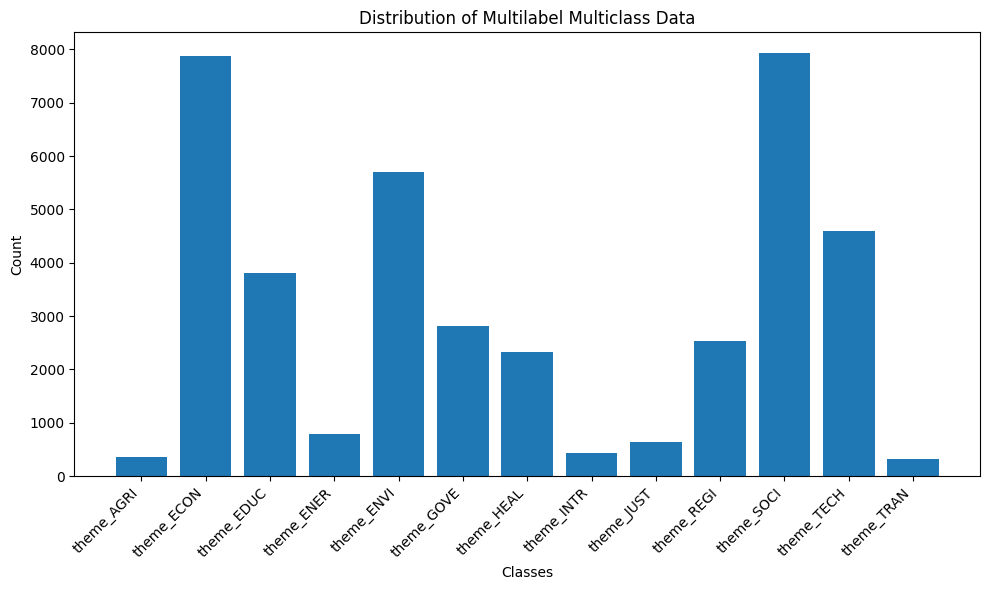

In [ ]:
# Plot the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(class_counts.index, class_counts.values, color='tab:blue')
ax.set_xlabel('Classes')
ax.set_ylabel('Count')
ax.set_title('Distribution of Multilabel Multiclass Data')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
class_name_map = {'theme_AGRI':'Agriculture', 'theme_ECON':'Economy', 'theme_EDUC':'Education', 'theme_ENER':'Energy',
       'theme_ENVI':'Environment', 'theme_GOVE':'Government', 'theme_HEAL':'Health', 'theme_INTR':'International', 'theme_JUST':'Justice',
       'theme_REGI':'Regions', 'theme_SOCI':'Society', 'theme_TECH':'Technology', 'theme_TRAN':'Transport'}

In [ ]:
# Function to get class names for each row
def get_class_names(row):
    class_names = []
    for col in row.index:
        if col.startswith('theme_') and row[col] == 1:
            class_name = class_name_map.get(col, col)
            class_names.append(col)
    return class_names

In [ ]:
# Apply the function to create a new column
encoded_data['all_themes'] = encoded_data.apply(get_class_names, axis=1)

In [ ]:
encoded_data.drop(['theme_AGRI', 'theme_ECON', 'theme_EDUC', 'theme_ENER',
       'theme_ENVI', 'theme_GOVE', 'theme_HEAL', 'theme_INTR', 'theme_JUST',
       'theme_REGI', 'theme_SOCI', 'theme_TECH', 'theme_TRAN'], inplace=True, axis=1)

In [ ]:
# encoded_data = encoded_data.rename(columns={'theme_AGRI':'Agriculture', 'theme_ECON':'Economy', 'theme_EDUC':'Education', 'theme_ENER':'Energy',
#        'theme_ENVI':'Environment', 'theme_GOVE':'Government', 'theme_HEAL':'Health', 'theme_INTR':'International', 'theme_JUST':'Justice',
#        'theme_REGI':'Regions', 'theme_SOCI':'Society', 'theme_TECH':'Technology', 'theme_TRAN':'Transport'})

In [ ]:
encoded_data

,TitlePlusDescription,all_themes
0,Areas of Potential Significant Flood Risk (APS...,"[theme_ENVI, theme_HEAL]"
1,coloniiTcolonii pasari in RBDD,[theme_ENVI]
2,INSPIRE Elevation (el-vec) IcelandELF Elevatio...,[theme_ENVI]
3,2019 - Post-election survey - First resultsA s...,[theme_GOVE]
4,Zone tampon RBDDZone tampon RBDD,[theme_ENVI]
...,...,...
29789,NFNET and Novel Food (Novel foods and food ing...,[theme_AGRI]
29790,Youth hostelsLocation of the youth hotels on t...,"[theme_ECON, theme_REGI]"
29791,Zen Car stationsLocation of the stations of th...,[theme_TRAN]
29792,Protection area 1 of water extraction - draina...,[theme_ENVI]


In [ ]:
# Function to replace values in list
def replace_values(row):
    return [class_name_map.get(col, col) for col in row['all_themes']]

# Apply the function to create a new column with replaced values
encoded_data['all_themes'] = encoded_data.apply(replace_values, axis=1)

In [ ]:
encoded_data

,TitlePlusDescription,all_themes
0,Areas of Potential Significant Flood Risk (APS...,"[Environment, Health]"
1,coloniiTcolonii pasari in RBDD,[Environment]
2,INSPIRE Elevation (el-vec) IcelandELF Elevatio...,[Environment]
3,2019 - Post-election survey - First resultsA s...,[Government]
4,Zone tampon RBDDZone tampon RBDD,[Environment]
...,...,...
29789,NFNET and Novel Food (Novel foods and food ing...,[Agriculture]
29790,Youth hostelsLocation of the youth hotels on t...,"[Economy, Regions]"
29791,Zen Car stationsLocation of the stations of th...,[Transport]
29792,Protection area 1 of water extraction - draina...,[Environment]


In [ ]:
encoded_data.to_csv("titleplusdescription.csv")

In [ ]:
random_indices = [6895,1361,17063,2984,22200,82,20941,20045,20534,17784,6597,461,20779,22201,17427,12655,13145,28347,
                  18513,21148,28347,6895,25351,27717,17147,4212,19771,211,5509,6550,22076,26511,10707,24054,24380,6129,
                  487,14588,29790,24276,6486,18131,7451,1381,26005,11114,17841,10612,18541,10061,8286,28464,6433,22227,
                  24184,20855,12971,10743,19766,8042,26544,5552,27967,23069,28046,26544,6819,17393,12412,4699,29422,21049,
                  15979,6450,5498,22477,2840,7545,28148,26704,27962,5864,128,14111,4934,14254,14103,3327,18983,26438,28012,
                  1994,23455,5236,29097,25410,2168,12911,22897,9,24115,11434,24621,23844,11730,22061,24997,26484,12363,9944,
                  12379,14111,13161,1569,10700,18259,9983,23802,20594,15198,12934,6093,21502,11104,7192]

In [ ]:
random_sample_Dataset = encoded_data.iloc[random_indices]

In [ ]:
random_sample_Dataset.to_csv("/content/drive/MyDrive/Thematic Annotation of Government data/Datasets/TitlePlusDescriptionRandom_Sample_125.csv")

In [ ]:
import pandas as pd
Translated_Random_sample_Dataset=pd.read_csv("/content/drive/MyDrive/Thematic Annotation of Government data/Datasets/TitlePlusDescriptionRandom_Sample_125 - TitlePlusDescriptionRandom_Sample_125.csv")

In [ ]:
Translated_Random_sample_Dataset

,Unnamed: 0,TitlePlusDescription,all_themes,Detect Language,Translated_Title_Description
0,6895,English-Finnish corpus from Finnish Informatio...,"['Education', 'Health', 'Society']",en,English-Finnish corpus from Finnish Informatio...
1,1361,biological zones of the EU's Atlantic AreaThis...,['Environment'],en,biological zones of the EU's Atlantic AreaThis...
2,17063,Graduados universitarios desempleados en 2019 ...,"['Economy', 'Education']",es,University graduates unemployed in 2019 accord...
3,2984,"Wildfire in San Felices de los Gallegos, Spain...","['Regions', 'Technology']",en,"Wildfire in San Felices de los Gallegos, Spain..."
4,22200,Main dwellings according to tenancy regime (AP...,"['Regions', 'Society']",en,Main dwellings according to tenancy regime (AP...
...,...,...,...,...,...
120,12934,Process steam from natural gas; heat plant; co...,"['Environment', 'Technology']",en,Process steam from natural gas; heat plant; co...
121,6093,Identifying the main cross-border obstacles to...,"['Education', 'Government', 'Health', 'Society']",en,Identifying the main cross-border obstacles to...
122,21502,"Population by municipality (with more than 20,...","['Regions', 'Society']",en,"Population by municipality (with more than 20,..."
123,11104,Gainfully employed nighttime population aged 1...,['Society'],en,Gainfully employed nighttime population aged 1...


In [ ]:
Translated_Random_sample_Dataset = Translated_Random_sample_Dataset.drop(['Unnamed: 0', 'TitlePlusDescription', 'Detect Language'], axis=1)

In [ ]:
Translated_Random_sample_Dataset.columns

Index(['all_themes', 'Translated_Title_Description'], dtype='object')

##### 10.1- Preprocessing without stop stopwords removing

Our origional dataset and PrefLabel_Definition is ready, but we need preliminary preprocessing such as converting to lower case, removing url, punction, and special characters from it. Keep in mind, we will not remove the stopwords because Glove consider them while creating embeddings. 

In [ ]:
# Text preprocessing function
import nltk
import re
import string
from nltk.corpus import words
from nltk.tokenize import word_tokenize, wordpunct_tokenize # for our dataset wordpunct is suitable because it also splits on punction marks 

nltk.download('wordnet')

def basic_preprocess_text(text):

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', ' ', text, flags=re.MULTILINE)

    tokens = wordpunct_tokenize(text)
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    
    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]


    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
  

    return " ".join(words)
# Now proceed with the rest of the steps (train-test split, tokenization, etc.) as shown in the previous code example.

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
Translated_Random_sample_Dataset['Preprocessed_Translated'] =  Translated_Random_sample_Dataset['Translated_Title_Description'].apply(basic_preprocess_text) ## Applying basic preprocessing steps to origional dataset

In [ ]:
Translated_Random_sample_Dataset[['Translated_Title_Description', 'Preprocessed_Translated']]

,Translated_Title_Description,Preprocessed_Translated
0,English-Finnish corpus from Finnish Informatio...,english finnish corpus from finnish informatio...
1,biological zones of the EU's Atlantic AreaThis...,biological zones of the eu s atlantic areathis...
2,University graduates unemployed in 2019 accord...,university graduates unemployed in according t...
3,"Wildfire in San Felices de los Gallegos, Spain...",wildfire in san felices de los gallegos spain ...
4,Main dwellings according to tenancy regime (AP...,main dwellings according to tenancy regime api...
...,...,...
120,Process steam from natural gas; heat plant; co...,process steam from natural gas heat plant cons...
121,Identifying the main cross-border obstacles to...,identifying the main cross border obstacles to...
122,"Population by municipality (with more than 20,...",population by municipality with more than inha...
123,Gainfully employed nighttime population aged 1...,gainfully employed nighttime population aged y...


In [9]:
import pandas as pd
prefLabelPlusDefinition=pd.read_csv("/content/drive/MyDrive/Thematic Annotation of Government data/Datasets/PrefLabel_plus_definition.csv")

In [10]:
prefLabelPlusDefinition

,s,preflabel,definition,prefLabel_plus_definition
0,http://publications.europa.eu/resource/authori...,Economy and finance,This concept identifies datasets covering such...,Economy and finance This concept identifies da...
1,http://publications.europa.eu/resource/authori...,"Education, culture and sport",This concept identifies datasets covering such...,"Education, culture and sport This concept iden..."
2,http://publications.europa.eu/resource/authori...,Education,This concept identifies datasets covering such...,Education This concept identifies datasets cov...
3,http://publications.europa.eu/resource/authori...,Energy,This concept identifies datasets covering the ...,Energy This concept identifies datasets coveri...
4,http://publications.europa.eu/resource/authori...,Environment,This concept identifies datasets covering the ...,Environment This concept identifies datasets c...
5,http://publications.europa.eu/resource/authori...,Government and public sector,This concept identifies datasets covering such...,Government and public sector This concept iden...
6,http://publications.europa.eu/resource/authori...,Health,This concept identifies datasets covering the ...,Health This concept identifies datasets coveri...
7,http://publications.europa.eu/resource/authori...,"Justice, legal system and public safety",This concept identifies datasets covering such...,"Justice, legal system and public safety This c..."
8,http://publications.europa.eu/resource/authori...,Population and society,This concept identifies datasets covering such...,Population and society This concept identifies...
9,http://publications.europa.eu/resource/authori...,Science and technology,This concept identifies datasets covering such...,Science and technology This concept identifies...


In [11]:
prefLabelPlusDefinition = prefLabelPlusDefinition.drop(2)

# reset the index of the DataFrame
prefLabelPlusDefinition = prefLabelPlusDefinition.reset_index(drop=True)
prefLabelPlusDefinition

,s,preflabel,definition,prefLabel_plus_definition
0,http://publications.europa.eu/resource/authori...,Economy and finance,This concept identifies datasets covering such...,Economy and finance This concept identifies da...
1,http://publications.europa.eu/resource/authori...,"Education, culture and sport",This concept identifies datasets covering such...,"Education, culture and sport This concept iden..."
2,http://publications.europa.eu/resource/authori...,Energy,This concept identifies datasets covering the ...,Energy This concept identifies datasets coveri...
3,http://publications.europa.eu/resource/authori...,Environment,This concept identifies datasets covering the ...,Environment This concept identifies datasets c...
4,http://publications.europa.eu/resource/authori...,Government and public sector,This concept identifies datasets covering such...,Government and public sector This concept iden...
5,http://publications.europa.eu/resource/authori...,Health,This concept identifies datasets covering the ...,Health This concept identifies datasets coveri...
6,http://publications.europa.eu/resource/authori...,"Justice, legal system and public safety",This concept identifies datasets covering such...,"Justice, legal system and public safety This c..."
7,http://publications.europa.eu/resource/authori...,Population and society,This concept identifies datasets covering such...,Population and society This concept identifies...
8,http://publications.europa.eu/resource/authori...,Science and technology,This concept identifies datasets covering such...,Science and technology This concept identifies...
9,http://publications.europa.eu/resource/authori...,Transport,This concept identifies datasets covering the ...,Transport This concept identifies datasets cov...


In [ ]:
prefLabelPlusDefinition["preprocessed_prefLabel_plus_definition"] = prefLabelPlusDefinition["prefLabel_plus_definition"].apply(basic_preprocess_text) ## Applying basic preprocessing steps to PrefLabel+defintion

In [ ]:
prefLabelPlusDefinition[['prefLabel_plus_definition',	'preprocessed_prefLabel_plus_definition']]

,prefLabel_plus_definition,preprocessed_prefLabel_plus_definition
0,Economy and finance This concept identifies da...,economy and finance this concept identifies da...
1,"Education, culture and sport This concept iden...",education culture and sport this concept ident...
2,Education This concept identifies datasets cov...,education this concept identifies datasets cov...
3,Energy This concept identifies datasets coveri...,energy this concept identifies datasets coveri...
4,Environment This concept identifies datasets c...,environment this concept identifies datasets c...
5,Government and public sector This concept iden...,government and public sector this concept iden...
6,Health This concept identifies datasets coveri...,health this concept identifies datasets coveri...
7,"Justice, legal system and public safety This c...",justice legal system and public safety this co...
8,Population and society This concept identifies...,population and society this concept identifies...
9,Science and technology This concept identifies...,science and technology this concept identifies...


In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from transformers import BertTokenizer, BertModel
import torch

tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased') # actual words representation are kept in cased model but in uncased everything is lower
model = BertModel.from_pretrained('bert-base-multilingual-cased')

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
def get_bert_embedding(text):
    encoded_text = tokenizer(text, padding=True, truncation=True, return_tensors='pt')
    with torch.no_grad():
        model_output = model(**encoded_text)
    embeddings = model_output.last_hidden_state[:, 0, :].squeeze().numpy()  ##Getting weights from the last layer of the BERT
    return embeddings

In [ ]:
definition_embeddings = []
for definition in prefLabelPlusDefinition["preprocessed_prefLabel_plus_definition"]:
    print("PrefLabel+Definition    :", definition)
    embedding = get_bert_embedding(definition)
    definition_embeddings.append(embedding)

PrefLabel+Definition    : economy and finance this concept identifies datasets covering such domains as economy or finance economy is the area of the production distribution and trade as well as consumption of goods and services by different agents in its broadest sense the economy is defined as a social domain that emphasize the practices discourses and material expressions associated with the production use and management of resources finance is the study of money and how it is used specifically it deals with the questions of how an individual company or government acquires the money needed and how they then spend or invest that money dataset examples tenders electronic daily ted public procurement notices from the eu and beyond general government deficit and surplus quarterly data
PrefLabel+Definition    : education culture and sport this concept identifies datasets covering such domains as education culture or sport education is the process of facilitating learning or the acquisiti

In [ ]:
# Translated_Random_sample_Dataset['Preprocessed_Translated']
instance_embeddings = []
counter = 0
for instance in Translated_Random_sample_Dataset['Preprocessed_Translated']:  
    counter =  counter + 1
    embedding = get_bert_embedding(instance)
    print("dataset instances :::: {}  :::: {}".format(counter, instance))
    instance_embeddings.append(embedding)

dataset instances :::: 1  :::: english finnish corpus from finnish information bank processed finland in your language information about finland moving to finland living in finland this dataset has been created within the framework of the european language resource coordination elrc connecting europe facility automated translation cef at actions smart and smart for further information on the project
dataset instances :::: 2  :::: biological zones of the eu s atlantic areathis layer is a model of the biological zones of the eu s atlantic area it was performed within the framework of meshatlantic project interreg atlantic area program this layer was modelled with the use of bespoke base layers that were the bathymetry wave wavelength and the kdpar the biological zones boundaries were defined in the following way infralittoral lower limit limit at which the percentage of light reaching the seabed is the percentage of light layer was calculated by intersecting the kdpar and the bathymetry 

In [ ]:
similarities = []
from sklearn.metrics.pairwise import cosine_similarity

similarities = cosine_similarity(instance_embeddings, definition_embeddings)

In [ ]:
category_labels = ['Economy', 'Education', 'Energy','Environment','Government','Health', 'Justice', 'Society', 'Technology', 
                   'Transport', 'Agriculture', 'International', 'Regions'] #['Agriculture', 'Economy', 'Education', 'Energy','Environment', 'Government', 'Health', 'International', 'Justice','Regions', 'Society', 'Technology', 'Transport']

In [ ]:
category_labels

['Economy',
 'Education',
 'Energy',
 'Environment',
 'Government',
 'Health',
 'Justice',
 'Society',
 'Technology',
 'Transport',
 'Agriculture',
 'International',
 'Regions']

One maximum Similarity of the Definition+PrefLabel and Dataset

In [ ]:
category_labels[np.argmax(similarities[0])]

'Health'

In [ ]:
#find the index of highest value in each similarty 
max_indices = np.argmax(similarities, axis=1)

# fetch corresponding value from other list based on max index
max_category = [category_labels[i] for i in max_indices]

In [ ]:
predict_BERT_Sentence_COSINE=pd.DataFrame({'predict_BERT_Sentence_COSINE':max_category})

In [ ]:
predict_BERT_Sentence_COSINE.predict_BERT_Sentence_COSINE.value_counts()

Health           53
Technology       15
Regions          13
Education        13
International     9
Government        8
Environment       3
Society           3
Economy           3
Energy            2
Transport         2
Justice           1
Name: predict_BERT_Sentence_COSINE, dtype: int64

In [ ]:
predict_BERT_Sentence_COSINE

,predict_BERT_Sentence_COSINE
0,Health
1,Technology
2,Health
3,Environment
4,Regions
...,...
120,Energy
121,Environment
122,Regions
123,Technology


In [ ]:
result = pd.concat([Translated_Random_sample_Dataset, predict_BERT_Sentence_COSINE], axis=1)

In [ ]:
result

,all_themes,Translated_Title_Description,Preprocessed_Translated,predict_BERT_Sentence_COSINE
0,"['Education', 'Health', 'Society']",English-Finnish corpus from Finnish Informatio...,english finnish corpus from finnish informatio...,Health
1,['Environment'],biological zones of the EU's Atlantic AreaThis...,biological zones of the eu s atlantic areathis...,Technology
2,"['Economy', 'Education']",University graduates unemployed in 2019 accord...,university graduates unemployed in according t...,Health
3,"['Regions', 'Technology']","Wildfire in San Felices de los Gallegos, Spain...",wildfire in san felices de los gallegos spain ...,Environment
4,"['Regions', 'Society']",Main dwellings according to tenancy regime (AP...,main dwellings according to tenancy regime api...,Regions
...,...,...,...,...
120,"['Environment', 'Technology']",Process steam from natural gas; heat plant; co...,process steam from natural gas heat plant cons...,Energy
121,"['Education', 'Government', 'Health', 'Society']",Identifying the main cross-border obstacles to...,identifying the main cross border obstacles to...,Environment
122,"['Regions', 'Society']","Population by municipality (with more than 20,...",population by municipality with more than inha...,Regions
123,['Society'],Gainfully employed nighttime population aged 1...,gainfully employed nighttime population aged y...,Technology


In [ ]:
def success_criteria(row):
    if row['predict_BERT_Sentence_COSINE'] in row['all_themes']:
        return 'success'
    else:
        return 'failure'

In [ ]:
# apply the function to create a new column; if one value is matched to the origional themes
result['criteria'] = result.apply(lambda row: success_criteria(row), axis=1)

In [ ]:
result.criteria.value_counts()

failure    94
success    31
Name: criteria, dtype: int64

In [ ]:
Agreement = 31/125

In [ ]:
Agreement

0.248

Top 2 Maximum values from the Cosine similarity matrix 

In [ ]:
import numpy as np

# get the indices of the top two maximum values in each row
top2_indices = np.argsort(similarities, axis=1)[:, -2:]

category_labels

# fetch the corresponding values based on the indices
top2_themes = [[category_labels[i] for i in row_indices] for row_indices in top2_indices]

In [ ]:
print(top2_themes[0:5])

[['Technology', 'Health'], ['Society', 'Technology'], ['International', 'Health'], ['Transport', 'Environment'], ['Health', 'Regions']]


In [ ]:
Prediction_BERT_top_2 = pd.DataFrame({'Prediction_BERT_Sentence_top_2_themes':top2_themes})

In [ ]:
# convert string list column to list column
import ast
# Convert the string representation of the list to a list
Translated_Random_sample_Dataset['all_themes'] = Translated_Random_sample_Dataset['all_themes'].apply(ast.literal_eval)

In [ ]:
result2 = pd.concat([Translated_Random_sample_Dataset, Prediction_BERT_top_2], axis=1)

In [ ]:
result2

,all_themes,Translated_Title_Description,Preprocessed_Translated,Prediction_BERT_Sentence_top_2_themes
0,"[Education, Health, Society]",English-Finnish corpus from Finnish Informatio...,english finnish corpus from finnish informatio...,"[Technology, Health]"
1,[Environment],biological zones of the EU's Atlantic AreaThis...,biological zones of the eu s atlantic areathis...,"[Society, Technology]"
2,"[Economy, Education]",University graduates unemployed in 2019 accord...,university graduates unemployed in according t...,"[International, Health]"
3,"[Regions, Technology]","Wildfire in San Felices de los Gallegos, Spain...",wildfire in san felices de los gallegos spain ...,"[Transport, Environment]"
4,"[Regions, Society]",Main dwellings according to tenancy regime (AP...,main dwellings according to tenancy regime api...,"[Health, Regions]"
...,...,...,...,...
120,"[Environment, Technology]",Process steam from natural gas; heat plant; co...,process steam from natural gas heat plant cons...,"[Education, Energy]"
121,"[Education, Government, Health, Society]",Identifying the main cross-border obstacles to...,identifying the main cross border obstacles to...,"[Agriculture, Environment]"
122,"[Regions, Society]","Population by municipality (with more than 20,...",population by municipality with more than inha...,"[Technology, Regions]"
123,[Society],Gainfully employed nighttime population aged 1...,gainfully employed nighttime population aged y...,"[Health, Technology]"


In [ ]:
# Define a function to check for intersection between two lists
def criteria_of_success(row):
    all_themes = list(row['all_themes'])
    predictions = row['Prediction_BERT_Sentence_top_2_themes']
    # print(set(all_themes))
    if set(all_themes).intersection(set(predictions)):
        return 'success'
    else:
        return 'failure'

In [ ]:
# Apply the function to create a new column
result2['Criteria_Success_top_2'] = result2.apply(criteria_of_success, axis=1)

In [ ]:
result2

,all_themes,Translated_Title_Description,Preprocessed_Translated,Prediction_BERT_Sentence_top_2_themes,Criteria_Success_top_2
0,"[Education, Health, Society]",English-Finnish corpus from Finnish Informatio...,english finnish corpus from finnish informatio...,"[Technology, Health]",success
1,[Environment],biological zones of the EU's Atlantic AreaThis...,biological zones of the eu s atlantic areathis...,"[Society, Technology]",failure
2,"[Economy, Education]",University graduates unemployed in 2019 accord...,university graduates unemployed in according t...,"[International, Health]",failure
3,"[Regions, Technology]","Wildfire in San Felices de los Gallegos, Spain...",wildfire in san felices de los gallegos spain ...,"[Transport, Environment]",failure
4,"[Regions, Society]",Main dwellings according to tenancy regime (AP...,main dwellings according to tenancy regime api...,"[Health, Regions]",success
...,...,...,...,...,...
120,"[Environment, Technology]",Process steam from natural gas; heat plant; co...,process steam from natural gas heat plant cons...,"[Education, Energy]",failure
121,"[Education, Government, Health, Society]",Identifying the main cross-border obstacles to...,identifying the main cross border obstacles to...,"[Agriculture, Environment]",failure
122,"[Regions, Society]","Population by municipality (with more than 20,...",population by municipality with more than inha...,"[Technology, Regions]",success
123,[Society],Gainfully employed nighttime population aged 1...,gainfully employed nighttime population aged y...,"[Health, Technology]",failure


In [ ]:
result2.Criteria_Success_top_2.value_counts()

failure    83
success    42
Name: Criteria_Success_top_2, dtype: int64

In [ ]:
print("Agreement for the top 2 themes prediction using BERT   :", 42 / 125)

Agreement for the top 2 themes prediction using BERT   : 0.336


Top 3 Maximum values from the Cosine similarity matrix

In [ ]:
import numpy as np


# get the indices of the top three maximum values in each row
top3_indices = np.argsort(similarities, axis=1)[:, -3:]

category_labels

# fetch the corresponding values based on the indices
top3_themes = [[category_labels[i] for i in row_indices] for row_indices in top3_indices]



In [ ]:
print(top3_themes[0:5])

[['International', 'Technology', 'Health'], ['Health', 'Society', 'Technology'], ['Technology', 'International', 'Health'], ['Agriculture', 'Transport', 'Environment'], ['International', 'Health', 'Regions']]


In [ ]:
Prediction_BERT_top_3_themes = pd.DataFrame({'Prediction_BERT_top_3_themes':top3_themes})

In [ ]:
result3 = pd.concat([Translated_Random_sample_Dataset, Prediction_BERT_top_3_themes], axis=1)

In [ ]:
result3

,all_themes,Translated_Title_Description,Preprocessed_Translated,Prediction_BERT_top_3_themes
0,"[Education, Health, Society]",English-Finnish corpus from Finnish Informatio...,english finnish corpus from finnish informatio...,"[International, Technology, Health]"
1,[Environment],biological zones of the EU's Atlantic AreaThis...,biological zones of the eu s atlantic areathis...,"[Health, Society, Technology]"
2,"[Economy, Education]",University graduates unemployed in 2019 accord...,university graduates unemployed in according t...,"[Technology, International, Health]"
3,"[Regions, Technology]","Wildfire in San Felices de los Gallegos, Spain...",wildfire in san felices de los gallegos spain ...,"[Agriculture, Transport, Environment]"
4,"[Regions, Society]",Main dwellings according to tenancy regime (AP...,main dwellings according to tenancy regime api...,"[International, Health, Regions]"
...,...,...,...,...
120,"[Environment, Technology]",Process steam from natural gas; heat plant; co...,process steam from natural gas heat plant cons...,"[Justice, Education, Energy]"
121,"[Education, Government, Health, Society]",Identifying the main cross-border obstacles to...,identifying the main cross border obstacles to...,"[Transport, Agriculture, Environment]"
122,"[Regions, Society]","Population by municipality (with more than 20,...",population by municipality with more than inha...,"[Health, Technology, Regions]"
123,[Society],Gainfully employed nighttime population aged 1...,gainfully employed nighttime population aged y...,"[International, Health, Technology]"


In [ ]:
# Define a function to check for intersection between two lists
def criteria_of_success_3(row):
    all_themes = row['all_themes']
    predictions = row['Prediction_BERT_top_3_themes']
    if set(all_themes).intersection(set(predictions)):
        return 'success'
    else:
        return 'failure'

In [ ]:
# Apply the function to create a new column
result3['Criteria_Success_top_3'] = result3.apply(criteria_of_success_3, axis=1)

In [ ]:
result3

,all_themes,Translated_Title_Description,Preprocessed_Translated,Prediction_BERT_top_3_themes,Criteria_Success_top_3
0,"[Education, Health, Society]",English-Finnish corpus from Finnish Informatio...,english finnish corpus from finnish informatio...,"[International, Technology, Health]",success
1,[Environment],biological zones of the EU's Atlantic AreaThis...,biological zones of the eu s atlantic areathis...,"[Health, Society, Technology]",failure
2,"[Economy, Education]",University graduates unemployed in 2019 accord...,university graduates unemployed in according t...,"[Technology, International, Health]",failure
3,"[Regions, Technology]","Wildfire in San Felices de los Gallegos, Spain...",wildfire in san felices de los gallegos spain ...,"[Agriculture, Transport, Environment]",failure
4,"[Regions, Society]",Main dwellings according to tenancy regime (AP...,main dwellings according to tenancy regime api...,"[International, Health, Regions]",success
...,...,...,...,...,...
120,"[Environment, Technology]",Process steam from natural gas; heat plant; co...,process steam from natural gas heat plant cons...,"[Justice, Education, Energy]",failure
121,"[Education, Government, Health, Society]",Identifying the main cross-border obstacles to...,identifying the main cross border obstacles to...,"[Transport, Agriculture, Environment]",failure
122,"[Regions, Society]","Population by municipality (with more than 20,...",population by municipality with more than inha...,"[Health, Technology, Regions]",success
123,[Society],Gainfully employed nighttime population aged 1...,gainfully employed nighttime population aged y...,"[International, Health, Technology]",failure


In [ ]:
result3.Criteria_Success_top_3.value_counts()

failure    76
success    49
Name: Criteria_Success_top_3, dtype: int64

In [ ]:
print("Agreement for the top 3 themes prediction using BERT sentence embedding   :", 49 / 125)

Agreement for the top 3 themes prediction using BERT sentence embedding   : 0.392


#### 11- BERT With Hugging Face model (Title + Description) 125 Random samples/instances


In [12]:
import pandas as pd
Translated_Random_sample_Dataset=pd.read_csv("/content/drive/MyDrive/Thematic Annotation of Government data/Datasets/TitlePlusDescriptionRandom_Sample_125 - TitlePlusDescriptionRandom_Sample_125.csv")

In [13]:
Translated_Random_sample_Dataset

,Unnamed: 0,TitlePlusDescription,all_themes,Detect Language,Translated_Title_Description
0,6895,English-Finnish corpus from Finnish Informatio...,"['Education', 'Health', 'Society']",en,English-Finnish corpus from Finnish Informatio...
1,1361,biological zones of the EU's Atlantic AreaThis...,['Environment'],en,biological zones of the EU's Atlantic AreaThis...
2,17063,Graduados universitarios desempleados en 2019 ...,"['Economy', 'Education']",es,University graduates unemployed in 2019 accord...
3,2984,"Wildfire in San Felices de los Gallegos, Spain...","['Regions', 'Technology']",en,"Wildfire in San Felices de los Gallegos, Spain..."
4,22200,Main dwellings according to tenancy regime (AP...,"['Regions', 'Society']",en,Main dwellings according to tenancy regime (AP...
...,...,...,...,...,...
120,12934,Process steam from natural gas; heat plant; co...,"['Environment', 'Technology']",en,Process steam from natural gas; heat plant; co...
121,6093,Identifying the main cross-border obstacles to...,"['Education', 'Government', 'Health', 'Society']",en,Identifying the main cross-border obstacles to...
122,21502,"Population by municipality (with more than 20,...","['Regions', 'Society']",en,"Population by municipality (with more than 20,..."
123,11104,Gainfully employed nighttime population aged 1...,['Society'],en,Gainfully employed nighttime population aged 1...


In [ ]:
Translated_Random_sample_Dataset = Translated_Random_sample_Dataset.drop(['Unnamed: 0', 'TitlePlusDescription', 'Detect Language'], axis=1)

In [ ]:
Translated_Random_sample_Dataset.columns

Index(['all_themes', 'Translated_Title_Description'], dtype='object')

##### 10.1- Preprocessing without stop stopwords removing

Our origional dataset and PrefLabel_Definition is ready, but we need preliminary preprocessing such as converting to lower case, removing url, punction, and special characters from it. Keep in mind, we will not remove the stopwords because Glove consider them while creating embeddings. 

In [ ]:
# Text preprocessing function
import nltk
import re
import string
from nltk.corpus import words
from nltk.tokenize import word_tokenize, wordpunct_tokenize # for our dataset wordpunct is suitable because it also splits on punction marks 

nltk.download('wordnet')

def basic_preprocess_text(text):

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', ' ', text, flags=re.MULTILINE)

    tokens = wordpunct_tokenize(text)
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    
    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]


    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
  

    return " ".join(words)
# Now proceed with the rest of the steps (train-test split, tokenization, etc.) as shown in the previous code example.

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
Translated_Random_sample_Dataset['Preprocessed_Translated'] =  Translated_Random_sample_Dataset['Translated_Title_Description'].apply(basic_preprocess_text) ## Applying basic preprocessing steps to origional dataset

In [ ]:
Translated_Random_sample_Dataset[['Translated_Title_Description', 'Preprocessed_Translated']]

,Translated_Title_Description,Preprocessed_Translated
0,English-Finnish corpus from Finnish Informatio...,english finnish corpus from finnish informatio...
1,biological zones of the EU's Atlantic AreaThis...,biological zones of the eu s atlantic areathis...
2,University graduates unemployed in 2019 accord...,university graduates unemployed in according t...
3,"Wildfire in San Felices de los Gallegos, Spain...",wildfire in san felices de los gallegos spain ...
4,Main dwellings according to tenancy regime (AP...,main dwellings according to tenancy regime api...
...,...,...
120,Process steam from natural gas; heat plant; co...,process steam from natural gas heat plant cons...
121,Identifying the main cross-border obstacles to...,identifying the main cross border obstacles to...
122,"Population by municipality (with more than 20,...",population by municipality with more than inha...
123,Gainfully employed nighttime population aged 1...,gainfully employed nighttime population aged y...


In [14]:
import pandas as pd
prefLabelPlusDefinition=pd.read_csv("/content/drive/MyDrive/Thematic Annotation of Government data/Datasets/PrefLabel_plus_definition.csv")

In [ ]:
prefLabelPlusDefinition

,s,preflabel,definition,prefLabel_plus_definition
0,http://publications.europa.eu/resource/authori...,Economy and finance,This concept identifies datasets covering such...,Economy and finance This concept identifies da...
1,http://publications.europa.eu/resource/authori...,"Education, culture and sport",This concept identifies datasets covering such...,"Education, culture and sport This concept iden..."
2,http://publications.europa.eu/resource/authori...,Education,This concept identifies datasets covering such...,Education This concept identifies datasets cov...
3,http://publications.europa.eu/resource/authori...,Energy,This concept identifies datasets covering the ...,Energy This concept identifies datasets coveri...
4,http://publications.europa.eu/resource/authori...,Environment,This concept identifies datasets covering the ...,Environment This concept identifies datasets c...
5,http://publications.europa.eu/resource/authori...,Government and public sector,This concept identifies datasets covering such...,Government and public sector This concept iden...
6,http://publications.europa.eu/resource/authori...,Health,This concept identifies datasets covering the ...,Health This concept identifies datasets coveri...
7,http://publications.europa.eu/resource/authori...,"Justice, legal system and public safety",This concept identifies datasets covering such...,"Justice, legal system and public safety This c..."
8,http://publications.europa.eu/resource/authori...,Population and society,This concept identifies datasets covering such...,Population and society This concept identifies...
9,http://publications.europa.eu/resource/authori...,Science and technology,This concept identifies datasets covering such...,Science and technology This concept identifies...


In [ ]:
prefLabelPlusDefinition = prefLabelPlusDefinition.drop(2)

# reset the index of the DataFrame
prefLabelPlusDefinition = prefLabelPlusDefinition.reset_index(drop=True)
prefLabelPlusDefinition

,s,preflabel,definition,prefLabel_plus_definition
0,http://publications.europa.eu/resource/authori...,Economy and finance,This concept identifies datasets covering such...,Economy and finance This concept identifies da...
1,http://publications.europa.eu/resource/authori...,"Education, culture and sport",This concept identifies datasets covering such...,"Education, culture and sport This concept iden..."
2,http://publications.europa.eu/resource/authori...,Energy,This concept identifies datasets covering the ...,Energy This concept identifies datasets coveri...
3,http://publications.europa.eu/resource/authori...,Environment,This concept identifies datasets covering the ...,Environment This concept identifies datasets c...
4,http://publications.europa.eu/resource/authori...,Government and public sector,This concept identifies datasets covering such...,Government and public sector This concept iden...
5,http://publications.europa.eu/resource/authori...,Health,This concept identifies datasets covering the ...,Health This concept identifies datasets coveri...
6,http://publications.europa.eu/resource/authori...,"Justice, legal system and public safety",This concept identifies datasets covering such...,"Justice, legal system and public safety This c..."
7,http://publications.europa.eu/resource/authori...,Population and society,This concept identifies datasets covering such...,Population and society This concept identifies...
8,http://publications.europa.eu/resource/authori...,Science and technology,This concept identifies datasets covering such...,Science and technology This concept identifies...
9,http://publications.europa.eu/resource/authori...,Transport,This concept identifies datasets covering the ...,Transport This concept identifies datasets cov...


In [ ]:
prefLabelPlusDefinition["preprocessed_prefLabel_plus_definition"] = prefLabelPlusDefinition["prefLabel_plus_definition"].apply(basic_preprocess_text) ## Applying basic preprocessing steps to PrefLabel+defintion

In [ ]:
prefLabelPlusDefinition[['prefLabel_plus_definition',	'preprocessed_prefLabel_plus_definition']]

,prefLabel_plus_definition,preprocessed_prefLabel_plus_definition
0,Economy and finance This concept identifies da...,economy and finance this concept identifies da...
1,"Education, culture and sport This concept iden...",education culture and sport this concept ident...
2,Energy This concept identifies datasets coveri...,energy this concept identifies datasets coveri...
3,Environment This concept identifies datasets c...,environment this concept identifies datasets c...
4,Government and public sector This concept iden...,government and public sector this concept iden...
5,Health This concept identifies datasets coveri...,health this concept identifies datasets coveri...
6,"Justice, legal system and public safety This c...",justice legal system and public safety this co...
7,Population and society This concept identifies...,population and society this concept identifies...
8,Science and technology This concept identifies...,science and technology this concept identifies...
9,Transport This concept identifies datasets cov...,transport this concept identifies datasets cov...


In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch
import torch.nn.functional as F


# Load model from HuggingFace Hub
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')
model = AutoModel.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')

In [ ]:
#Mean Pooling - Take attention mask into account for correct averaging
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)

In [ ]:
def get_bert_embedding(text):
    encoded_input = tokenizer(text, padding=True, truncation=True, return_tensors='pt')
    with torch.no_grad():
        model_output = model(**encoded_input)
    # Perform pooling
    sentence_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])

    # Normalize embeddings
    sentence_embeddings = F.normalize(sentence_embeddings, p=2, dim=1)

    # embeddings = model_output.last_hidden_state[:, 0, :].squeeze().numpy()  ##Getting weights from the last layer of the BERT
    return sentence_embeddings

In [ ]:
definition_embeddings = []
for definition in prefLabelPlusDefinition["preprocessed_prefLabel_plus_definition"]:
    print("PrefLabel+Definition    :", definition)
    embedding = get_bert_embedding(definition)
    definition_embeddings.append(embedding)

PrefLabel+Definition    : economy and finance this concept identifies datasets covering such domains as economy or finance economy is the area of the production distribution and trade as well as consumption of goods and services by different agents in its broadest sense the economy is defined as a social domain that emphasize the practices discourses and material expressions associated with the production use and management of resources finance is the study of money and how it is used specifically it deals with the questions of how an individual company or government acquires the money needed and how they then spend or invest that money dataset examples tenders electronic daily ted public procurement notices from the eu and beyond general government deficit and surplus quarterly data
PrefLabel+Definition    : education culture and sport this concept identifies datasets covering such domains as education culture or sport education is the process of facilitating learning or the acquisiti

In [ ]:
definition_embeddings[0].shape

torch.Size([1, 384])

In [ ]:
%%time
instance_embeddings = []
counter = 0
for instance in Translated_Random_sample_Dataset['Preprocessed_Translated']:  
  counter =  counter + 1
  embedding = get_bert_embedding(instance)
  print("dataset instances :::: {}  :::: {}".format(counter, instance))
  instance_embeddings.append(embedding)

dataset instances :::: 1  :::: english finnish corpus from finnish information bank processed finland in your language information about finland moving to finland living in finland this dataset has been created within the framework of the european language resource coordination elrc connecting europe facility automated translation cef at actions smart and smart for further information on the project
dataset instances :::: 2  :::: biological zones of the eu s atlantic areathis layer is a model of the biological zones of the eu s atlantic area it was performed within the framework of meshatlantic project interreg atlantic area program this layer was modelled with the use of bespoke base layers that were the bathymetry wave wavelength and the kdpar the biological zones boundaries were defined in the following way infralittoral lower limit limit at which the percentage of light reaching the seabed is the percentage of light layer was calculated by intersecting the kdpar and the bathymetry 

In [ ]:
similarities = []

for tensor1 in instance_embeddings:
    row = []
    for tensor2 in definition_embeddings:
        similarity = cosine_similarity(tensor1.reshape(1, -1), tensor2.reshape(1, -1))
        row.append(similarity[0][0])
    similarities.append(row)

print(similarities)

[[0.24087554, 0.21953008, 0.22889766, 0.19382238, 0.26280007, 0.28767005, 0.26003742, 0.161164, 0.21255866, 0.29405463, 0.27732486, 0.3301894, 0.31193015], [0.07155866, 0.100444846, 0.20935765, 0.21860328, 0.068802364, 0.12392771, 0.14547971, 0.100363076, 0.20224155, 0.16485158, 0.24970049, 0.1621652, 0.21015397], [0.12746873, 0.1659844, 0.077369, -0.017245233, 0.2033953, 0.19706656, 0.1267289, 0.16789871, 0.17404044, 0.06557483, 0.036823727, 0.118845895, 0.18206507], [-0.052923378, 0.025877628, 0.1477895, 0.19086424, 0.058892287, 0.07358402, 0.21634758, 0.029352058, 0.121214285, 0.008602144, 0.13334818, 0.058941454, 0.10688549], [0.12356581, 0.10771245, 0.18766479, 0.20110425, 0.26908055, 0.20042041, 0.21782354, 0.3884422, 0.07173142, 0.08954965, 0.14490287, 0.093642265, 0.31610847], [0.067265615, 0.010911504, 0.08271475, 0.15369388, 0.06561768, 0.019824062, -0.0029846672, 0.13559386, 0.11068147, 0.117341176, 0.3521759, -0.015005162, 0.07966025], [0.18277067, 0.3108757, 0.19437802, 0.

In [ ]:
len(similarities[2])

13

In [ ]:
category_labels = ['Economy', 'Education', 'Energy','Environment','Government','Health', 'Justice', 'Society', 'Technology', 
                   'Transport', 'Agriculture', 'International', 'Regions'] #['Agriculture', 'Economy', 'Education', 'Energy','Environment', 'Government', 'Health', 'International', 'Justice','Regions', 'Society', 'Technology', 'Transport']

In [ ]:
category_labels

['Economy',
 'Education',
 'Energy',
 'Environment',
 'Government',
 'Health',
 'Justice',
 'Society',
 'Technology',
 'Transport',
 'Agriculture',
 'International',
 'Regions']

One maximum Similarity of the Definition+PrefLabel and Dataset

In [ ]:
category_labels[np.argmax(similarities[0])]

'International'

In [ ]:
#find the index of highest value in each similarty 
max_indices = np.argmax(similarities, axis=1)

# fetch corresponding value from other list based on max index
max_category = [category_labels[i] for i in max_indices]

In [ ]:
predict_BERT_Sentence_COSINE=pd.DataFrame({'predict_BERT_Hugging_Face_Sentence_COSINE':max_category})

In [ ]:
predict_BERT_Sentence_COSINE.predict_BERT_Hugging_Face_Sentence_COSINE.value_counts()

Agriculture      25
Society          19
Environment      15
Regions          13
International    12
Health           10
Education         9
Economy           5
Justice           4
Technology        4
Energy            4
Government        3
Transport         2
Name: predict_BERT_Hugging_Face_Sentence_COSINE, dtype: int64

In [ ]:
predict_BERT_Sentence_COSINE

,predict_BERT_Hugging_Face_Sentence_COSINE
0,International
1,Agriculture
2,Government
3,Justice
4,Society
...,...
120,Energy
121,Economy
122,Society
123,Regions


In [ ]:
origional_dataset=encoded_data.iloc[random_indices].reset_index()

In [ ]:
result = pd.concat([Translated_Random_sample_Dataset, predict_BERT_Sentence_COSINE], axis=1)

In [ ]:
result

,all_themes,Translated_Title_Description,Preprocessed_Translated,predict_BERT_Hugging_Face_Sentence_COSINE
0,"['Education', 'Health', 'Society']",English-Finnish corpus from Finnish Informatio...,english finnish corpus from finnish informatio...,International
1,['Environment'],biological zones of the EU's Atlantic AreaThis...,biological zones of the eu s atlantic areathis...,Agriculture
2,"['Economy', 'Education']",University graduates unemployed in 2019 accord...,university graduates unemployed in according t...,Government
3,"['Regions', 'Technology']","Wildfire in San Felices de los Gallegos, Spain...",wildfire in san felices de los gallegos spain ...,Justice
4,"['Regions', 'Society']",Main dwellings according to tenancy regime (AP...,main dwellings according to tenancy regime api...,Society
...,...,...,...,...
120,"['Environment', 'Technology']",Process steam from natural gas; heat plant; co...,process steam from natural gas heat plant cons...,Energy
121,"['Education', 'Government', 'Health', 'Society']",Identifying the main cross-border obstacles to...,identifying the main cross border obstacles to...,Economy
122,"['Regions', 'Society']","Population by municipality (with more than 20,...",population by municipality with more than inha...,Society
123,['Society'],Gainfully employed nighttime population aged 1...,gainfully employed nighttime population aged y...,Regions


In [ ]:
def success_criteria(row):
    if row['predict_BERT_Hugging_Face_Sentence_COSINE'] in row['all_themes']:
        return 'success'
    else:
        return 'failure'

In [ ]:
# apply the function to create a new column; if one value is matched to the origional themes
result['criteria'] = result.apply(lambda row: success_criteria(row), axis=1)

In [ ]:
result.criteria.value_counts()

failure    76
success    49
Name: criteria, dtype: int64

In [ ]:
Agreement = 49/125

In [ ]:
Agreement

0.392

Top 2 Maximum values from the Cosine similarity matrix 

In [ ]:
import numpy as np

# get the indices of the top two maximum values in each row
top2_indices = np.argsort(similarities, axis=1)[:, -2:]

category_labels

# fetch the corresponding values based on the indices
top2_themes = [[category_labels[i] for i in row_indices] for row_indices in top2_indices]

In [ ]:
print(top2_themes[0:5])

[['Regions', 'International'], ['Environment', 'Agriculture'], ['Health', 'Government'], ['Environment', 'Justice'], ['Regions', 'Society']]


In [ ]:
Prediction_BERT_top_2 = pd.DataFrame({'Prediction_BERT_Sentence_top_2_themes':top2_themes})

In [ ]:
import ast
Translated_Random_sample_Dataset['all_themes'] = Translated_Random_sample_Dataset['all_themes'].apply(ast.literal_eval) 

In [ ]:
result2 = pd.concat([Translated_Random_sample_Dataset, Prediction_BERT_top_2], axis=1)

In [ ]:
result2

,all_themes,Translated_Title_Description,Preprocessed_Translated,Prediction_BERT_Sentence_top_2_themes
0,"[Education, Health, Society]",English-Finnish corpus from Finnish Informatio...,english finnish corpus from finnish informatio...,"[Regions, International]"
1,[Environment],biological zones of the EU's Atlantic AreaThis...,biological zones of the eu s atlantic areathis...,"[Environment, Agriculture]"
2,"[Economy, Education]",University graduates unemployed in 2019 accord...,university graduates unemployed in according t...,"[Health, Government]"
3,"[Regions, Technology]","Wildfire in San Felices de los Gallegos, Spain...",wildfire in san felices de los gallegos spain ...,"[Environment, Justice]"
4,"[Regions, Society]",Main dwellings according to tenancy regime (AP...,main dwellings according to tenancy regime api...,"[Regions, Society]"
...,...,...,...,...
120,"[Environment, Technology]",Process steam from natural gas; heat plant; co...,process steam from natural gas heat plant cons...,"[Environment, Energy]"
121,"[Education, Government, Health, Society]",Identifying the main cross-border obstacles to...,identifying the main cross border obstacles to...,"[Technology, Economy]"
122,"[Regions, Society]","Population by municipality (with more than 20,...",population by municipality with more than inha...,"[Regions, Society]"
123,[Society],Gainfully employed nighttime population aged 1...,gainfully employed nighttime population aged y...,"[Society, Regions]"


In [ ]:
# Define a function to check for intersection between two lists
def criteria_of_success(row):
    all_themes = row['all_themes']
    predictions = row['Prediction_BERT_Sentence_top_2_themes']
    if set(all_themes).intersection(set(predictions)):
        return 'success'
    else:
        return 'failure'

In [ ]:
# Apply the function to create a new column
result2['Criteria_Success_top_2'] = result2.apply(criteria_of_success, axis=1)

In [ ]:
result2

,all_themes,Translated_Title_Description,Preprocessed_Translated,Prediction_BERT_Sentence_top_2_themes,Criteria_Success_top_2
0,"[Education, Health, Society]",English-Finnish corpus from Finnish Informatio...,english finnish corpus from finnish informatio...,"[Regions, International]",failure
1,[Environment],biological zones of the EU's Atlantic AreaThis...,biological zones of the eu s atlantic areathis...,"[Environment, Agriculture]",success
2,"[Economy, Education]",University graduates unemployed in 2019 accord...,university graduates unemployed in according t...,"[Health, Government]",failure
3,"[Regions, Technology]","Wildfire in San Felices de los Gallegos, Spain...",wildfire in san felices de los gallegos spain ...,"[Environment, Justice]",failure
4,"[Regions, Society]",Main dwellings according to tenancy regime (AP...,main dwellings according to tenancy regime api...,"[Regions, Society]",success
...,...,...,...,...,...
120,"[Environment, Technology]",Process steam from natural gas; heat plant; co...,process steam from natural gas heat plant cons...,"[Environment, Energy]",success
121,"[Education, Government, Health, Society]",Identifying the main cross-border obstacles to...,identifying the main cross border obstacles to...,"[Technology, Economy]",failure
122,"[Regions, Society]","Population by municipality (with more than 20,...",population by municipality with more than inha...,"[Regions, Society]",success
123,[Society],Gainfully employed nighttime population aged 1...,gainfully employed nighttime population aged y...,"[Society, Regions]",success


In [ ]:
result2.Criteria_Success_top_2.value_counts()

success    79
failure    46
Name: Criteria_Success_top_2, dtype: int64

In [ ]:
print("Agreement for the top 2 themes prediction using BERT   :", 79 / 125)

Agreement for the top 2 themes prediction using BERT   : 0.632


Top 3 Maximum values from the Cosine similarity matrix

In [ ]:
import numpy as np


# get the indices of the top three maximum values in each row
top3_indices = np.argsort(similarities, axis=1)[:, -3:]

category_labels

# fetch the corresponding values based on the indices
top3_themes = [[category_labels[i] for i in row_indices] for row_indices in top3_indices]



In [ ]:
print(top3_themes[0:5])

[['Transport', 'Regions', 'International'], ['Regions', 'Environment', 'Agriculture'], ['Regions', 'Health', 'Government'], ['Energy', 'Environment', 'Justice'], ['Government', 'Regions', 'Society']]


In [ ]:
Prediction_BERT_top_3_themes = pd.DataFrame({'Prediction_BERT_top_3_themes':top3_themes})

In [ ]:
result3 = pd.concat([Translated_Random_sample_Dataset, Prediction_BERT_top_3_themes], axis=1)

In [ ]:
result3

,all_themes,Translated_Title_Description,Preprocessed_Translated,Prediction_BERT_top_3_themes
0,"[Education, Health, Society]",English-Finnish corpus from Finnish Informatio...,english finnish corpus from finnish informatio...,"[Transport, Regions, International]"
1,[Environment],biological zones of the EU's Atlantic AreaThis...,biological zones of the eu s atlantic areathis...,"[Regions, Environment, Agriculture]"
2,"[Economy, Education]",University graduates unemployed in 2019 accord...,university graduates unemployed in according t...,"[Regions, Health, Government]"
3,"[Regions, Technology]","Wildfire in San Felices de los Gallegos, Spain...",wildfire in san felices de los gallegos spain ...,"[Energy, Environment, Justice]"
4,"[Regions, Society]",Main dwellings according to tenancy regime (AP...,main dwellings according to tenancy regime api...,"[Government, Regions, Society]"
...,...,...,...,...
120,"[Environment, Technology]",Process steam from natural gas; heat plant; co...,process steam from natural gas heat plant cons...,"[Agriculture, Environment, Energy]"
121,"[Education, Government, Health, Society]",Identifying the main cross-border obstacles to...,identifying the main cross border obstacles to...,"[International, Technology, Economy]"
122,"[Regions, Society]","Population by municipality (with more than 20,...",population by municipality with more than inha...,"[Government, Regions, Society]"
123,[Society],Gainfully employed nighttime population aged 1...,gainfully employed nighttime population aged y...,"[Government, Society, Regions]"


In [ ]:
# Define a function to check for intersection between two lists
def criteria_of_success_3(row):
    all_themes = row['all_themes']
    predictions = row['Prediction_BERT_top_3_themes']
    if set(all_themes).intersection(set(predictions)):
        return 'success'
    else:
        return 'failure'

In [ ]:
# Apply the function to create a new column
result3['Criteria_Success_top_3'] = result3.apply(criteria_of_success_3, axis=1)

In [ ]:
result3

,all_themes,Translated_Title_Description,Preprocessed_Translated,Prediction_BERT_top_3_themes,Criteria_Success_top_3
0,"[Education, Health, Society]",English-Finnish corpus from Finnish Informatio...,english finnish corpus from finnish informatio...,"[Transport, Regions, International]",failure
1,[Environment],biological zones of the EU's Atlantic AreaThis...,biological zones of the eu s atlantic areathis...,"[Regions, Environment, Agriculture]",success
2,"[Economy, Education]",University graduates unemployed in 2019 accord...,university graduates unemployed in according t...,"[Regions, Health, Government]",failure
3,"[Regions, Technology]","Wildfire in San Felices de los Gallegos, Spain...",wildfire in san felices de los gallegos spain ...,"[Energy, Environment, Justice]",failure
4,"[Regions, Society]",Main dwellings according to tenancy regime (AP...,main dwellings according to tenancy regime api...,"[Government, Regions, Society]",success
...,...,...,...,...,...
120,"[Environment, Technology]",Process steam from natural gas; heat plant; co...,process steam from natural gas heat plant cons...,"[Agriculture, Environment, Energy]",success
121,"[Education, Government, Health, Society]",Identifying the main cross-border obstacles to...,identifying the main cross border obstacles to...,"[International, Technology, Economy]",failure
122,"[Regions, Society]","Population by municipality (with more than 20,...",population by municipality with more than inha...,"[Government, Regions, Society]",success
123,[Society],Gainfully employed nighttime population aged 1...,gainfully employed nighttime population aged y...,"[Government, Society, Regions]",success


In [ ]:
result3.Criteria_Success_top_3.value_counts()

success    89
failure    36
Name: Criteria_Success_top_3, dtype: int64

In [ ]:
print("Agreement for the top 3 themes prediction using BERT sentence embedding   :", 89 / 125)

Agreement for the top 3 themes prediction using BERT sentence embedding   : 0.712


#### Not required_Code without encoding the multilabel datasets

In [ ]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/ODECO/Secondments/Research/Data_All_Included_translated.csv", encoding=" ISO-8859-1")

In [ ]:
data.columns

Index(['Unnamed: 0', 'dataset', 'title', 'keywords', 'description', 'theme',
       'combined', 'Detected Language', 'Translated'],
      dtype='object')

In [ ]:
data

,Unnamed: 0,dataset,title,keywords,description,theme,combined,Detected Language,Translated
0,0,http://data.europa.eu/88u/dataset/urn-ine-es-t...,Population in group establishments by Province...,"size of the municipality, Structure and situat...",Table of INEBase\nPopulation in group establis...,SOCI,Population in group establishments by Province...,en,Population in group establishments by Province...
1,1,http://data.europa.eu/88u/dataset/jrc-odin-192...,Small punch tensile/fracture test data for P91...,Elevated temperature material properties,Open access small punch data created by the Eu...,TECH,Small punch tensile/fracture test data for P91...,en,Small punch tensile/fracture test data for P91...
2,2,http://data.europa.eu/88u/dataset/s623_217,Flash Eurobarometer 217: Intercultural dialogu...,"surveys, polls, opinion, intercultural, flash,...","To assess on the preparation, effectiveness an...",GOVE,Flash Eurobarometer 217: Intercultural dialogu...,en,Flash Eurobarometer 217: Intercultural dialogu...
3,3,http://data.europa.eu/88u/dataset/urn-ine-es-t...,Actividades de educación no formal realizadas ...,Survey on Adult Population Involvement in Lear...,Table of INEBase\nActividades de educación no ...,ECON,Actividades de educación no formal realizadas ...,es,Non -formal education activities carried out f...
4,4,http://data.europa.eu/88u/dataset/urn-ine-es-t...,Criminal offences charged against the person c...,"UE27_2020 without Spain, Statistics on Domesti...",Table of INEBase\nCriminal offences charged ag...,SOCI,Criminal offences charged against the person c...,en,Criminal offences charged against the person c...
...,...,...,...,...,...,...,...,...,...
40117,40117,http://data.europa.eu/88u/dataset/urn-ine-es-t...,Graduados universitarios según hayan rechazado...,Survey on the Labour Insertion of University G...,Table of INEBase\nGraduados universitarios seg...,ECON,Graduados universitarios según hayan rechazado...,es,University graduates as they have rejected som...
40118,40118,http://data.europa.eu/88u/dataset/s2091_83_4_4...,Special Eurobarometer 436: Attitudes of Europe...,special eurobarometer,Biodiversity  the unique web of life on Earth...,GOVE,Special Eurobarometer 436: Attitudes of Europe...,en,Special Eurobarometer 436: Attitudes of Europe...
40119,40119,http://data.europa.eu/88u/dataset/2e24efac-795...,CORINE Land Cover changes Iceland 2018 (CHA),"INSPIRE, GSL, Evrópuverkefni, Downloadable dat...",Corine Land Cover (CLC) 2018 and CLC change 20...,ENVI,CORINE Land Cover changes Iceland 2018 (CHA) I...,en,CORINE Land Cover changes Iceland 2018 (CHA) I...
40120,40120,http://data.europa.eu/88u/dataset/urn-ine-es-t...,Control de la empresa (público o privado). EAE...,"Statistics, Labour market and wages, Income an...",Table of INEBase\nControl de la empresa (públi...,ECON,Control de la empresa (público o privado). EAE...,es,Company control (public or private). EAES: Q (...


In [ ]:
data.theme.value_counts()

SOCI    7925
ECON    7873
ENVI    5695
TECH    4599
EDUC    3811
GOVE    2804
REGI    2524
HEAL    2333
ENER     797
JUST     647
INTR     441
AGRI     363
TRAN     310
Name: theme, dtype: int64

In [ ]:
#remove the unwanted coloumns 
data.drop(['Unnamed: 0', 'dataset', 'title', 'keywords', 'description', 'combined', 'Detected Language'], axis=1, inplace=True)

In [ ]:
data

,theme,Translated
0,SOCI,Population in group establishments by Province...
1,TECH,Small punch tensile/fracture test data for P91...
2,GOVE,Flash Eurobarometer 217: Intercultural dialogu...
3,ECON,Non -formal education activities carried out f...
4,SOCI,Criminal offences charged against the person c...
...,...,...
40117,ECON,University graduates as they have rejected som...
40118,GOVE,Special Eurobarometer 436: Attitudes of Europe...
40119,ENVI,CORINE Land Cover changes Iceland 2018 (CHA) I...
40120,ECON,Company control (public or private). EAES: Q (...


##### Preprocessing

In [ ]:
#load the tailored preprocessing stop word list
tailored_stop_words=pd.read_csv("/content/drive/MyDrive/ODECO/Secondments/Research/from_enchant_tailored_stop_words.csv")
tailored_stop_words=tailored_stop_words.columns.to_list()
tailored_stop_words = [w.lower() for w in tailored_stop_words]

In [ ]:
len(tailored_stop_words)

18633

In [ ]:
# Text preprocessing function
import nltk
import string
from nltk.corpus import words
from nltk.tokenize import word_tokenize, wordpunct_tokenize # for our dataset wordpunct is suitable because it also splits on punction marks 
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
nltk.download('wordnet')
alphabets_months_years_units = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december', 'al', 'ad', 'at', 'by', 'be', 'ba', 'bg', 'hr', 'cy', 'cz', 'dk', 'ee', 'fo', 'fi', 'fr', 'de', 'gi', 'gr', 'hu', 'is', 'ie', 'it', 'lv', 'li', 'lt', 'lu', 'mk', 'mt', 'md', 'mc', 'me', 'nl', 'no', 'pl', 'pt', 'ro', 'ru', 'sm', 'rs', 'sk', 'si', 'es', 'se', 'ch', 'ua', 'gb', 'va', 'nm', 'μm', 'mm', 'cm', 'km', 'm', 'g', 'mg', 'kg', 'mol', 'mL', 'μL', 'nL', 'pL', 'fL', 'Hz', 'kHz', 'MHz', 'GHz', 'THz', 'Pa', 'kPa', 'MPa', 'GPa', 'Torr', 'atm', 'N', 'kN', 'dyn', 'J', 'kJ', 'W', 'kW', 'MW', 'GW', 'eV', 'keV', 'MeV', 'GeV', 'T', 'mT', 'μT', 'G', 'mG', 'μG', 'J/m^3', 'J/kg', 'J/mol', 'C', 'V', 'mV', 'kV', 'μV', 'A', 'mA', 'kA', 'mol/s', 'W/m^2', 'W/(m^2.K)', 'J/m^2', 'J/(m^2.K)', 'N/m^2', 'N/(m^2.K)', 'S', 'S/m', 'Wb', 'T', 'Hz/m', 'F', 'H', 'lm', 'lx', 'Bq', 'Gy', 'Sv', 'kat', 'μkat', 'pmol/s', 'â']

def preprocess_text(text):

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', ' ', text, flags=re.MULTILINE)

    tokens = wordpunct_tokenize(text)
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    
    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]


    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    
    # filter out stop words
    words = [w for w in words if not w in stop_words]
  
    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(token) for token in words]

    # remove tailored stop words
    words = [word for word in words if word not in tailored_stop_words]

    #Tailored preprocessing(removing non-english words, years, months, countries, thier abbreviations, scientific units, alphabets, etc.)
    words=  [word for word in words if word not in alphabets_months_years_units]

    return " ".join(words)
# Now proceed with the rest of the steps (train-test split, tokenization, etc.) as shown in the previous code example.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
Categories_Definition_df=pd.read_json('/content/drive/MyDrive/ODECO/Secondments/Research/themePlusDefinition.json')

In [ ]:
Categories_Definition_df.index

Index(['AGRI', 'Category Not Found', 'ECON', 'EDUC', 'ENER', 'ENVI', 'GOVE',
       'HEAL', 'INTR', 'JUST', 'REGI', 'SOCI', 'TECH', 'TRAN'],
      dtype='object')

In [ ]:
Categories_Definition_df.drop('Category Not Found', axis=0, inplace=True)

In [ ]:
Categories_Definition_df

,CategoryPlusDefinition
AGRI,accidental release of organisms agricultural b...
ECON,accounting accounting system agreement (contra...
EDUC,access to culture access to information action...
ENER,accumulator agricultural bioenergy production ...
ENVI,acid rain aeration aerobiology aerosol afterbu...
GOVE,access to administrative documents access to t...
HEAL,absorption (exposure) acceptable daily intake ...
INTR,access to culture access to information action...
JUST,access to the courts act adaptation period adm...
REGI,abandoned industrial site accidental release o...


In [ ]:
title=Categories_Definition_df.index

In [ ]:
# category_definitions = ['agriculture', 'economy', 'enery', 'envirnoment', 'society', 'technology', 'health', 'regulations',
#        'justice', 'education', 'transport ', 'government', 'international issues']
category_definitions = Categories_Definition_df.CategoryPlusDefinition

In [ ]:
# Preprocess the 'combined' column
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
data["Processed_Translated"] = data["Translated"].apply(preprocess_text)
category_definitions = Categories_Definition_df["CategoryPlusDefinition"].apply(preprocess_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
data[['Translated','Processed_Translated']]

,Translated,Processed_Translated
0,Population in group establishments by Province...,population group establishment province size m...
1,Small punch tensile/fracture test data for P91...,small punch tensile fracture test data materia...
2,Flash Eurobarometer 217: Intercultural dialogu...,flash intercultural dialogue survey poll opini...
3,Non -formal education activities carried out f...,non formal education activity carried work rea...
4,Criminal offences charged against the person c...,criminal offence charged person convicted case...
...,...,...
40117,University graduates as they have rejected som...,university graduate rejected work sex scope st...
40118,Special Eurobarometer 436: Attitudes of Europe...,special attitude towards biodiversity special ...
40119,CORINE Land Cover changes Iceland 2018 (CHA) I...,land cover change inspire evrópuverkefni downl...
40120,Company control (public or private). EAES: Q (...,company control public private identifier labo...


In [ ]:
data['Translated'][1]

'Small punch tensile/fracture test data for P91 material at 300 °C and a displacement rate of .005 mm/s (repeat test) Elevated temperature material properties Open access small punch data created by the European Commission JRC. The data is on P91 (Gr. 91) ferritic/martensitic steel for assessing the procedures to estimate the uniaxial tensile strength and yield stress from small punch force-deflection curves.'

In [ ]:
df1=pd.DataFrame({'theme':category_definitions.index, 'processed definition':category_definitions.values})
df2 = pd.DataFrame({'theme': Categories_Definition_df["CategoryPlusDefinition"].index, "Origional definition":Categories_Definition_df["CategoryPlusDefinition"].values})
df3=pd.concat([df1, df2], axis=1)

In [ ]:
df3[['Origional definition','processed definition']]

,Origional definition,processed definition
0,accidental release of organisms agricultural b...,accidental release organism agricultural biote...
1,,
2,accounting accounting system agreement (contra...,accounting accounting system agreement contrac...
3,access to culture access to information action...,access culture access information action group...
4,accumulator agricultural bioenergy production ...,accumulator agricultural bioenergy production ...
5,acid rain aeration aerobiology aerosol afterbu...,acid rain aeration aerobiology aerosol afterbu...
6,access to administrative documents access to t...,access administrative document access sea admi...
7,absorption (exposure) acceptable daily intake ...,absorption exposure acceptable daily intake ac...
8,access to culture access to information action...,access culture access information action group...
9,access to the courts act adaptation period adm...,access court act adaptation period administrat...


##### with TF-IDF Vectorizer

In [ ]:
# Initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer()

In [ ]:
# Fit and transform category definitions
##1- Represent each dataset in terms of word embeddings using the available text (title + description+keywords).
category_vectors = vectorizer.fit_transform(category_definitions)

In [ ]:
#2- Compute cosine similarity between each text and the (preflabel + definition)
similarities = []
def compute_cosine_similarity(t):
  text_vector = vectorizer.transform([t])
  similarity = cosine_similarity(text_vector, category_vectors)
  max_similarity = similarity.max()
  similarities.append(max_similarity)
  max= np.argmax(similarity)
  return title[max]

In [ ]:
#3- Compute the expected category for a dataset = the category word embedding that is closer to the dataset word embedding in terms of vector distance (cosine similarity).
data["Max_Cosine_Similarity"] = data["Processed_Translated"].apply(compute_cosine_similarity)

In [ ]:
import pandas as pd
  
# initialize data of lists.
DF_data = {'Origional Theme': data.theme.value_counts(),
        'Cosine Similarity based Theme Prediction': data.Max_Cosine_Similarity.value_counts()}
  
# Create DataFrame
df = pd.DataFrame(DF_data)
  
# Print the output.
df

,Origional Theme,Cosine Similarity based Theme Prediction
AGRI,363,647
ECON,7873,3166
EDUC,3811,16024
ENER,797,1287
ENVI,5695,2314
GOVE,2804,3077
HEAL,2333,1490
INTR,441,2193
JUST,647,1050
REGI,2524,2274


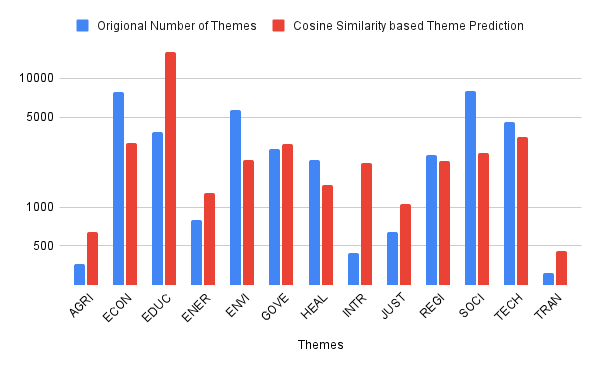

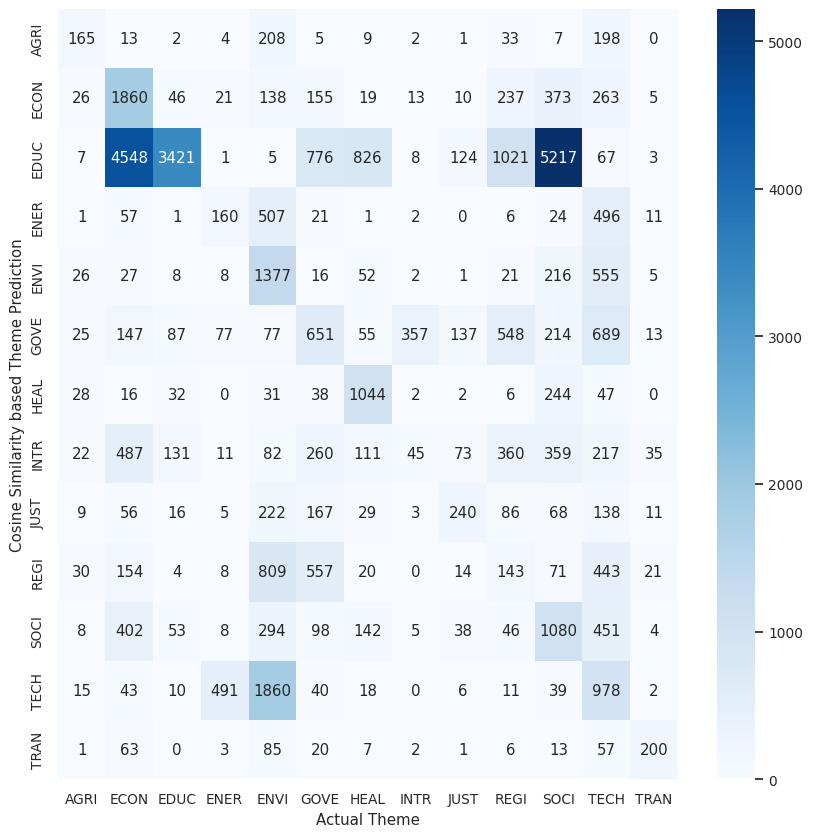

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

cm_data = confusion_matrix(data["Max_Cosine_Similarity"], data.theme)
df_cm = pd.DataFrame(cm_data, columns=np.unique(data.theme), index = np.unique(data.theme))
df_cm.index.name = 'Cosine Similarity based Theme Prediction'
df_cm.columns.name = 'Actual Theme'
plt.figure(figsize = (10,10))
sn.set(font_scale=0.9) #for label size
sn.heatmap(df_cm, fmt="d",cmap="Blues",annot=True) # font size
plt.savefig("Cosine_Similarity.png", dpi=600)

In [ ]:
#example
similarities = []
max_similarity_category = []
text = 'pakistan has some financial issues'
max_similarity_category = compute_cosine_similarity(text)

[[0.         0.         0.10696799 0.         0.         0.
  0.02148737 0.         0.         0.01455296 0.         0.
  0.         0.        ]]
economy


In [ ]:
max_similarity_category

'economy'

##### With Glove vector (embedding dimensions 300)

In [ ]:
prefLabelPlusDefinition=pd.read_csv("/content/drive/MyDrive/ODECO/Secondments/Research/PrefLabel_plus_definition.csv")
prefLabelPlusDefinition = prefLabelPlusDefinition.drop(2)

# reset the index of the DataFrame
prefLabelPlusDefinition = prefLabelPlusDefinition.reset_index(drop=True)
prefLabelPlusDefinition

,s,preflabel,definition,prefLabel_plus_definition
0,http://publications.europa.eu/resource/authori...,Economy and finance,This concept identifies datasets covering such...,Economy and finance This concept identifies da...
1,http://publications.europa.eu/resource/authori...,"Education, culture and sport",This concept identifies datasets covering such...,"Education, culture and sport This concept iden..."
2,http://publications.europa.eu/resource/authori...,Energy,This concept identifies datasets covering the ...,Energy This concept identifies datasets coveri...
3,http://publications.europa.eu/resource/authori...,Environment,This concept identifies datasets covering the ...,Environment This concept identifies datasets c...
4,http://publications.europa.eu/resource/authori...,Government and public sector,This concept identifies datasets covering such...,Government and public sector This concept iden...
5,http://publications.europa.eu/resource/authori...,Health,This concept identifies datasets covering the ...,Health This concept identifies datasets coveri...
6,http://publications.europa.eu/resource/authori...,"Justice, legal system and public safety",This concept identifies datasets covering such...,"Justice, legal system and public safety This c..."
7,http://publications.europa.eu/resource/authori...,Population and society,This concept identifies datasets covering such...,Population and society This concept identifies...
8,http://publications.europa.eu/resource/authori...,Science and technology,This concept identifies datasets covering such...,Science and technology This concept identifies...
9,http://publications.europa.eu/resource/authori...,Transport,This concept identifies datasets covering the ...,Transport This concept identifies datasets cov...


In [ ]:
prefLabelPlusDefinition['definitions_tokens'] = prefLabelPlusDefinition["prefLabel_plus_definition"].apply(preprocess)

In [ ]:
prefLabelPlusDefinition['definitions_tokens']

0     [economy, finance, concept, identifies, coveri...
1     [education, culture, sport, concept, identifie...
2     [energy, concept, identifies, covering, domain...
3     [environment, concept, identifies, covering, d...
4     [government, public, sector, concept, identifi...
5     [health, concept, identifies, covering, domain...
6     [justice, legal, system, public, safety, conce...
7     [population, society, concept, identifies, cov...
8     [science, technology, concept, identifies, cov...
9     [transport, concept, identifies, covering, dom...
10    [agriculture, fisheries, forestry, food, conce...
11    [international, issues, concept, identifies, c...
12    [regions, cities, concept, identifies, coverin...
Name: definitions_tokens, dtype: object

Loading the Glove vectors of 100d

In [ ]:
glove_embeddings = {}
with open('/content/glove.6B.100d.txt', encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        glove_embeddings[word] = vector

In [ ]:
# extract the instance embeddings
instance_embeddings = []
for instance in data['Translated']:
    embedding = np.zeros(100)
    for word in instance.split():
        if word in glove_embeddings:
            embedding += glove_embeddings[word]
    instance_embeddings.append(embedding)

In [ ]:
# extract the prefLabel+definition embeddings
prefLabel_definition_embeddings = []
for class_name in prefLabelPlusDefinition["prefLabel_plus_definition"]:
    embedding = np.zeros(100)
    for word in class_name.split():
        if word in glove_embeddings:
            embedding += glove_embeddings[word]
    prefLabel_definition_embeddings.append(embedding)

In [ ]:
# compute the cosine similarity between each instance and each class
similarities = cosine_similarity(instance_embeddings, class_embeddings)

In [ ]:
similarities[0]

array([0.97015983, 0.95879477, 0.94763919, 0.92952559, 0.95956421,
       0.92980907, 0.96407781, 0.96448626, 0.9550852 , 0.95823935,
       0.94433827, 0.95164379, 0.96166167])

In [ ]:
similarities[1]

array([0.94187988, 0.92594028, 0.94988767, 0.92078912, 0.91885605,
       0.91120625, 0.93576199, 0.92999578, 0.93923264, 0.93834974,
       0.92617813, 0.91795349, 0.92520069])

In [ ]:
similarities[2]

array([0.93058351, 0.91835558, 0.9072462 , 0.90155696, 0.92058084,
       0.89433387, 0.92827026, 0.91960124, 0.92295653, 0.90857628,
       0.90499366, 0.93599995, 0.92719068])

In [ ]:
similarities[4]

array([0.94113804, 0.94418645, 0.91436417, 0.90128483, 0.93068352,
       0.92417691, 0.95609515, 0.94775209, 0.92858066, 0.9321848 ,
       0.91815158, 0.93497148, 0.93034548])

In [ ]:
similarities[5]

array([0.87054869, 0.88080392, 0.82995364, 0.85602977, 0.8869101 ,
       0.87658078, 0.90345448, 0.87837426, 0.8897718 , 0.86714556,
       0.86663335, 0.8657307 , 0.87256055])

Total number of similarites are 520,000 and if we put threshold of 0.70 just 62000 values will be exculded, it means that every dataset will belong to every category thats why we proceeded with the max cosine simialrity

In [ ]:
len(similarities[similarities < 0.70 ]) 

3825

In [ ]:
category_labels = ['Economy', 'Education', 'Energy','Environment','Government','Health', 'Justice', 'Society', 'Technology', 
                   'Transport', 'Agriculture', 'International', 'Regions'] #['Agriculture', 'Economy', 'Education', 'Energy','Environment', 'Government', 'Health', 'International', 'Justice','Regions', 'Society', 'Technology', 'Transport']

In [ ]:
data

,theme,Translated
0,SOCI,Population in group establishments by Province...
1,TECH,Small punch tensile/fracture test data for P91...
2,GOVE,Flash Eurobarometer 217: Intercultural dialogu...
3,ECON,Non -formal education activities carried out f...
4,SOCI,Criminal offences charged against the person c...
...,...,...
40117,ECON,University graduates as they have rejected som...
40118,GOVE,Special Eurobarometer 436: Attitudes of Europe...
40119,ENVI,CORINE Land Cover changes Iceland 2018 (CHA) I...
40120,ECON,Company control (public or private). EAES: Q (...


In [ ]:
category_labels[np.argmax(similarities[0])]

'Society'

In [ ]:
data.theme.value_counts()

Society          7925
Economy          7873
Environment      5695
Technology       4599
Education        3811
Government       2804
Regions          2524
Health           2333
Energy            797
Justice           647
International     441
Agriculture       363
Transport         310
Name: theme, dtype: int64

In [ ]:
category_labels

['Economy',
 'Education',
 'Energy',
 'Environment',
 'Government',
 'Health',
 'Justice',
 'Society',
 'Technology',
 'Transport',
 'Agriculture',
 'International',
 'Regions']

In [ ]:
#find the index of highest value in each similarty 
max_indices = np.argmax(similarities, axis=1)

# fetch corresponding value from other list based on max index
max_category = [category_labels[i] for i in max_indices]

In [ ]:
predict_Glove_100_COSINE=pd.DataFrame({'Predict_Glove_100_Cosine_Similarity':max_category})

In [ ]:
predict_Glove_100_COSINE.Predict_Glove_100_Cosine_Similarity.value_counts()

Economy          12419
Justice           9163
Transport         3474
Society           3325
Technology        2835
Education         2371
Regions           2258
Energy            1506
Government         824
Agriculture        700
International      697
Environment        368
Health             182
Name: Predict_Glove_100_Cosine_Similarity, dtype: int64

In [ ]:
result = pd.concat([data, predict_Glove_100_COSINE], axis=1)

In [ ]:
result

,theme,Translated,Predict_Glove_100_Cosine_Similarity
0,Society,Population in group establishments by Province...,Economy
1,Technology,Small punch tensile/fracture test data for P91...,Energy
2,Government,Flash Eurobarometer 217: Intercultural dialogu...,International
3,Economy,Non -formal education activities carried out f...,Justice
4,Society,Criminal offences charged against the person c...,Justice
...,...,...,...
40117,Economy,University graduates as they have rejected som...,Justice
40118,Government,Special Eurobarometer 436: Attitudes of Europe...,Economy
40119,Environment,CORINE Land Cover changes Iceland 2018 (CHA) I...,Justice
40120,Economy,Company control (public or private). EAES: Q (...,Society


In [ ]:
#['Agriculture', 'Economy', 'Education', 'Energy','Environment', 'Government', 'Health', 'International', 'Justice','Regions', 'Society', 'Technology', 'Transport']
result['theme'] = data['theme'].replace({'SOCI':  'Society', 'ECON':'Economy', 'ENVI':'Environment', 'TECH':'Technology', 'EDUC':'Education',
                                           'GOVE':'Government', 'REGI':'Regions', 'HEAL':'Health', 'ENER': 'Energy', 'JUST':'Justice',
                                           'INTR':'International', 'AGRI':'Agriculture', 'TRAN':'Transport'})

In [ ]:
len(data['theme'].value_counts())

13

In [ ]:
len(result.theme.value_counts())

13

In [ ]:
import pandas as pd
  
# initialize data of lists.
DF_data = {'Origional Theme': data.theme.value_counts(),
        'Cosine Similarity of Glove ': result.Predict_Glove_100_Cosine_Similarity.value_counts()}
  
# Create DataFrame
df = pd.DataFrame(DF_data)
  
# Print the output.
df

,Origional Theme,Cosine Similarity of Glove
Agriculture,363,700
Economy,7873,12419
Education,3811,2371
Energy,797,1506
Environment,5695,368
Government,2804,824
Health,2333,182
International,441,697
Justice,647,9163
Regions,2524,2258


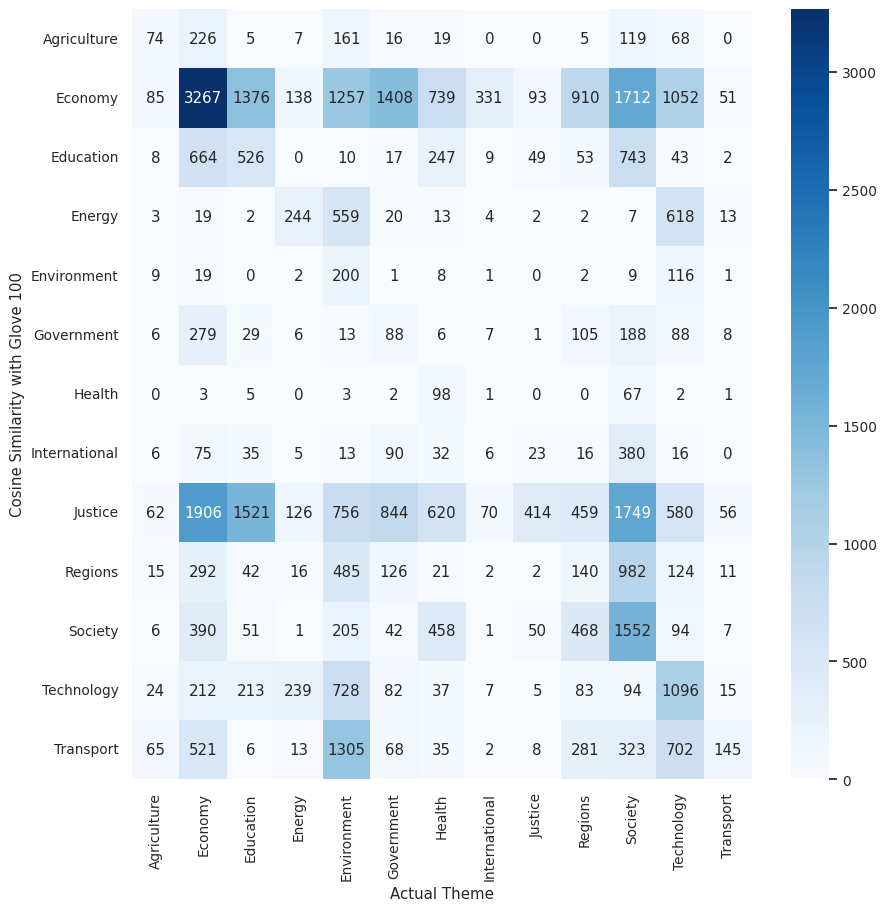

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

cm_data = confusion_matrix(result["Predict_Glove_100_Cosine_Similarity"], data.theme)
df_cm = pd.DataFrame(cm_data, columns=np.unique(data.theme), index = np.unique(data.theme))
df_cm.index.name = 'Cosine Similarity with Glove 100'
df_cm.columns.name = 'Actual Theme'
plt.figure(figsize = (10,10))
sn.set(font_scale=0.9) #for label size
sn.heatmap(df_cm, fmt="d",cmap="Blues",annot=True) # font size
plt.savefig("Cosine_Similarity_glove_100.png", dpi=600, bbox_inches='tight')

In [ ]:
# calculate accuracy from the confusion matrix
accuracy = np.trace(cm_data) / float(np.sum(cm_data))

print("Accuracy:", accuracy)

Accuracy: 0.1956532575644285


Cosine similarity with Glove 200D

In [ ]:
glove_embeddings = {}
with open('/content/drive/MyDrive/ODECO/Secondments/Research/glove/glove.6B.200d.txt', encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        glove_embeddings[word] = vector

In [ ]:
# extract the instance embeddings
instance_embeddings = []
for instance in data['Translated']:
    embedding = np.zeros(200)
    for word in instance.split():
        if word in glove_embeddings:
            embedding += glove_embeddings[word]
    instance_embeddings.append(embedding)

In [ ]:
# extract the prefLabel+definition embeddings
prefLabel_definition_embeddings = []
for class_name in prefLabelPlusDefinition["prefLabel_plus_definition"]:
    embedding = np.zeros(200)
    for word in class_name.split():
        if word in glove_embeddings:
            embedding += glove_embeddings[word]
    prefLabel_definition_embeddings.append(embedding)

In [ ]:
# compute the cosine similarity between each instance and each class
similarities = cosine_similarity(instance_embeddings, prefLabel_definition_embeddings)

In [ ]:
similarities[0]

array([0.95409341, 0.94266464, 0.92408533, 0.90307997, 0.94078295,
       0.89630308, 0.94742327, 0.9477902 , 0.9344494 , 0.93915634,
       0.92481067, 0.92621675, 0.93764822])

In [ ]:
similarities[1]

array([0.92141432, 0.89685315, 0.92718418, 0.88730622, 0.89324488,
       0.875207  , 0.91221101, 0.90663772, 0.91431543, 0.91405625,
       0.90087196, 0.88407106, 0.89686431])

In [ ]:
similarities[2]

array([0.89942686, 0.88845447, 0.87366343, 0.87480849, 0.88447401,
       0.84724578, 0.8968521 , 0.88445581, 0.89138581, 0.87786806,
       0.87982166, 0.906684  , 0.89567625])

In [ ]:
similarities[4]

array([0.92080331, 0.92738597, 0.88949544, 0.87490096, 0.90516902,
       0.89175991, 0.93936325, 0.92776101, 0.90629005, 0.90980549,
       0.89777189, 0.90760903, 0.90539634])

In [ ]:
similarities[5]

array([0.83046951, 0.83818116, 0.78263192, 0.80095392, 0.84538909,
       0.82243624, 0.86391364, 0.83368461, 0.84668143, 0.82235575,
       0.8189016 , 0.82197114, 0.81175357])

Total number of similarites are 520,000 and if we put threshold of 0.70 just 7016 values will be exculded, it means that every dataset will belong to every category thats why we proceeded with the max cosine simialrity

In [ ]:
len(similarities[similarities < 0.70 ]) 

7016

In [ ]:
category_labels = ['Economy', 'Education', 'Energy','Environment','Government','Health', 'Justice', 'Society', 'Technology', 
                   'Transport', 'Agriculture', 'International', 'Regions'] #['Agriculture', 'Economy', 'Education', 'Energy','Environment', 'Government', 'Health', 'International', 'Justice','Regions', 'Society', 'Technology', 'Transport']

In [ ]:
data

,theme,Translated
0,Society,Population in group establishments by Province...
1,Technology,Small punch tensile/fracture test data for P91...
2,Government,Flash Eurobarometer 217: Intercultural dialogu...
3,Economy,Non -formal education activities carried out f...
4,Society,Criminal offences charged against the person c...
...,...,...
40117,Economy,University graduates as they have rejected som...
40118,Government,Special Eurobarometer 436: Attitudes of Europe...
40119,Environment,CORINE Land Cover changes Iceland 2018 (CHA) I...
40120,Economy,Company control (public or private). EAES: Q (...


In [ ]:
category_labels[np.argmax(similarities[0])]

'Economy'

In [ ]:
data.theme.value_counts()

Society          7925
Economy          7873
Environment      5695
Technology       4599
Education        3811
Government       2804
Regions          2524
Health           2333
Energy            797
Justice           647
International     441
Agriculture       363
Transport         310
Name: theme, dtype: int64

In [ ]:
category_labels

['Economy',
 'Education',
 'Energy',
 'Environment',
 'Government',
 'Health',
 'Justice',
 'Society',
 'Technology',
 'Transport',
 'Agriculture',
 'International',
 'Regions']

In [ ]:
#find the index of highest value in each similarty 
max_indices = np.argmax(similarities, axis=1)

# fetch corresponding value from other list based on max index
max_category = [category_labels[i] for i in max_indices]

In [ ]:
Predict_Glove_200_Cosine_Similarity=pd.DataFrame({'Predict_Glove_200_Cosine_Similarity':max_category})

In [ ]:
Predict_Glove_200_Cosine_Similarity.Predict_Glove_200_Cosine_Similarity.value_counts()

Economy          14059
Justice           8823
Transport         2983
Education         2839
Technology        2491
Society           2463
Regions           2412
Energy            1448
Agriculture       1101
Government         598
International      432
Environment        323
Health             150
Name: Predict_Glove_200_Cosine_Similarity, dtype: int64

In [ ]:
result = pd.concat([data, Predict_Glove_200_Cosine_Similarity], axis=1)

In [ ]:
result

,theme,Translated,Predict_Glove_200_Cosine_Similarity
0,Society,Population in group establishments by Province...,Economy
1,Technology,Small punch tensile/fracture test data for P91...,Energy
2,Government,Flash Eurobarometer 217: Intercultural dialogu...,International
3,Economy,Non -formal education activities carried out f...,Justice
4,Society,Criminal offences charged against the person c...,Justice
...,...,...,...
40117,Economy,University graduates as they have rejected som...,Justice
40118,Government,Special Eurobarometer 436: Attitudes of Europe...,Economy
40119,Environment,CORINE Land Cover changes Iceland 2018 (CHA) I...,Justice
40120,Economy,Company control (public or private). EAES: Q (...,Society


In [ ]:
#['Agriculture', 'Economy', 'Education', 'Energy','Environment', 'Government', 'Health', 'International', 'Justice','Regions', 'Society', 'Technology', 'Transport']
result['theme'] = data['theme'].replace({'SOCI':  'Society', 'ECON':'Economy', 'ENVI':'Environment', 'TECH':'Technology', 'EDUC':'Education',
                                           'GOVE':'Government', 'REGI':'Regions', 'HEAL':'Health', 'ENER': 'Energy', 'JUST':'Justice',
                                           'INTR':'International', 'AGRI':'Agriculture', 'TRAN':'Transport'})

In [ ]:
len(data['theme'].value_counts())

13

In [ ]:
len(result.theme.value_counts())

13

In [ ]:
import pandas as pd
  
# initialize data of lists.
DF_data = {'Origional Theme': data.theme.value_counts(),
        'Cosine Similarity of Glove 200': result.Predict_Glove_200_Cosine_Similarity.value_counts()}
  
# Create DataFrame
df = pd.DataFrame(DF_data)
  
# Print the output.
df

,Origional Theme,Cosine Similarity of Glove 200
Agriculture,363,1101
Economy,7873,14059
Education,3811,2839
Energy,797,1448
Environment,5695,323
Government,2804,598
Health,2333,150
International,441,432
Justice,647,8823
Regions,2524,2412


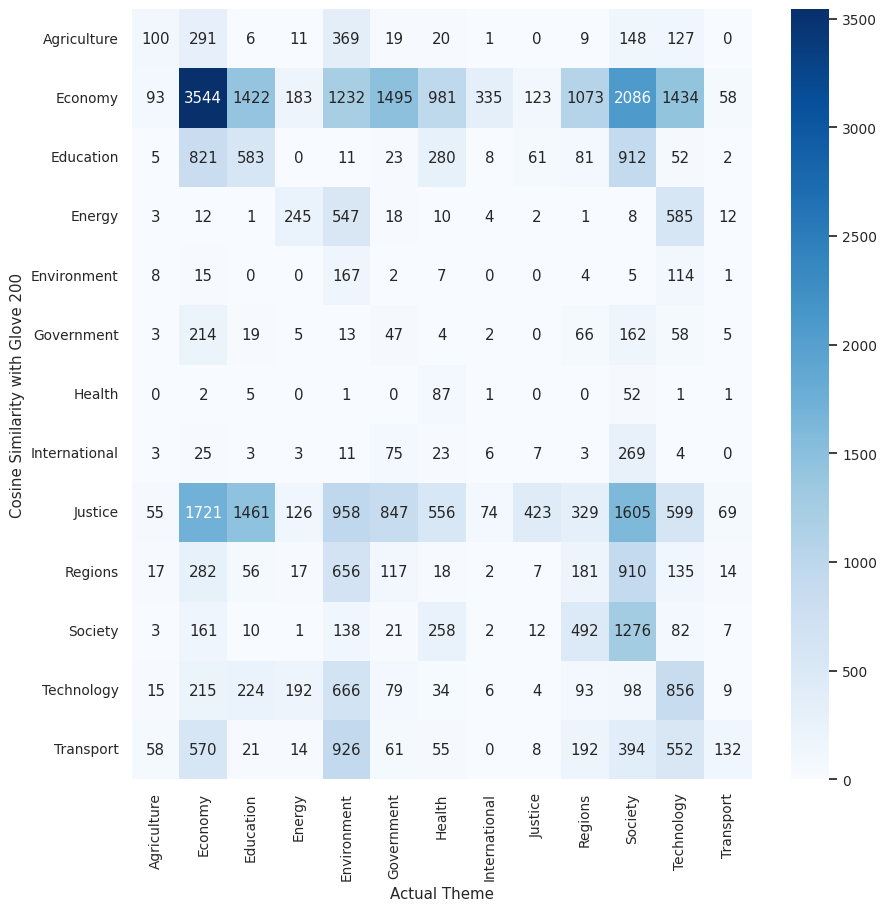

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

cm_data = confusion_matrix(result["Predict_Glove_200_Cosine_Similarity"], data.theme)
df_cm = pd.DataFrame(cm_data, columns=np.unique(data.theme), index = np.unique(data.theme))
df_cm.index.name = 'Cosine Similarity with Glove 200'
df_cm.columns.name = 'Actual Theme'
plt.figure(figsize = (10,10))
sn.set(font_scale=0.9) #for label size
sn.heatmap(df_cm, fmt="d",cmap="Blues",annot=True) # font size
plt.savefig("Cosine_Similarity_glove_200.png", dpi=600, bbox_inches='tight')

In [ ]:
# calculate accuracy from the confusion matrix
accuracy = np.trace(cm_data) / float(np.sum(cm_data))

print("Accuracy:", accuracy)

Accuracy: 0.19059368924779424


##### Cosine similarity with BERT

In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 45.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 64.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 22.4 MB/s eta 0:00:00


In [ ]:
from transformers import *
from transformers import AutoTokenizer, AutoModel
import torch
from sklearn.metrics.pairwise import cosine_similarity

/usr/local/lib/python3.10/dist-packages/transformers/generation_utils.py:24: FutureWarning: Importing `GenerationMixin` from `src/transformers/generation_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import GenerationMixin` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation_tf_utils.py:24: FutureWarning: Importing `TFGenerationMixin` from `src/transformers/generation_tf_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import TFGenerationMixin` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation_flax_utils.py:24: FutureWarning: Importing `FlaxGenerationMixin` from `src/transformers/generation_flax_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import FlaxGenerationMixin` instead.
  warnings.warn(


In [ ]:
# Load a pre-trained BERT model and tokenizer
# model_name = 'bert-base-uncased'
# tokenizer = AutoTokenizer.from_pretrained(model_name)
# model = AutoModel.from_pretrained(model_name)

In [ ]:
prefLabelPlusDefinition=pd.read_csv("/content/drive/MyDrive/ODECO/Secondments/Research/PrefLabel_plus_definition.csv")

In [ ]:
prefLabelPlusDefinition = prefLabelPlusDefinition.drop(2)

# reset the index of the DataFrame
prefLabelPlusDefinition = prefLabelPlusDefinition.reset_index(drop=True)

In [ ]:
prefLabelPlusDefinition

,s,preflabel,definition,prefLabel_plus_definition
0,http://publications.europa.eu/resource/authori...,Economy and finance,This concept identifies datasets covering such...,Economy and finance This concept identifies da...
1,http://publications.europa.eu/resource/authori...,"Education, culture and sport",This concept identifies datasets covering such...,"Education, culture and sport This concept iden..."
2,http://publications.europa.eu/resource/authori...,Energy,This concept identifies datasets covering the ...,Energy This concept identifies datasets coveri...
3,http://publications.europa.eu/resource/authori...,Environment,This concept identifies datasets covering the ...,Environment This concept identifies datasets c...
4,http://publications.europa.eu/resource/authori...,Government and public sector,This concept identifies datasets covering such...,Government and public sector This concept iden...
5,http://publications.europa.eu/resource/authori...,Health,This concept identifies datasets covering the ...,Health This concept identifies datasets coveri...
6,http://publications.europa.eu/resource/authori...,"Justice, legal system and public safety",This concept identifies datasets covering such...,"Justice, legal system and public safety This c..."
7,http://publications.europa.eu/resource/authori...,Population and society,This concept identifies datasets covering such...,Population and society This concept identifies...
8,http://publications.europa.eu/resource/authori...,Science and technology,This concept identifies datasets covering such...,Science and technology This concept identifies...
9,http://publications.europa.eu/resource/authori...,Transport,This concept identifies datasets covering the ...,Transport This concept identifies datasets cov...


Cosine similarity with origional data

In [ ]:
categories_definitions = []
category_labels = []
categories_definitions=prefLabelPlusDefinition['prefLabel_plus_definition'].tolist()
category_labels=prefLabelPlusDefinition['preflabel'].tolist()

In [ ]:
len(categories_definitions), len(category_labels)

(13, 13)

In [ ]:
from transformers import BertTokenizer, BertModel
import torch

tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased') # actual words representation are kept in cased model but in uncased everything is lower
model = BertModel.from_pretrained('bert-base-multilingual-cased')

loading file vocab.txt from cache at /root/.cache/huggingface/hub/models--bert-base-multilingual-cased/snapshots/fdfce55e83dbed325647a63e7e1f5de19f0382ba/vocab.txt
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at None
loading file tokenizer_config.json from cache at /root/.cache/huggingface/hub/models--bert-base-multilingual-cased/snapshots/fdfce55e83dbed325647a63e7e1f5de19f0382ba/tokenizer_config.json


loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--bert-base-multilingual-cased/snapshots/fdfce55e83dbed325647a63e7e1f5de19f0382ba/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-multilingual-cased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "directionality": "bidi",
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_attention_heads": 12,
  "pooler_num_fc_layers": 3,
  "pooler_size_per_head": 128,
  "pooler_type": "first_token_transform",
  "position_embedding_type": "absolute",
  "transformers_version": "4.28.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size":

loading weights file pytorch_model.bin from cache at /root/.cache/huggingface/hub/models--bert-base-multilingual-cased/snapshots/fdfce55e83dbed325647a63e7e1f5de19f0382ba/pytorch_model.bin
Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model f

dummy example 1

In [ ]:
# Encode two pieces of text into dense vectors using BERT
text1 = "The cat sat on the mat."
text2 = "The dog played in the yard."
encoded_text1 = tokenizer(text1, return_tensors='pt')
encoded_text2 = tokenizer(text2, return_tensors='pt')
with torch.no_grad():
    model_output1 = model(**encoded_text1)
    model_output2 = model(**encoded_text2)
    embeddings1 = model_output1.last_hidden_state.mean(dim=1).squeeze()
    embeddings2 = model_output2.last_hidden_state.mean(dim=1).squeeze()

# Compute the cosine similarity between the two vectors
similarity = cosine_similarity(embeddings1.unsqueeze(0), embeddings2.unsqueeze(0))
print(similarity)

[[0.6904719]]


In [ ]:
encoded_text1

{'input_ids': tensor([[  101,  1996,  4937,  2938,  2006,  1996, 13523,  1012,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1]])}

dummy example 2

In [ ]:
# Encode two pieces of text into dense vectors using BERT
text1 = "solution"
text2 = "boil the solution with salt."
encoded_text1 = tokenizer(text1, return_tensors='pt')
encoded_text2 = tokenizer(text2, return_tensors='pt')
with torch.no_grad():
    model_output1 = model(**encoded_text1)
    model_output2 = model(**encoded_text2)
    embeddings1 = model_output1.last_hidden_state.mean(dim=1).squeeze()
    # print(len(embeddings1))
    embeddings2 = model_output2.last_hidden_state.mean(dim=1).squeeze()

# Compute the cosine similarity between the two vectors
similarity = cosine_similarity(embeddings1.unsqueeze(0), embeddings2.unsqueeze(0))
print(similarity)

[[0.48030204]]


Dummy example 3

In [ ]:
# Encode two pieces of text into dense vectors using BERT
text1 = '''accidental release of organisms agricultural biotechnology agricultural building agricultural disaster agricultural economics agricultural effluent agricultural engineering agricultural equipment agricultural exploitation agricultural holding agricultural hydraulics agricultural land agricultural landscape agricultural legislation agricultural machinery agricultural management agricultural method agricultural pest agricultural planning agricultural policy
agricultural pollution agricultural product agricultural production agricultural real. estate agricultural storage agricultural structure agricultural undervaluation agricultural waste agriculture agriculture and cattle industry agriculture framework plan agri-foodstuff agritourism agrochemical agroforestry agroindustry agrometeorology agronomic fertiliser additive agronomic value agronomy
agrosystem algae-based biofuel production ammonia animal damage animal dung as fuel animal excrement animal foodstuff animal for slaughter animal housing animal husbandry animal manure animal product animal production animal shelter animal waste apiculture arable farming arboriculture beneficial organism biofuel
biofuel production biogas biological pest control. biomass energy bulb cultivation cash crop chemical fertiliser chemical pest control chlorosis common agricultural policy compost compostable waste composting composting by producer contour farming controlled burning cotton cropland management crop production crop protection
crop rotation crop treatment crop waste cultivated plant uncontrolled dump underground disposal underground quarry underground storage utilisation of pesticides volcanic area. volcanic eruption waste dump waste dumping waste storage water body water bottom water infiltration into the ground waterlogged land water seepage water table working the soil.'''
text2 = "Economy and finance This concept identifies datasets covering such domains as economy or finance. Economy is the area of the production, distribution and trade, as well as consumption of goods and services by different agents. In its broadest sense, the economy is defined as a social domain that emphasize the practices, discourses and material expressions associated with the production, use, and management of resources. Finance is the study of money and how it is used. Specifically, it deals with the questions of how an individual, company or government acquires the money needed and how they then spend or invest that money. Dataset examples: Tenders Electronic Daily (TED) - public procurement notices from the EU and beyond; General government deficit (-) and surplus (+) - quarterly data."
encoded_text1 = tokenizer(text1, return_tensors='pt')
encoded_text2 = tokenizer(text2, return_tensors='pt')
with torch.no_grad():
    model_output1 = model(**encoded_text1)
    model_output2 = model(**encoded_text2)
    embeddings1 = model_output1.last_hidden_state.mean(dim=1).squeeze()
    embeddings2 = model_output2.last_hidden_state.mean(dim=1).squeeze()

# Compute the cosine similarity between the two vectors
similarity = cosine_similarity(embeddings1.unsqueeze(0), embeddings2.unsqueeze(0))
print(similarity)

[[0.61506975]]


In [ ]:
def get_bert_embedding(text):
    print(text)
    encoded_text = tokenizer(text, padding=True, truncation=True, return_tensors='pt')
    with torch.no_grad():
        model_output = model(**encoded_text)
    embeddings = model_output.last_hidden_state[:, 0, :].squeeze().numpy()  ##Getting weights from the last layer of the BERT
    return embeddings

In [ ]:
definition_embeddings = []
for definition in categories_definitions:
    print("PrefLabel+Definition    :", definition)
    embedding = get_bert_embedding(definition)
    definition_embeddings.append(embedding)

PrefLabel+Definition    : Economy and finance This concept identifies datasets covering such domains as economy or finance. Economy is the area of the production, distribution and trade, as well as consumption of goods and services by different agents. In its broadest sense, the economy is defined as a social domain that emphasize the practices, discourses and material expressions associated with the production, use, and management of resources. Finance is the study of money and how it is used. Specifically, it deals with the questions of how an individual, company or government acquires the money needed and how they then spend or invest that money. Dataset examples: Tenders Electronic Daily (TED) - public procurement notices from the EU and beyond; General government deficit (-) and surplus (+) - quarterly data.
PrefLabel+Definition    : Education, culture and sport This concept identifies datasets covering such domains as education, culture or sport. Education is the process of facil

In [ ]:
definition_embeddings[0]

array([-1.46751806e-01, -2.81549037e-01,  1.48015186e-01, -4.52749208e-02,
       -2.95989722e-01, -7.84824193e-02,  7.76481852e-02, -4.49190773e-02,
        2.72327047e-02, -2.52049059e-01, -1.79072320e-01, -2.70985216e-01,
        5.89967556e-02, -2.76245177e-01, -6.94206834e-01, -1.61997378e-01,
       -4.54179883e-01, -9.08297114e-03, -1.16535900e-02,  2.90901601e-01,
        2.04834267e-01,  1.60921946e-01, -6.79621920e-02,  2.86643744e-01,
       -2.23324805e-01, -5.36682069e-01,  2.02594906e-01, -3.94016504e-01,
        4.00475293e-01,  2.02102333e-01,  3.55339088e-02, -2.10929647e-01,
        2.08002552e-01, -3.99874210e-01, -6.86558560e-02,  3.08951288e-01,
       -7.88386106e-01, -1.88854039e-01,  7.04620406e-02,  6.19508326e-02,
        2.54901826e-01, -9.79615450e-02,  4.03602749e-01, -1.08169429e-02,
       -1.62161052e-01,  1.00976729e+00, -8.54084417e-02, -3.49742740e-01,
        6.27607167e-01,  3.16400319e-01,  1.00410976e-01, -2.65745848e-01,
        3.63878638e-01, -

We already had generated the word embeddings of the whole dataset and stored in the pickle file. The word embeddings were too much memory costly. But if you already have the embeddings calculated we dont need to run the get_bert_embedding() function.

In [ ]:
#the whole dataset embeddings (translated)
dataset = data["Translated"].tolist()

In [ ]:
dataset[0:5]

['Population in group establishments by Province and size of the municipality (API identifier: /t20/e244/colectivos/p04/l0/04006.px) size of the municipality, Structure and situation of the population, Statistics, Provinces, Population and Housing Censuses, National total, More than 500000, Less than 2000, From 5001 to 10000, From 50001 to 100000, From 2001 to 5000, From 20001 to 50000, From 10001 to 20000, From 100001 to 500000, Demography and population, Construction and housing Table of INEBase\nPopulation in group establishments by Province and size of the municipality. Provinces. Population and Housing Censuses',
 'Small punch tensile/fracture test data for P91 material at 300 °C and a displacement rate of .005 mm/s (repeat test) Elevated temperature material properties Open access small punch data created by the European Commission JRC. The data is on P91 (Gr. 91) ferritic/martensitic steel for assessing the procedures to estimate the uniaxial tensile strength and yield stress fr

In [ ]:
#test case for the five datasets
instance_embeddings = []
counter = 0
for instance in dataset[0:5]:
    counter =  counter + 1
    print("dataset instances :::: ", instance , '\t\n')
    embedding = get_bert_embedding(instance)
    if (counter % 100 == 0): #just to check that is data is feeded correctly
      print("Dataset at the instance  {i} : ", instance)
    instance_embeddings.append(embedding)

dataset instances ::::  Population in group establishments by Province and size of the municipality (API identifier: /t20/e244/colectivos/p04/l0/04006.px) size of the municipality, Structure and situation of the population, Statistics, Provinces, Population and Housing Censuses, National total, More than 500000, Less than 2000, From 5001 to 10000, From 50001 to 100000, From 2001 to 5000, From 20001 to 50000, From 10001 to 20000, From 100001 to 500000, Demography and population, Construction and housing Table of INEBase
Population in group establishments by Province and size of the municipality. Provinces. Population and Housing Censuses 	

dataset instances ::::  Small punch tensile/fracture test data for P91 material at 300 °C and a displacement rate of .005 mm/s (repeat test) Elevated temperature material properties Open access small punch data created by the European Commission JRC. The data is on P91 (Gr. 91) ferritic/martensitic steel for assessing the procedures to estimate the u

In [ ]:
instance_embeddings_0_13000 = []
counter = 0
for instance in dataset[0:13000]:   #0-13000, 13001:26000, 26001-40121  missing indecies(13000,26000)
    counter =  counter + 1
    embedding = get_bert_embedding(instance)
    if counter % 100 == 0:                    #just to check that is data is feeded correctly
      print("dataset instances :::: {}  ".format(counter, instance))
    instance_embeddings_0_13000.append(embedding)

dataset instances :::: 100  
dataset instances :::: 200  
dataset instances :::: 300  
dataset instances :::: 400  
dataset instances :::: 500  
dataset instances :::: 600  
dataset instances :::: 700  
dataset instances :::: 800  
dataset instances :::: 900  
dataset instances :::: 1000  
dataset instances :::: 1100  
dataset instances :::: 1200  
dataset instances :::: 1300  
dataset instances :::: 1400  
dataset instances :::: 1500  
dataset instances :::: 1600  
dataset instances :::: 1700  
dataset instances :::: 1800  
dataset instances :::: 1900  
dataset instances :::: 2000  
dataset instances :::: 2100  
dataset instances :::: 2200  
dataset instances :::: 2300  
dataset instances :::: 2400  
dataset instances :::: 2500  
dataset instances :::: 2600  
dataset instances :::: 2700  
dataset instances :::: 2800  
dataset instances :::: 2900  
dataset instances :::: 3000  
dataset instances :::: 3100  
dataset instances :::: 3200  
dataset instances :::: 3300  
dataset instances :

In [ ]:
dataset[13000]

'Demographic phenomena, by type of demographic phenomenon. MNPD MNPM MNPN (API identifier: 6566) Vital Statistics: Marriages, Vital Statistics: Deaths Statistics, Vital Statistics: Births, Statistics, Natural growth, Marriage, Late foetal deaths, Health, Demography and population, Demographic Concepts, Deaths of children under one year of age, Death, Births marriages and deaths Table of INEBase\nDemographic phenomena, by type of demographic phenomenon. Annual. National. Vital Statistics: Deaths Statistics. Vital Statistics: Marriages . Vital Statistics: Births'

##### Loads the embeddings of the dataset from the drive

In [ ]:
import pickle

# Open the pickle file in read binary mode
with open('/content/drive/MyDrive/ODECO/Secondments/Research/instance_embeddings_0_13000.pickle', 'rb') as f:
    # Load the data from the pickle file
     instance_embeddings_0_13000 = pickle.load(f)

In [ ]:
import pickle

# Open the pickle file in read binary mode
with open('/content/drive/MyDrive/ODECO/Secondments/Research/instance_embeddings13000to26001.pickle', 'rb') as f:
    # Load the data from the pickle file
     instance_embeddings13000to26001 = pickle.load(f)

In [ ]:
import pickle

# Open the pickle file in read binary mode
with open('/content/drive/MyDrive/ODECO/Secondments/Research/instance_embeddings26001to40121.pickle', 'rb') as f:
    # Load the data from the pickle file
     instance_embeddings26001to40121 = pickle.load(f)

In [ ]:
print(len(instance_embeddings_0_13000) + len(instance_embeddings13000to26001) + len(instance_embeddings26001to40121)), len(instance_embeddings_0_13000) ,  len(instance_embeddings13000to26001) ,len(instance_embeddings26001to40121) 

(13000, 13001, 14120)

In [ ]:
# Merging these embeddings vectors to 1 embedding vectors
all_merged_instance_embeddings = []

all_merged_instance_embeddings.extend(instance_embeddings_0_13000)
all_merged_instance_embeddings.extend(instance_embeddings13000to26001)
all_merged_instance_embeddings.extend(instance_embeddings26001to40121)

In [ ]:
print(len(all_merged_instance_embeddings))  # Output: all instances merged to one list

40121


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

similarities = cosine_similarity(all_merged_instance_embeddings, definition_embeddings)

In [ ]:
similarities[0]

array([0.73502564, 0.7714665 , 0.78944635, 0.7223662 , 0.813363  ,
       0.8204071 , 0.7300956 , 0.7076009 , 0.7034378 , 0.73874223,
       0.7250388 , 0.784492  , 0.77109206], dtype=float32)

In [ ]:
similarities[1]

array([0.8095244 , 0.8250643 , 0.8569708 , 0.78158915, 0.7990973 ,
       0.85769725, 0.7855959 , 0.73352563, 0.76371104, 0.7951904 ,
       0.7842699 , 0.8502482 , 0.7559612 ], dtype=float32)

In [ ]:
similarities[2]

array([0.81725395, 0.83199096, 0.84636575, 0.78830135, 0.8094499 ,
       0.86637074, 0.78894585, 0.7320609 , 0.79731494, 0.7846989 ,
       0.7737189 , 0.864938  , 0.7682641 ], dtype=float32)

In [ ]:
similarities[4]

array([0.727333  , 0.77990794, 0.7618746 , 0.7219411 , 0.7958035 ,
       0.80771655, 0.76070285, 0.7026784 , 0.697138  , 0.73835295,
       0.7404317 , 0.7931374 , 0.7450616 ], dtype=float32)

In [ ]:
similarities[5]

array([0.7355644 , 0.7946787 , 0.7927787 , 0.72072005, 0.74858975,
       0.81068844, 0.7530726 , 0.66001105, 0.68419224, 0.7150475 ,
       0.7046685 , 0.7851851 , 0.6950613 ], dtype=float32)

Total number of similarites are 520,000 and if we put threshold of 0.70 just 62000 values will be exculded, it means that every dataset will belong to every category thats why we proceeded with the max cosine simialrity

In [ ]:
len(similarities[similarities < 0.70 ]) 

63243

In [ ]:
category_labels = ['Economy', 'Education', 'Energy','Environment','Government','Health', 'Justice', 'Population', 'Technology', 
                   'Transport', 'Agriculture', 'International', 'Regions'] #['Agriculture', 'Economy', 'Education', 'Energy','Environment', 'Government', 'Health', 'International', 'Justice','Regions', 'Society', 'Technology', 'Transport']

In [ ]:
data

,theme,Translated
0,SOCI,Population in group establishments by Province...
1,TECH,Small punch tensile/fracture test data for P91...
2,GOVE,Flash Eurobarometer 217: Intercultural dialogu...
3,ECON,Non -formal education activities carried out f...
4,SOCI,Criminal offences charged against the person c...
...,...,...
40116,TECH,"Electricity grid mix; AC; consumption mix, at ..."
40117,ECON,University graduates as they have rejected som...
40118,GOVE,Special Eurobarometer 436: Attitudes of Europe...
40119,ENVI,CORINE Land Cover changes Iceland 2018 (CHA) I...


In [ ]:
category_labels[np.argmax(similarities[0])]

'Health'

In [ ]:
category_labels

['Economy',
 'Education',
 'Energy',
 'Environment',
 'Government',
 'Health',
 'Justice',
 'Population',
 'Technology',
 'Transport',
 'Agriculture',
 'International',
 'Regions']

In [ ]:
#to make the dataset and predictions equal delete last row because we could not calculate embeddings until last row of the dataset. 
data.drop(index=40121, inplace=True)

In [ ]:
#find the index of highest value in each similarty 
max_indices = np.argmax(similarities, axis=1)

# fetch corresponding value from other list based on max index
max_category = [category_labels[i] for i in max_indices]

In [ ]:
predict_BERT_COSINE=pd.DataFrame({'Predict_BERT_Cosine_Similarity':max_category})
# data['Predict_BERT_Cosine_Similarity']

In [ ]:
predict_BERT_COSINE.Predict_BERT_Cosine_Similarity.value_counts()

Health           27891
Education         6035
International     2439
Energy            2050
Government         746
Justice            364
Agriculture        245
Technology         185
Economy             72
Regions             52
Transport           26
Environment         16
Name: Predict_BERT_Cosine_Similarity, dtype: int64

In [ ]:
result = pd.concat([data, predict_BERT_COSINE], axis=1)

In [ ]:
result

,theme,Translated,Predict_BERT_Cosine_Similarity
0,SOCI,Population in group establishments by Province...,Health
1,TECH,Small punch tensile/fracture test data for P91...,Health
2,GOVE,Flash Eurobarometer 217: Intercultural dialogu...,Health
3,ECON,Non -formal education activities carried out f...,Health
4,SOCI,Criminal offences charged against the person c...,Health
...,...,...,...
40116,TECH,"Electricity grid mix; AC; consumption mix, at ...",Health
40117,ECON,University graduates as they have rejected som...,Health
40118,GOVE,Special Eurobarometer 436: Attitudes of Europe...,Health
40119,ENVI,CORINE Land Cover changes Iceland 2018 (CHA) I...,Health


In [ ]:
#['Agriculture', 'Economy', 'Education', 'Energy','Environment', 'Government', 'Health', 'International', 'Justice','Regions', 'Society', 'Technology', 'Transport']
data['theme'] = data['theme'].replace({'SOCI':  'Society', 'ECON':'Economy', 'ENVI':'Environment', 'TECH':'Technology', 'EDUC':'Education',
                                           'GOVE':'Government', 'REGI':'Regions', 'HEAL':'Health', 'ENER': 'Energy', 'JUST':'Justice',
                                           'INTR':'International', 'AGRI':'Agriculture', 'TRAN':'Transport'})

In [ ]:
result.theme.value_counts()

Society          7925
Economy          7873
Environment      6492
Technology       4599
Education        3811
Government       2804
Regions          2524
Health           2332
Justice           647
International     441
Agriculture       363
Transport         310
Name: theme, dtype: int64

In [ ]:
import pandas as pd
  
# initialize data of lists.
DF_data = {'Origional Theme': data.theme.value_counts(),
        'BERT and Cosine Similarity': result.Predict_BERT_Cosine_Similarity.value_counts()}
  
# Create DataFrame
df = pd.DataFrame(DF_data)
  
# Print the output.
df

,Origional Theme,BERT and Cosine Similarity
Agriculture,363,245.0
Economy,7873,72.0
Education,3811,6035.0
Energy,797,2050.0
Environment,5695,16.0
Government,2804,746.0
Health,2333,27891.0
International,441,2439.0
Justice,647,364.0
Regions,2524,52.0


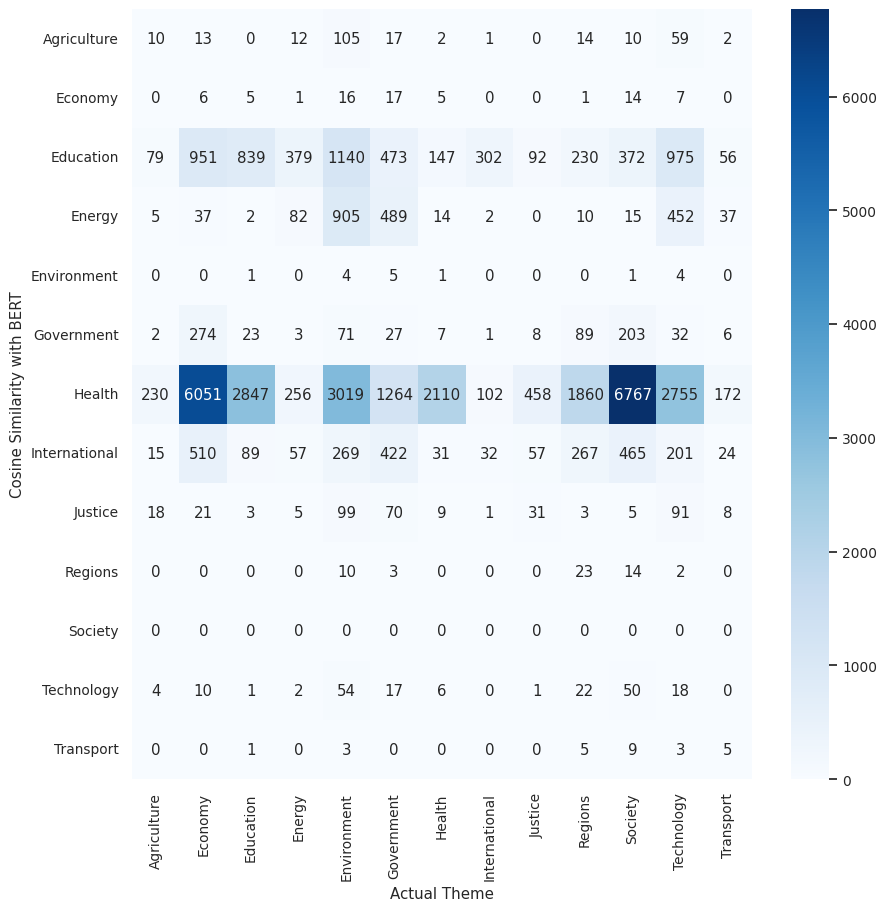

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

cm_data = confusion_matrix(result["Predict_BERT_Cosine_Similarity"], data.theme)
df_cm = pd.DataFrame(cm_data, columns=np.unique(data.theme), index = np.unique(data.theme))
df_cm.index.name = 'Cosine Similarity with BERT'
df_cm.columns.name = 'Actual Theme'
plt.figure(figsize = (10,10))
sn.set(font_scale=0.9) #for label size
sn.heatmap(df_cm, fmt="d",cmap="Blues",annot=True) # font size
plt.savefig("Cosine_Similarity.png", dpi=600, bbox_inches='tight')

In [ ]:
# calculate accuracy from the confusion matrix
accuracy = np.trace(cm_data) / float(np.sum(cm_data))

print("Accuracy:", accuracy)

Accuracy: 0.07943471000224321


In [ ]:
threshold = 0.46
result = mid_result.apply(lambda x: [1 if val >= 0.46 else 0 for val in x])

In [ ]:
all_categories_similarties=data["Translated"][1:5].apply(compute_cosine_similarity_with_BERT)

In [ ]:
all_categories_similarties

1    [[[0.25546935]], [[0.25546935]], [[0.25546935]...
2    [[[0.2510721]], [[0.2510721]], [[0.2510721]], ...
3    [[[0.21764265]], [[0.21764265]], [[0.21764265]...
4    [[[0.24989748]], [[0.24989748]], [[0.24989748]...
Name: Translated, dtype: object

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Example dataset
all_merged_instance_embeddings1 = np.array([
    [0.1, 0.2, 0.3],
    [0.4, 0.5, 0.6],
    [0.7, 0.8, 0.9],
    [0.2, 0.3, 0.4],
    [0.5, 0.6, 0.7]
])

# Example definition embeddings
definition_embeddings1 = np.array([
    [0.9, 0.8, 0.7],
    [0.6, 0.5, 0.4]
])

# Compute cosine similarity
similarities1 = cosine_similarity(all_merged_instance_embeddings1, definition_embeddings1)

# Print results
print(similarities1)

[[0.88265899 0.85280287]
 [0.96546332 0.94805195]
 [0.97938144 0.96546332]
 [0.93325038 0.90996375]
 [0.97205567 0.95618289]]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Example data
data = pd.DataFrame({
    'ID': [1, 2, 3, 4, 5],
    'Class_1': [1, 0, 1, 0, 1],
    'Class_2': [1, 1, 0, 0, 1],
    'Class_3': [0, 1, 1, 0, 0],
    'Class_4': [1, 1, 0, 1, 0]
})

In [ ]:
data.iloc[:, 1:].sum(axis=0)

Class_1    3
Class_2    3
Class_3    2
Class_4    3
dtype: int64

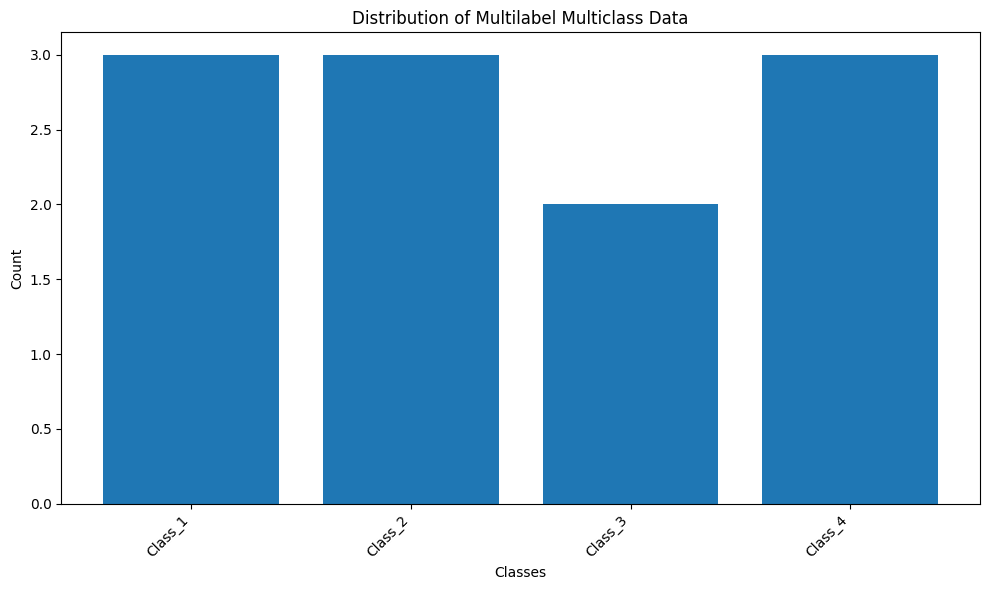

In [ ]:
# Calculate total count for each class
class_counts = data.iloc[:, 1:].sum(axis=0)

